<a href="https://colab.research.google.com/github/akinzayn/HPV-Research/blob/main/HPV_EDA_Note_9_%5BCategorical_Variables%5D_with_Report_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Summary Of Report**

The analyses were carried out on 24 categorical variables to test the prevelence of high and low HPV on the variables. The same analyses were carried out on the high and low HPV seperately. A chi-square test was carried out to determine the significance at a p-value of 0.05.

> Age, race, marital status, alcohol,arsenic level(6), arsenic by quantile(4) and total arsenic by quantile(1) were significant for only high HPV.

> Gender, smoking and education variable were significant for both high and low HPV. 
 
 
> None of the variables were significant for only low HPV.






Below are the lists of signficant variables and their 
  p-values.


### **Variables Signifinant For Only High HPV**


1. Age, 
   p-value (~ 0.005)

2. Race,
   p-value (~ 0.04)

3. Marital status
   p-value (~ 0.001)

4. Alcohol,
   p-value ( ~ 0)

5. Arsenic level (6),
   p-value (~ 0.01 )

6. Arsenic by quantile (4),
   p-value (~ 0.01)

7. Total arsenic by quantile(1),
   p-value (~ 0.02)

### **Variables significant for both high and Low HPV**


1. Gender: High HPV, p-value (~ 0)
           Low HPV, p-value ( ~ 0)

2. Education: High HPV, p-value (~ 0.0005)
              Low HPV, p-value (~ 0.0004)

3. Smoking: High HPV, p-value (~ 0)
            Low HPV, p-value (~ 0.009) 

# **Data Preparation**

In [ ]:
#@title
#  https://stackoverflow.com/questions/34818723/export-notebook-to-pdf-without-code



# Assuming using Firefox(57) + Win7 or Any browser where you have access to console

# Run Jupyter notebook and download the notebook in the browser: File->Download as->HTML and you will get a html page with code and output.
# Open the exported HTML with browser and activate the browser console with key F12
# Run following command in the console:

# document.querySelectorAll("div.input").forEach(function(a){a.remove()})
# The code removes all input div DOM. Then right mouse button and chose "Save Page As" and Save the "Complete page" (not single page).

# You will get a page with an associated folder in windows. Use a trick by zip the html page and then extract to unbind the associated. The folder is useless.

# Now it is a single html page without code. You can re-distribute it or print it as PDF.

# If you are not using Firefox or Windows, please adjust the above 3-6 steps.




# I think now is document.querySelectorAll("div.jp-InputArea.jp-Cell-inputArea").forEach(function(a){a.remove()}) 
# but this for example will keep the errors and markdown with maybe you don't want. 
# To remove all input cells, not only code cells you could use:
#  document.querySelectorAll("jp-Cell jp-CodeCell jp-Notebook-cell").forEach(function(a){a.remove()}) 
#  but is a method to check which columns you want and remove them checking the name of the div.

In [ ]:
# clearing workspace
rm(list = ls())


In [ ]:
# loading packages
# to install magick

install.packages("pacman")
library(pacman)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

p_load('tidyverse', "magrittr", "readxl", "googledrive")


In [ ]:
# loading work space and displaying variables in the workspace

#load("HSV_df.RData")
# ls()
# creating backup and displaying first 6 rows

drive_deauth()
drive_user()
public_file = drive_get(as_id("1y9EBIALTcWzyF64isrSUs4je2W-qbgFjfzF1e6UjYdg"))
downloaded_file = drive_download(public_file, overwrite = TRUE)

HSV_df = read_excel("data_orHPV.all_rev3.xlsx")

HSV_df_back_up = HSV_df
#head(HSV_df)

ℹ Not logged in as any specific Google user.

File downloaded:

• data_orHPV.all_rev3 <id: 1y9EBIALTcWzyF64isrSUs4je2W-qbgFjfzF1e6UjYdg>

Saved locally as:

• data_orHPV.all_rev3.xlsx



In [ ]:
HSV_df <- as.data.frame(sapply(HSV_df, unlist))
HSV_df %<>% 
   mutate(across(where(is.character), ~na_if(., "NA")))

In [ ]:
HSV_df$RIDAGEYRCAT = cut(as.numeric(HSV_df$RIDAGEYR), breaks = c(18, 25, 45, 65, Inf), right = FALSE)


In [ ]:
# Gender
HSV_df$RIAGENDR = factor(HSV_df$RIAGENDR)
levels(HSV_df$RIAGENDR) = c("Male", "Female") 

# High HPV
HSV_df$high.HPV = factor(HSV_df$high.HPV)
levels(HSV_df$high.HPV) = c("Negative", "Positive") 

# Low HPV
HSV_df$low.HPV = factor(HSV_df$low.HPV)
levels(HSV_df$low.HPV) = c("Negative", "Positive") 

# Race
HSV_df$RIDRETH1 = factor(HSV_df$RIDRETH1)
levels(HSV_df$RIDRETH1) = c("Mex-Amer", "Other-Hisp","Non-Hisp-WT","Non-Hisp-BK", "Others") 

# Education
HSV_df$DMDEDUC2 = factor(HSV_df$DMDEDUC2)
levels(HSV_df$DMDEDUC2) = c("Below 9th Grade", "9-11 Grade","HS or GED","Some College or AA", "Graduate") 

# Marital Status
HSV_df$DMDMARTL = factor(HSV_df$DMDMARTL)
levels(HSV_df$DMDMARTL) = c("Married", "Widowed","Divorced","Separated", "Never married", "Living with partner") 

# Smoking
HSV_df$LBDCOTLC = factor(HSV_df$LBDCOTLC)
levels(HSV_df$LBDCOTLC) = c("Above limit", "Below Limit") 

# Alcohol
HSV_df$ALQ101 = factor(HSV_df$ALQ101)
levels(HSV_df$ALQ101) = c("Yes", "No") 

# Poverty Income Level
HSV_df$PIR = factor(HSV_df$PIR)
# levels(HSV_df$PIR) = c("Yes", "No") 

# Body mass index
HSV_df$BMI.f = factor(HSV_df$BMI.f)
levels(HSV_df$BMI.f) = c("Underweight", "Normal weight" , "Overweight" , "Obesity") 


# Arsenic Level(1)
HSV_df$URDUA3LC.f = factor(HSV_df$URDUA3LC.f)
levels(HSV_df$URDUA3LC.f) = c("Above limit", "Below Limit") 

# Arsenic Level (2)
HSV_df$URDUA5LC.f = factor(HSV_df$URDUA5LC.f)
levels(HSV_df$URDUA5LC.f) = c("Above limit", "Below Limit") 

# Arsenic Level (3)
HSV_df$URDUABLC.f = factor(HSV_df$URDUABLC.f)
levels(HSV_df$URDUABLC.f) = c("Above limit", "Below Limit") 


# Arsenic Level (4)
HSV_df$URDUDALC.f = factor(HSV_df$URDUACLC.f)  
levels(HSV_df$URDUDALC.f) = c("Above limit", "Below Limit") 

# Arsenic Level (5)
HSV_df$URDUDALC.f = factor(HSV_df$URDUDALC.f)
levels(HSV_df$URDUDALC.f) = c("Above limit", "Below Limit") 

# Arsenic Level (6)
HSV_df$URDUMMAL.f = factor(HSV_df$URDUMMAL.f)
levels(HSV_df$URDUMMAL.f) = c("Above limit", "Below Limit") 


HSV_df_backup_postprep = HSV_df

In [ ]:

# freq function

freq = function(var, name = deparse(substitute(var))){
tbl = table( var)
freq_tbl = tbl %>% as.data.frame()
prop_tbl = as.data.frame(prop.table(tbl) * 100) %>% as.data.frame() %>% select(Freq) %>% rename( "% Freq" = Freq)
total = data.frame(var = "Total", Freq = sum(freq_tbl$Freq), "% Freq" = sum(prop_tbl$`% Freq`))
df = cbind(freq_tbl, prop_tbl)
colnames(total) = colnames(df)
df = rbind(df,total)
xname = c(name, colnames(df)[2:length(colnames(df))])
colnames(df) = xname
  return(df)
}

# ctable function

ctable_fn = function( x, y  ){

tbl = table( x, y) %>% as.data.frame.matrix()

prop_tbl = prop.table(tbl) 

tbl %<>% cbind(.,Total = rowSums(.)) %>% rbind(.,Total = colSums(.))

prop_tbl %<>% cbind(.,Total = rowSums(.)) %>% rbind(.,Total = colSums(.))

prop_tbl =  (prop_tbl * 100) %>% round(2)

break_point = dim(tbl)[2]
for(i in 1: dim(tbl)[2]){
  tbl[,i] = paste0(tbl[,i], " [ " , prop_tbl[,i],  "% ]" )
}


return(tbl)

}

# **Analysis of Categorical Variables**

## **Gender**

### **High HPV Section**

In [ ]:

HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(RIAGENDR != "NA")

HSV_df %$% freq(RIAGENDR)


RIAGENDR,Freq,% Freq
<fct>,<int>,<dbl>
Male,4417,48.37367
Female,4714,51.62633
Total,9131,100.00000


From the frequency table above, the female is approximately 51.62 percent of the total sample and the male is approximately 48.37 percent.


In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = RIAGENDR)
tbl = HSV_df %$% table(high.HPV, RIAGENDR)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Male,Female,Total
,<chr>,<chr>,<chr>
Negative,4167 [ 45.64% ],4647 [ 50.89% ],8814 [ 96.53% ]
Positive,250 [ 2.74% ],67 [ 0.73% ],317 [ 3.47% ]
Total,4417 [ 48.37% ],4714 [ 51.63% ],9131 [ 100% ]




 Chi-Square Test P-value:  0 
Fisher Exact Test P-value:  0 





For the Chi-square test above, the p-value (0) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the gender variable. 


In [ ]:

high_hpv_var = HSV_df %>% select(high.HPV,RIAGENDR) %>% group_by(RIAGENDR, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(RIAGENDR) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
  mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


RIAGENDR,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Male,Negative,4167,45.64,4417,94.34,93.66,95.02
Male,Positive,250,2.74,4417,5.66,4.98,6.34
Female,Negative,4647,50.89,4714,98.58,98.24,98.92
Female,Positive,67,0.73,4714,1.42,1.08,1.76



The male(5.66) percent shows the highest positive rate for high HPV.














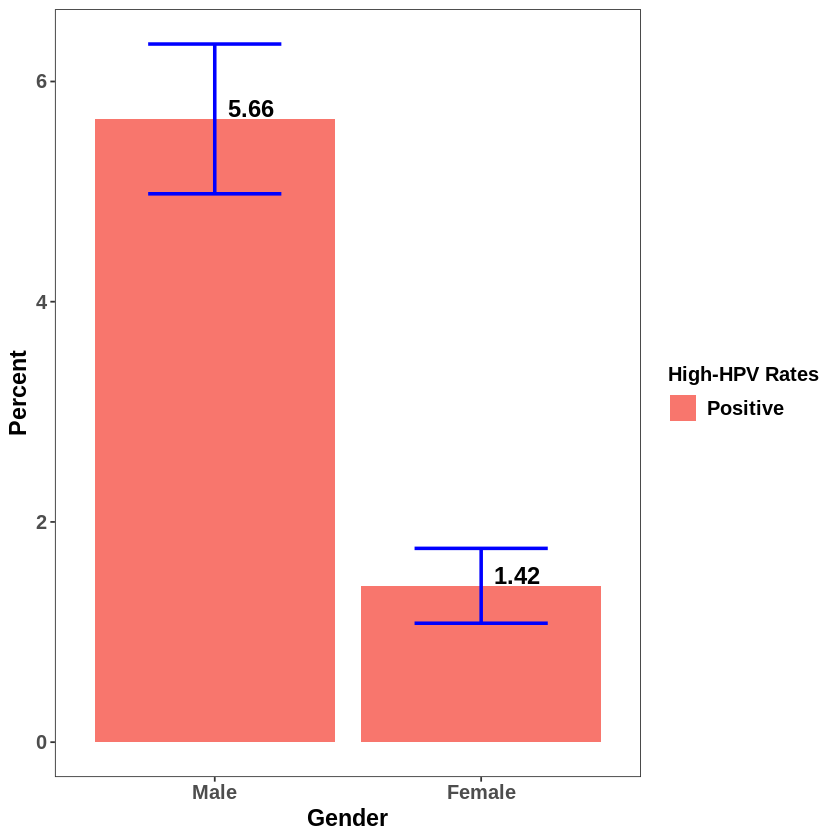

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(RIAGENDR), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Gender", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5)+
            theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))


 

The bar plot above shows the proportion of male and female that tested positve for high HPV  and their confidence intervals. The proportion of male was 5.66 percent and the proportion of female was 1.42 percent.


### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(RIAGENDR != "NA")

HSV_df %$% freq(RIAGENDR)

cat("\n\n\n")


RIAGENDR,Freq,% Freq
<fct>,<int>,<dbl>
Male,4417,48.37367
Female,4714,51.62633
Total,9131,100.00000


From the frequency table above, the female is approximately 51.62 percent of the total sample and the male is approximately 48.37 percent.


In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = RIAGENDR)
tbl = HSV_df %$% table(low.HPV, RIAGENDR)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")







,Male,Female,Total
,<chr>,<chr>,<chr>
Negative,4380 [ 47.97% ],4709 [ 51.57% ],9089 [ 99.54% ]
Positive,37 [ 0.41% ],5 [ 0.05% ],42 [ 0.46% ]
Total,4417 [ 48.37% ],4714 [ 51.63% ],9131 [ 100% ]




 Chi-Square Test P-value:  0 
Fisher Exact Test P-value:  0 


For the Chi-square test above, the p-value (0) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the gender variable. 





In [ ]:


low_hpv_var = HSV_df %>% select(low.HPV,RIAGENDR) %>% group_by(RIAGENDR, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(RIAGENDR) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var



RIAGENDR,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Male,Negative,4380,47.97,4417,99.16,98.89,99.43
Male,Positive,37,0.41,4417,0.84,0.57,1.11
Female,Negative,4709,51.57,4714,99.89,99.80,99.99
Female,Positive,5,0.05,4714,0.11,0.01,0.20



The male(0.84) percent shows the highest positive rate for low HPV.














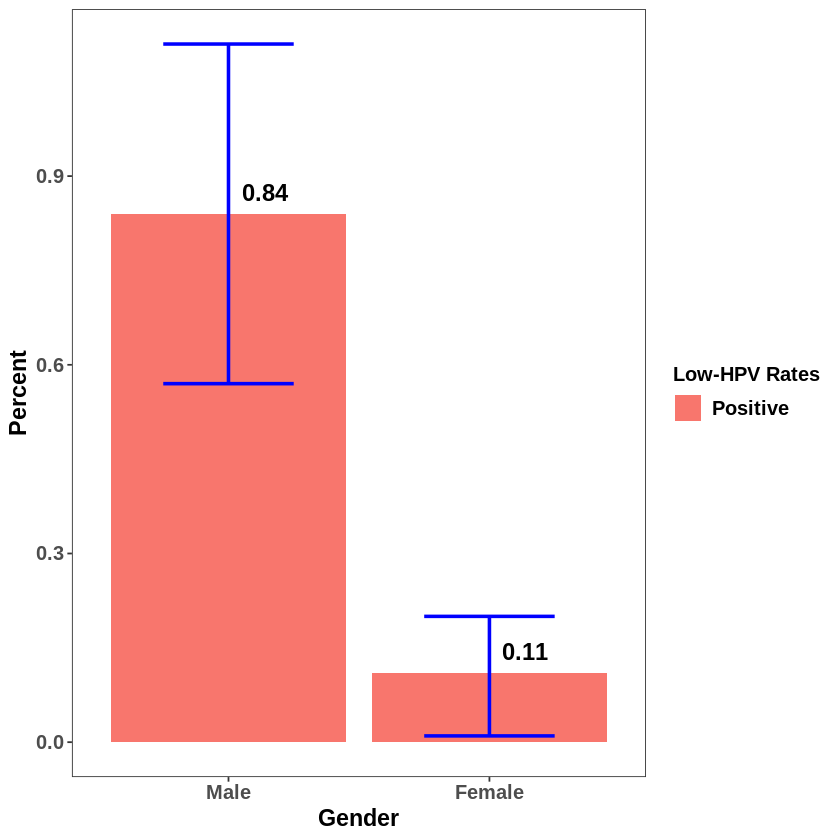

In [ ]:


low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(RIAGENDR), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Gender", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))






The bar plot above shows the proportion of male and female that tested positve for high HPV and their confidence intervals. The proportion of male was 0.84 percent and the proportion of female was 0.11 percent.



## **Age**

### **High HPV section**

In [ ]:

HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(RIDAGEYRCAT != "NA")

HSV_df %$% freq(RIDAGEYRCAT)



RIDAGEYRCAT,Freq,% Freq
<fct>,<int>,<dbl>
"[18,25)",1445,15.825211
"[25,45)",3501,38.341912
"[45,65)",3429,37.553390
"[65,Inf)",756,8.279487
Total,9131,100.000000


From the frequency table above, the sample within the ages of 25 and 45 (38.34) percent was the highest sample collected. Followed closely by the samples within the ages of 45 and 65 (37.55) percent.

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = RIDAGEYRCAT)
tbl = HSV_df %$% table(high.HPV, RIDAGEYRCAT)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")



,"[18,25)","[25,45)","[45,65)","[65,Inf)",Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1414 [ 15.49% ],3385 [ 37.07% ],3287 [ 36% ],728 [ 7.97% ],8814 [ 96.53% ]
Positive,31 [ 0.34% ],116 [ 1.27% ],142 [ 1.56% ],28 [ 0.31% ],317 [ 3.47% ]
Total,1445 [ 15.83% ],3501 [ 38.34% ],3429 [ 37.55% ],756 [ 8.28% ],9131 [ 100% ]




 Chi-Square Test P-value:  0.0057 
Fisher Exact Test P-value:  0.00418 


For the Chi-square test above, the p-value (0.006) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the age variable. 


In [ ]:


high_hpv_var = HSV_df %>% select(high.HPV,RIDAGEYRCAT) %>% group_by(RIDAGEYRCAT, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(RIDAGEYRCAT) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var



RIDAGEYRCAT,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
"[18,25)",Negative,1414,15.49,1445,97.85,97.11,98.60
"[18,25)",Positive,31,0.34,1445,2.15,1.40,2.89
"[25,45)",Negative,3385,37.07,3501,96.69,96.09,97.28
"[25,45)",Positive,116,1.27,3501,3.31,2.72,3.91
"[45,65)",Negative,3287,36.00,3429,95.86,95.19,96.53
"[45,65)",Positive,142,1.56,3429,4.14,3.47,4.81
"[65,Inf)",Negative,728,7.97,756,96.30,94.95,97.64
"[65,Inf)",Positive,28,0.31,756,3.70,2.36,5.05


The ages 45 to 65(4.14) percent shows the highest positive rate for high HPV.














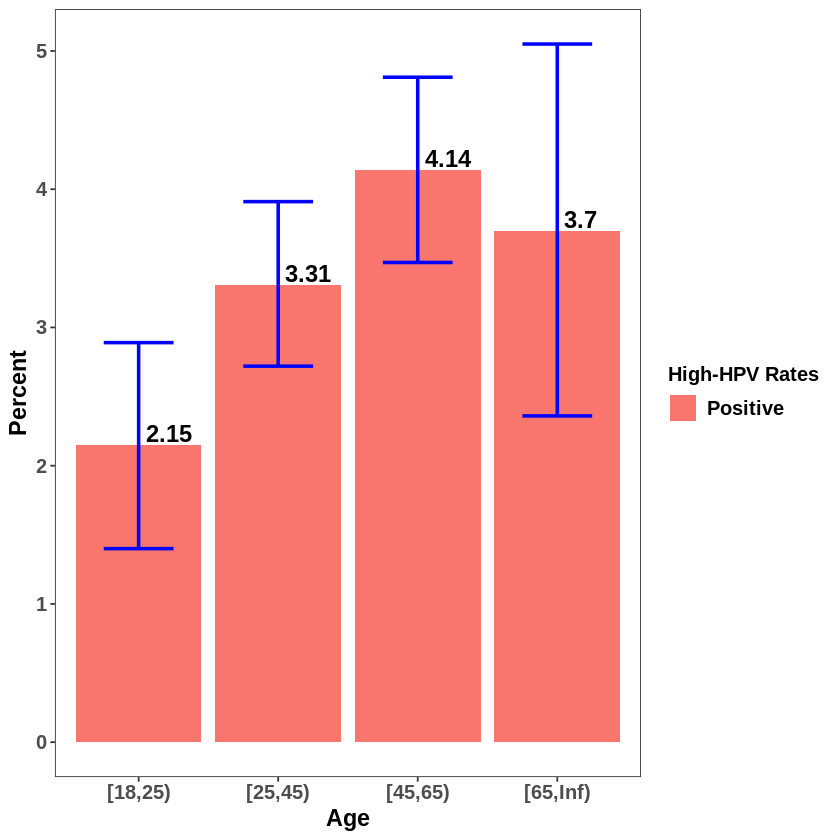

In [ ]:


high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(RIDAGEYRCAT), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Age", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))



The bar plot above shows the proportions of people within ages that tested positive for high HPV ages in percentage, and their confidence intervals. 2.15 percent within the ages of 18 to 25 tested positive for high HPV. 3.31 percent within the ages of 25 to 45 tested positive for high HPV. 4.14 percent within the ages of 45 to 65 tested positive for high HPV. 3.7 percent within the ages of 65 and above tested positive for high HPV.

### **Low HPV Section**

In [ ]:



HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(RIDAGEYRCAT != "NA")

HSV_df %$% freq(RIDAGEYRCAT)




RIDAGEYRCAT,Freq,% Freq
<fct>,<int>,<dbl>
"[18,25)",1445,15.825211
"[25,45)",3501,38.341912
"[45,65)",3429,37.553390
"[65,Inf)",756,8.279487
Total,9131,100.000000


From the frequency table above, the sample within the ages of 25 and 45 (38.34) percent was the highest sample collected. Followed closely by the samples within the ages of 45 and 65 (37.55) percent.

In [ ]:


cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = RIDAGEYRCAT)
tbl = HSV_df %$% table(low.HPV, RIDAGEYRCAT)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")



,"[18,25)","[25,45)","[45,65)","[65,Inf)",Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1441 [ 15.78% ],3485 [ 38.17% ],3412 [ 37.37% ],751 [ 8.22% ],9089 [ 99.54% ]
Positive,4 [ 0.04% ],16 [ 0.18% ],17 [ 0.19% ],5 [ 0.05% ],42 [ 0.46% ]
Total,1445 [ 15.83% ],3501 [ 38.34% ],3429 [ 37.55% ],756 [ 8.28% ],9131 [ 100% ]




 Chi-Square Test P-value:  0.60948 
Fisher Exact Test P-value:  0.58738 



For the Chi-square test above, the p-value (0.61) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the age variable.


In [ ]:


low_hpv_var = HSV_df %>% select(low.HPV,RIDAGEYRCAT) %>% group_by(RIDAGEYRCAT, low.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(RIDAGEYRCAT) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

low_hpv_var



RIDAGEYRCAT,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
"[18,25)",Negative,1441,15.78,1445,99.72,99.45,99.99
"[18,25)",Positive,4,0.04,1445,0.28,0.01,0.55
"[25,45)",Negative,3485,38.17,3501,99.54,99.32,99.77
"[25,45)",Positive,16,0.18,3501,0.46,0.23,0.68
"[45,65)",Negative,3412,37.37,3429,99.50,99.27,99.74
"[45,65)",Positive,17,0.19,3429,0.50,0.26,0.73
"[65,Inf)",Negative,751,8.22,756,99.34,98.76,99.92
"[65,Inf)",Positive,5,0.05,756,0.66,0.08,1.24


The ages from 65 and above(0.66) percent shows the highest positive rate for low HPV.

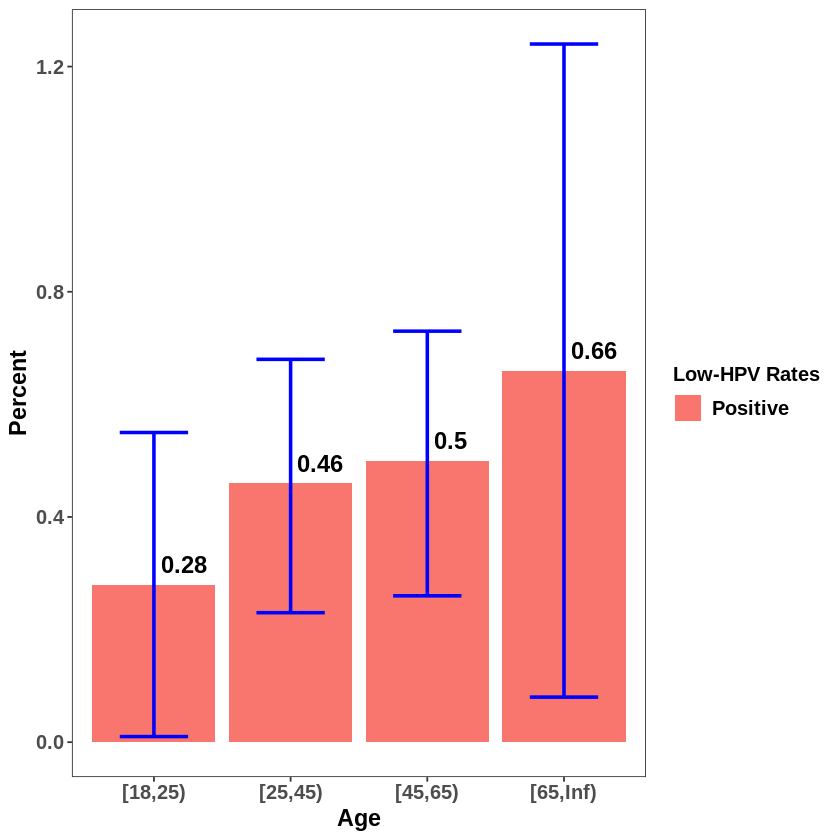

In [ ]:


low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(RIDAGEYRCAT), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Age", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))







The bar plot above shows the proportions of people within ages that tested positive for low HPV ages in percentage and their confidence intervals. 0.28 percent within the ages of 18-25 tested positive for low HPV. 0.46 percent within the ages of 25-45 tested positive for low HPV. 0.50 percent within the ages of 45-65 tested positive for low HPV. 0.66 percent within the ages of 65 and above tested positive for low HPV.

## **Race**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(RIDRETH1 != "NA")

HSV_df %$% freq(RIDRETH1)

cat("\n\n\n")

RIDRETH1,Freq,% Freq
<fct>,<int>,<dbl>
Mex-Amer,1539,16.85467
Other-Hisp,1040,11.38977
Non-Hisp-WT,3107,34.02694
Non-Hisp-BK,2002,21.92531
Others,1443,15.80331
Total,9131,100.00000


From the frequency table above, the non-hispanic-white (34.02) percent has the highest percent of the total sample collected. And the lowest is other-hispanic (11.38) percent.

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = RIDRETH1)
tbl = HSV_df %$% table(high.HPV, RIDRETH1)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")


,Mex-Amer,Other-Hisp,Non-Hisp-WT,Non-Hisp-BK,Others,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1494 [ 16.36% ],1009 [ 11.05% ],2990 [ 32.75% ],1915 [ 20.97% ],1406 [ 15.4% ],8814 [ 96.53% ]
Positive,45 [ 0.49% ],31 [ 0.34% ],117 [ 1.28% ],87 [ 0.95% ],37 [ 0.41% ],317 [ 3.47% ]
Total,1539 [ 16.85% ],1040 [ 11.39% ],3107 [ 34.03% ],2002 [ 21.93% ],1443 [ 15.8% ],9131 [ 100% ]


In [ ]:

cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


 Chi-Square Test P-value:  0.02615 
Fisher Exact Test P-value:  0.02816 





For the Chi-square test above, the p-value (0.03) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the race variable. 

In [ ]:


high_hpv_var = HSV_df %>% select(high.HPV,RIDRETH1) %>% group_by(RIDRETH1, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(RIDRETH1) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var




RIDRETH1,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Mex-Amer,Negative,1494,16.36,1539,97.08,96.23,97.92
Mex-Amer,Positive,45,0.49,1539,2.92,2.08,3.77
Other-Hisp,Negative,1009,11.05,1040,97.02,95.99,98.05
Other-Hisp,Positive,31,0.34,1040,2.98,1.95,4.01
Non-Hisp-WT,Negative,2990,32.75,3107,96.23,95.56,96.90
Non-Hisp-WT,Positive,117,1.28,3107,3.77,3.10,4.44
Non-Hisp-BK,Negative,1915,20.97,2002,95.65,94.76,96.55
Non-Hisp-BK,Positive,87,0.95,2002,4.35,3.45,5.24
Others,Negative,1406,15.40,1443,97.44,96.62,98.25


The non-hispanic-black(4.35) percent shows the highest positive rate for high HPV.

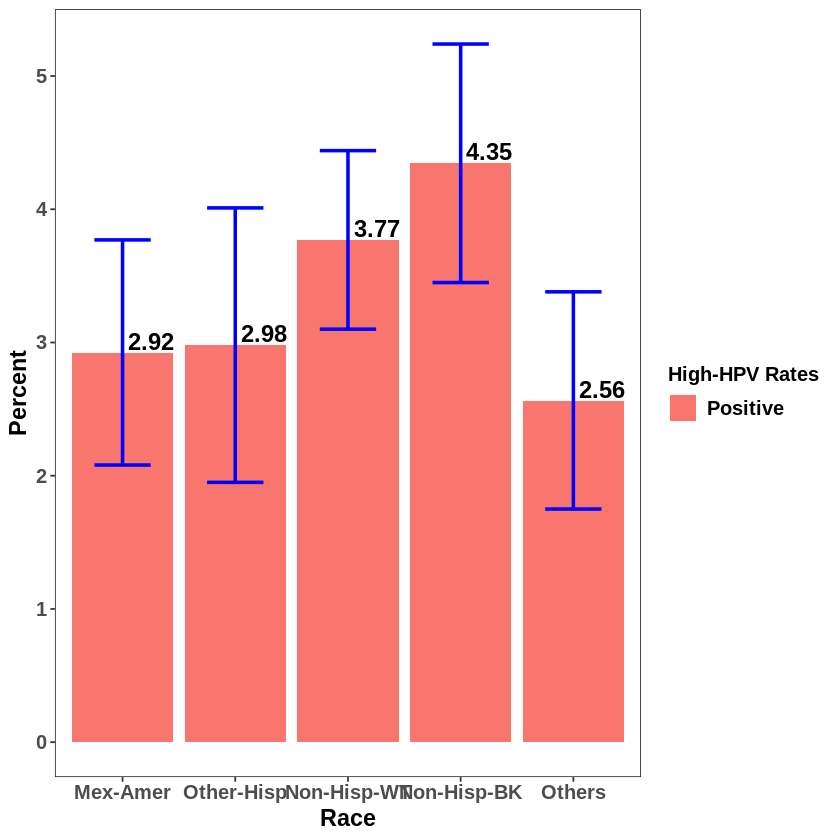

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(RIDRETH1), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Race", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))







The bar plot above shows the percentage proportion of the races that tested positive for high HPV and their confidence intervals. The proportion of Mexican-Hispanic was  is 2.92 percent, other-Hispanic was 2.98 percent, non-Hispanic-White-Hispanic was 3.77 percent,  non-Hispanic-Black was 4.35 percent and others was 2.56 percent.


### **Low HPV Section**

In [ ]:



HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(RIDRETH1 != "NA")

HSV_df %$% freq(RIDRETH1)

cat("\n\n\n")


RIDRETH1,Freq,% Freq
<fct>,<int>,<dbl>
Mex-Amer,1539,16.85467
Other-Hisp,1040,11.38977
Non-Hisp-WT,3107,34.02694
Non-Hisp-BK,2002,21.92531
Others,1443,15.80331
Total,9131,100.00000


From the frequency table above, the non-hispanic-white (34.02) percent has the highest percent of the total sample collected. And the lowest is other-hispanic (11.38) percent.

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = RIDRETH1)
tbl = HSV_df %$% table(low.HPV, RIDRETH1)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Mex-Amer,Other-Hisp,Non-Hisp-WT,Non-Hisp-BK,Others,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1533 [ 16.79% ],1035 [ 11.34% ],3094 [ 33.88% ],1988 [ 21.77% ],1439 [ 15.76% ],9089 [ 99.54% ]
Positive,6 [ 0.07% ],5 [ 0.05% ],13 [ 0.14% ],14 [ 0.15% ],4 [ 0.04% ],42 [ 0.46% ]
Total,1539 [ 16.85% ],1040 [ 11.39% ],3107 [ 34.03% ],2002 [ 21.93% ],1443 [ 15.8% ],9131 [ 100% ]




 Chi-Square Test P-value:  0.42674 
Fisher Exact Test P-value:  0.47243 






For the Chi-square test above, the p-value (0.43) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the race variable.


In [ ]:


low_hpv_var = HSV_df %>% select(low.HPV,RIDRETH1) %>% group_by(RIDRETH1, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(RIDRETH1) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var



RIDRETH1,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Mex-Amer,Negative,1533,16.79,1539,99.61,99.30,99.92
Mex-Amer,Positive,6,0.07,1539,0.39,0.08,0.70
Other-Hisp,Negative,1035,11.34,1040,99.52,99.10,99.94
Other-Hisp,Positive,5,0.05,1040,0.48,0.06,0.90
Non-Hisp-WT,Negative,3094,33.88,3107,99.58,99.35,99.81
Non-Hisp-WT,Positive,13,0.14,3107,0.42,0.19,0.65
Non-Hisp-BK,Negative,1988,21.77,2002,99.30,98.94,99.67
Non-Hisp-BK,Positive,14,0.15,2002,0.70,0.33,1.06
Others,Negative,1439,15.76,1443,99.72,99.45,99.99


The non-hispanic-black(0.70) percent shows the highest positive rate for low HPV.

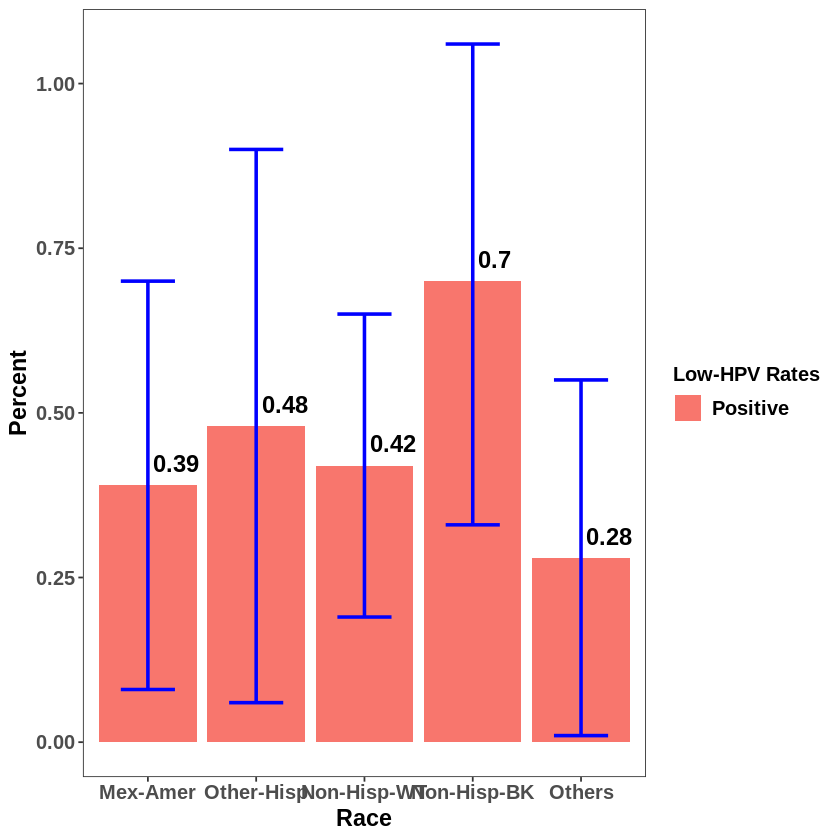

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(RIDRETH1), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Race", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))







The bar plot above shows the percentage proportion of the races that tested positive for high HPV and their confidence intervals. The proportion of Mexican-Hispanic was 0.39 percent, other-Hispanic was 0.48 percent, non-Hispanic-White-Hispanic was 0.42 percent,non-Hispanic-Black was 0.7 percent, and others was 0.28 percent.




## **Education**

### **High HPV Section**

In [ ]:

HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(DMDEDUC2 != "NA")

HSV_df %$% freq(DMDEDUC2)


DMDEDUC2,Freq,% Freq
<fct>,<int>,<dbl>
Below 9th Grade,723,8.45021
9-11 Grade,1082,12.64610
HS or GED,1864,21.78588
Some College or AA,2686,31.39317
Graduate,2201,25.72464
Total,8556,100.00000


From the frequency table above, some College or AA (31.3) percent has the highest percentage of the total sample collected. 

In [ ]:


cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = DMDEDUC2)
tbl = HSV_df %$% table(high.HPV, DMDEDUC2)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")



,Below 9th Grade,9-11 Grade,HS or GED,Some College or AA,Graduate,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,703 [ 8.22% ],1031 [ 12.05% ],1793 [ 20.96% ],2570 [ 30.04% ],2151 [ 25.14% ],8248 [ 96.4% ]
Positive,20 [ 0.23% ],51 [ 0.6% ],71 [ 0.83% ],116 [ 1.36% ],50 [ 0.58% ],308 [ 3.6% ]
Total,723 [ 8.45% ],1082 [ 12.65% ],1864 [ 21.79% ],2686 [ 31.39% ],2201 [ 25.72% ],8556 [ 100% ]




 Chi-Square Test P-value:  0.00036 
Fisher Exact Test P-value:  0.00022 


For the Chi-square test above, the p-value less (0.0004) than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the education variable. 

In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,DMDEDUC2) %>% group_by(DMDEDUC2, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(DMDEDUC2) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var



DMDEDUC2,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Below 9th Grade,Negative,703,8.22,723,97.23,96.04,98.43
Below 9th Grade,Positive,20,0.23,723,2.77,1.57,3.96
9-11 Grade,Negative,1031,12.05,1082,95.29,94.02,96.55
9-11 Grade,Positive,51,0.60,1082,4.71,3.45,5.98
HS or GED,Negative,1793,20.96,1864,96.19,95.32,97.06
HS or GED,Positive,71,0.83,1864,3.81,2.94,4.68
Some College or AA,Negative,2570,30.04,2686,95.68,94.91,96.45
Some College or AA,Positive,116,1.36,2686,4.32,3.55,5.09
Graduate,Negative,2151,25.14,2201,97.73,97.11,98.35


Students from 9th to 11th grade(4.71)  percent shows the highest positive rate for high HPV, followed closely by some college or AA(4.32) percent.

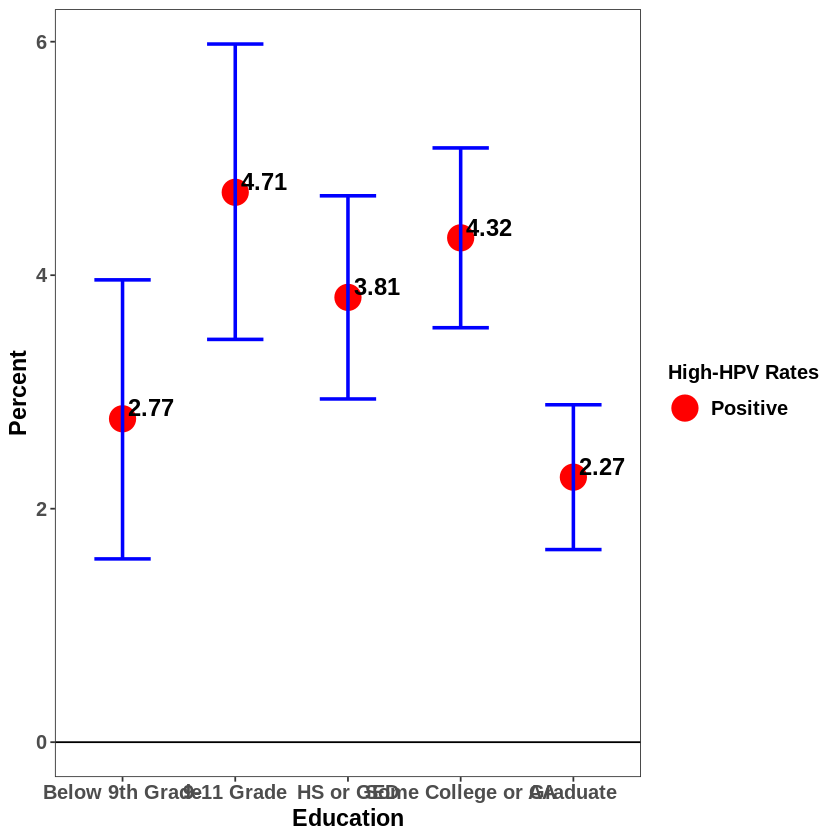

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(DMDEDUC2), y = Percentage, fill = factor(high.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
   geom_hline(yintercept = 0) +
  labs(x = "Education", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))

        

The bar plot above shows the percentage proportion of the levels of education that tested positive for high HPV and their confidence intervals. The proportion of below 9th grade was 2.77 percent, 9th to 11th grade was 4.71 percent, high school or GED was 3.81 percent, some college or AA was 4.32 percent, and graduate was 2.27 percent.




### **Low HPV Section**

In [ ]:









HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(DMDEDUC2 != "NA")

HSV_df %$% freq(DMDEDUC2)


DMDEDUC2,Freq,% Freq
<fct>,<int>,<dbl>
Below 9th Grade,723,8.45021
9-11 Grade,1082,12.64610
HS or GED,1864,21.78588
Some College or AA,2686,31.39317
Graduate,2201,25.72464
Total,8556,100.00000


From the frequency table above, some College or AA (31.3) percent has the highest percentage of the total sample collected. 

In [ ]:


cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = DMDEDUC2)
tbl = HSV_df %$% table(low.HPV, DMDEDUC2)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Below 9th Grade,9-11 Grade,HS or GED,Some College or AA,Graduate,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,722 [ 8.44% ],1073 [ 12.54% ],1848 [ 21.6% ],2674 [ 31.25% ],2197 [ 25.68% ],8514 [ 99.51% ]
Positive,1 [ 0.01% ],9 [ 0.11% ],16 [ 0.19% ],12 [ 0.14% ],4 [ 0.05% ],42 [ 0.49% ]
Total,723 [ 8.45% ],1082 [ 12.65% ],1864 [ 21.79% ],2686 [ 31.39% ],2201 [ 25.72% ],8556 [ 100% ]




 Chi-Square Test P-value:  0.00736 
Fisher Exact Test P-value:  0.00738 





For the Chi-square test above, the p-value (0.007) less than significance level (0.05) indicates there is evidence to conclude that the low HPV prevelence is significantly associated with the education variable. 

In [ ]:


low_hpv_var = HSV_df %>% select(low.HPV,DMDEDUC2) %>% group_by(DMDEDUC2, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(DMDEDUC2) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var

cat("\n\n\n")


DMDEDUC2,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Below 9th Grade,Negative,722,8.44,723,99.86,99.59,100.13
Below 9th Grade,Positive,1,0.01,723,0.14,-0.13,0.41
9-11 Grade,Negative,1073,12.54,1082,99.17,98.63,99.71
9-11 Grade,Positive,9,0.11,1082,0.83,0.29,1.37
HS or GED,Negative,1848,21.60,1864,99.14,98.72,99.56
HS or GED,Positive,16,0.19,1864,0.86,0.44,1.28
Some College or AA,Negative,2674,31.25,2686,99.55,99.30,99.81
Some College or AA,Positive,12,0.14,2686,0.45,0.19,0.70
Graduate,Negative,2197,25.68,2201,99.82,99.64,100.00


Students in high school or GED(0.86)  percent shows the highest positive rate for high HPV, followed closely by 9th to 11th grade(0.83)  percent.

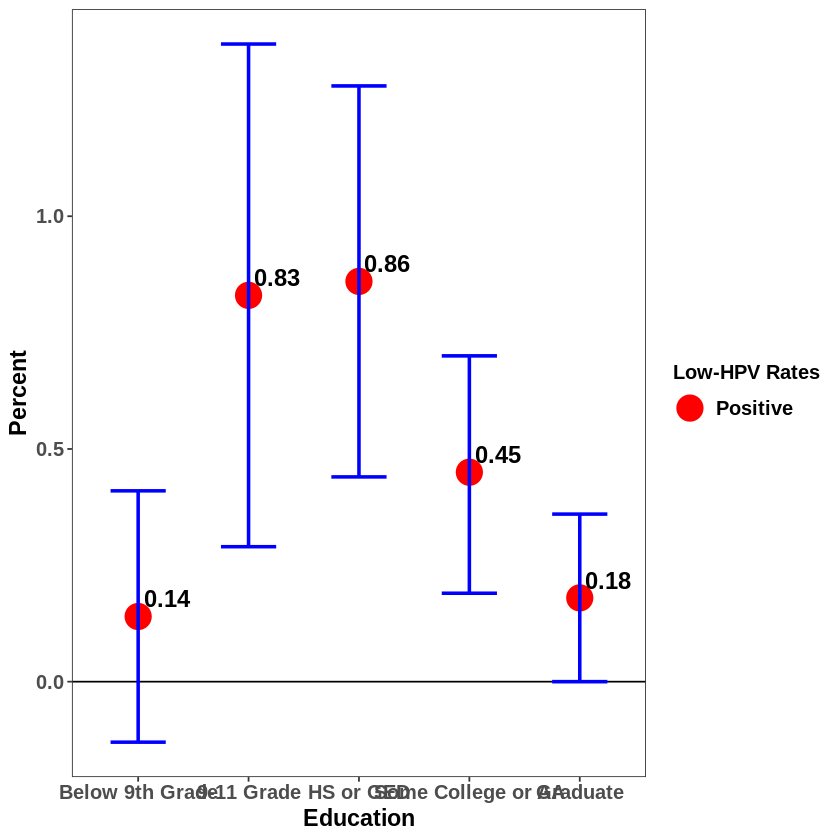

In [ ]:


low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(DMDEDUC2), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
   geom_point( colour = "red", size = 7) +
   geom_hline(yintercept = 0) +
  labs(x = "Education", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))







The plot above shows the percentage proportion of the levels of education that tested positive for low HPV, and their confidence intervals. The proportion of below 9th grade was 0.14 percent, 9th to 11th grade was 0.83 percent, high school or GED was 0.86 percent, some college or AA was 0.45 percent, and graduate was 0.18 percent.

##**Marital Status**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(DMDMARTL != "NA")

HSV_df %$% freq(DMDMARTL)

cat("\n\n\n")


DMDMARTL,Freq,% Freq
<fct>,<int>,<dbl>
Married,4397,51.390837
Widowed,243,2.840112
Divorced,923,10.787751
Separated,295,3.447873
Never married,1859,21.727443
Living with partner,839,9.805984
Total,8556,100.000000


From the frequency table above, the married group (51.39) percent has the highest percentage of the total sample collected. The lowest is the widowed (2.84) percent.

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = DMDMARTL)
tbl = HSV_df %$% table(high.HPV, DMDMARTL)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")



,Married,Widowed,Divorced,Separated,Never married,Living with partner,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,4273 [ 49.94% ],233 [ 2.72% ],880 [ 10.29% ],282 [ 3.3% ],1786 [ 20.87% ],794 [ 9.28% ],8248 [ 96.4% ]
Positive,124 [ 1.45% ],10 [ 0.12% ],43 [ 0.5% ],13 [ 0.15% ],73 [ 0.85% ],45 [ 0.53% ],308 [ 3.6% ]
Total,4397 [ 51.39% ],243 [ 2.84% ],923 [ 10.79% ],295 [ 3.45% ],1859 [ 21.73% ],839 [ 9.81% ],8556 [ 100% ]




 Chi-Square Test P-value:  0.00154 
Fisher Exact Test P-value:  0.00138 





For the Chi-square test above, the p-value (0.002) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the marital status. 

In [ ]:


high_hpv_var = HSV_df %>% select(high.HPV,DMDMARTL) %>% group_by(DMDMARTL, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(DMDMARTL) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var

cat("\n\n\n")



DMDMARTL,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Married,Negative,1687,43.56,1743,96.79,95.96,97.62
Married,Positive,56,1.45,1743,3.21,2.38,4.04
Widowed,Negative,101,2.61,108,93.52,88.88,98.16
Widowed,Positive,7,0.18,108,6.48,1.84,11.12
Divorced,Negative,391,10.10,412,94.90,92.78,97.03
Divorced,Positive,21,0.54,412,5.10,2.97,7.22
Separated,Negative,133,3.43,141,94.33,90.51,98.14
Separated,Positive,8,0.21,141,5.67,1.86,9.49
Never married,Negative,813,20.99,849,95.76,94.40,97.12


People living with partner(5.36) percent shows the highest positive rate for high HPV, followed  by divorced(4.66) percent and seperated(4.41) percent.

 







png 
  3

png 
  2

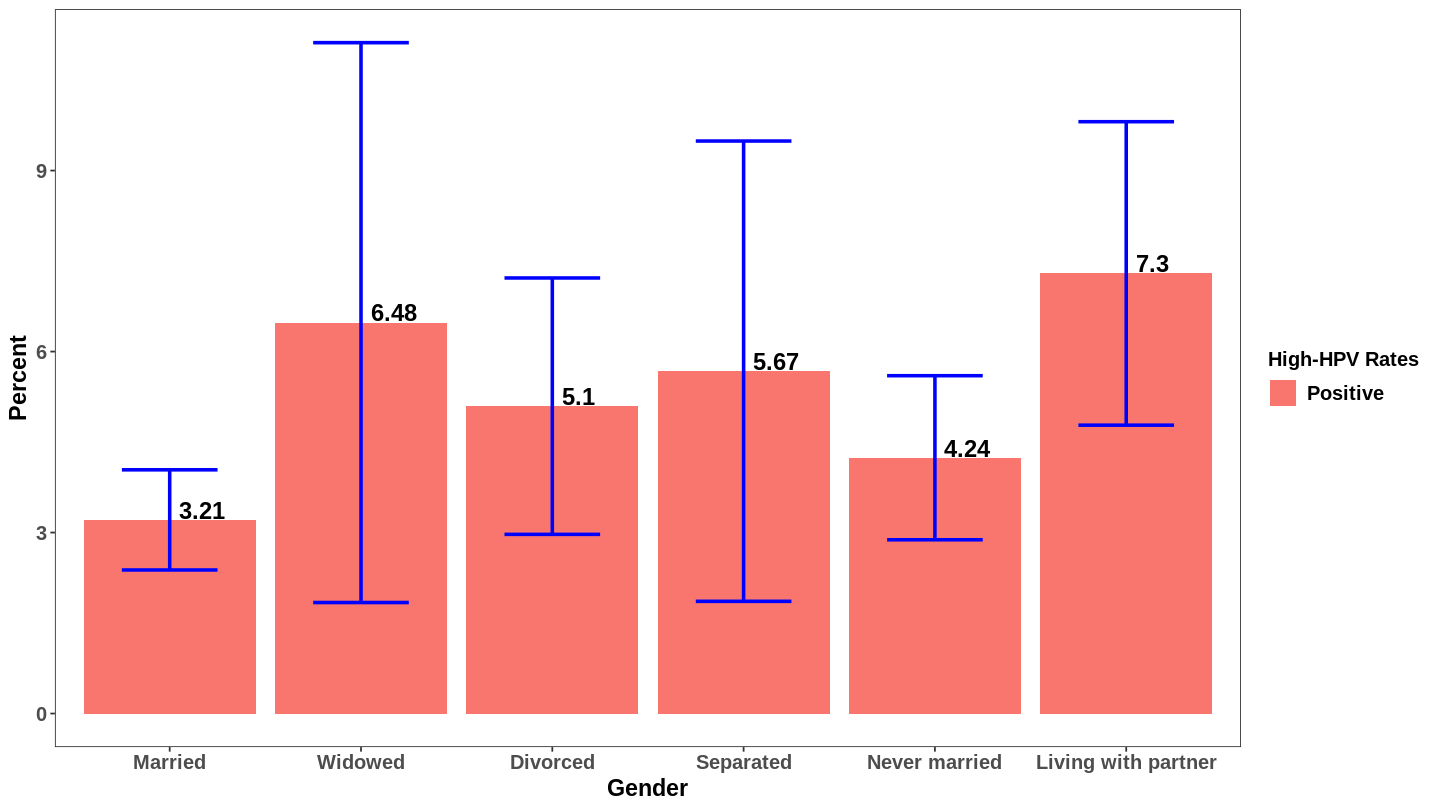

In [ ]:
fig(width = 12, heigth = 6.75)

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive") %>% filter(!is.na(DMDMARTL)) 


ggplot(high_hpv_var, aes(x = factor(DMDMARTL), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Gender", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))

dev.copy(png,'myplot.png')

dev.off()



The bar plot above shows the percentage proportion of the levels of marital status that tested positive for high HPV, and their confidence interval. The proportion of married was 2.82 percent, widowed was 4.12 percent, divorced was 4.66 percent, seperated was 4.41 percent, never married was 3.93 percent and living with partner was 5.36 percent.


### **Low HPV Section**

In [ ]:



HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(DMDMARTL != "NA")

HSV_df %$% freq(DMDMARTL)

cat("\n\n\n")


DMDMARTL,Freq,% Freq
<fct>,<int>,<dbl>
Married,4397,51.390837
Widowed,243,2.840112
Divorced,923,10.787751
Separated,295,3.447873
Never married,1859,21.727443
Living with partner,839,9.805984
Total,8556,100.000000


From the frequency table above, the married group (51.39) percent has the highest percentage of the total sample collected. The lowest is the widowed (2.84) percent.

The total sample was 8556. Of which, 51.390837 were married, 51.390837 percent were widowed, 10.787751 were divorced, 3.447873 percent were seperated, 21.727443 were never married, 9.805984 percent lived with partner.

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = DMDMARTL)
tbl = HSV_df %$% table(low.HPV, DMDMARTL)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")



,Married,Widowed,Divorced,Separated,Never married,Living with partner,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,4381 [ 51.2% ],243 [ 2.84% ],916 [ 10.71% ],294 [ 3.44% ],1844 [ 21.55% ],836 [ 9.77% ],8514 [ 99.51% ]
Positive,16 [ 0.19% ],0 [ 0% ],7 [ 0.08% ],1 [ 0.01% ],15 [ 0.18% ],3 [ 0.04% ],42 [ 0.49% ]
Total,4397 [ 51.39% ],243 [ 2.84% ],923 [ 10.79% ],295 [ 3.45% ],1859 [ 21.73% ],839 [ 9.81% ],8556 [ 100% ]




 Chi-Square Test P-value:  0.1431 
Fisher Exact Test P-value:  0.17971 






For the Chi-square test above, the p-value (0.14) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the marital status.


In [ ]:


low_hpv_var = HSV_df %>% select(low.HPV,DMDMARTL) %>% group_by(DMDMARTL, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(DMDMARTL) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = max(round(Lower_CI,4) * 100,0), Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


cat("\n\n\n")


DMDMARTL,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Married,Negative,1734,44.77,1743,99.48,99.15,99.82
Married,Positive,9,0.23,1743,0.52,0.18,0.85
Widowed,Negative,108,2.79,108,100.00,100.00,100.00
Divorced,Negative,408,10.53,412,99.03,98.08,99.98
Divorced,Positive,4,0.10,412,0.97,0.02,1.92
Separated,Negative,140,3.61,141,99.29,97.91,100.68
Separated,Positive,1,0.03,141,0.71,0.00,2.09
Never married,Negative,842,21.74,849,99.18,98.57,99.78
Never married,Positive,7,0.18,849,0.82,0.22,1.43


The never married group(0.81) percent shows the highest positive rate for low HPV, followed by divorced(0.76) percent. None of the widowed tested positive for low HPV.





 







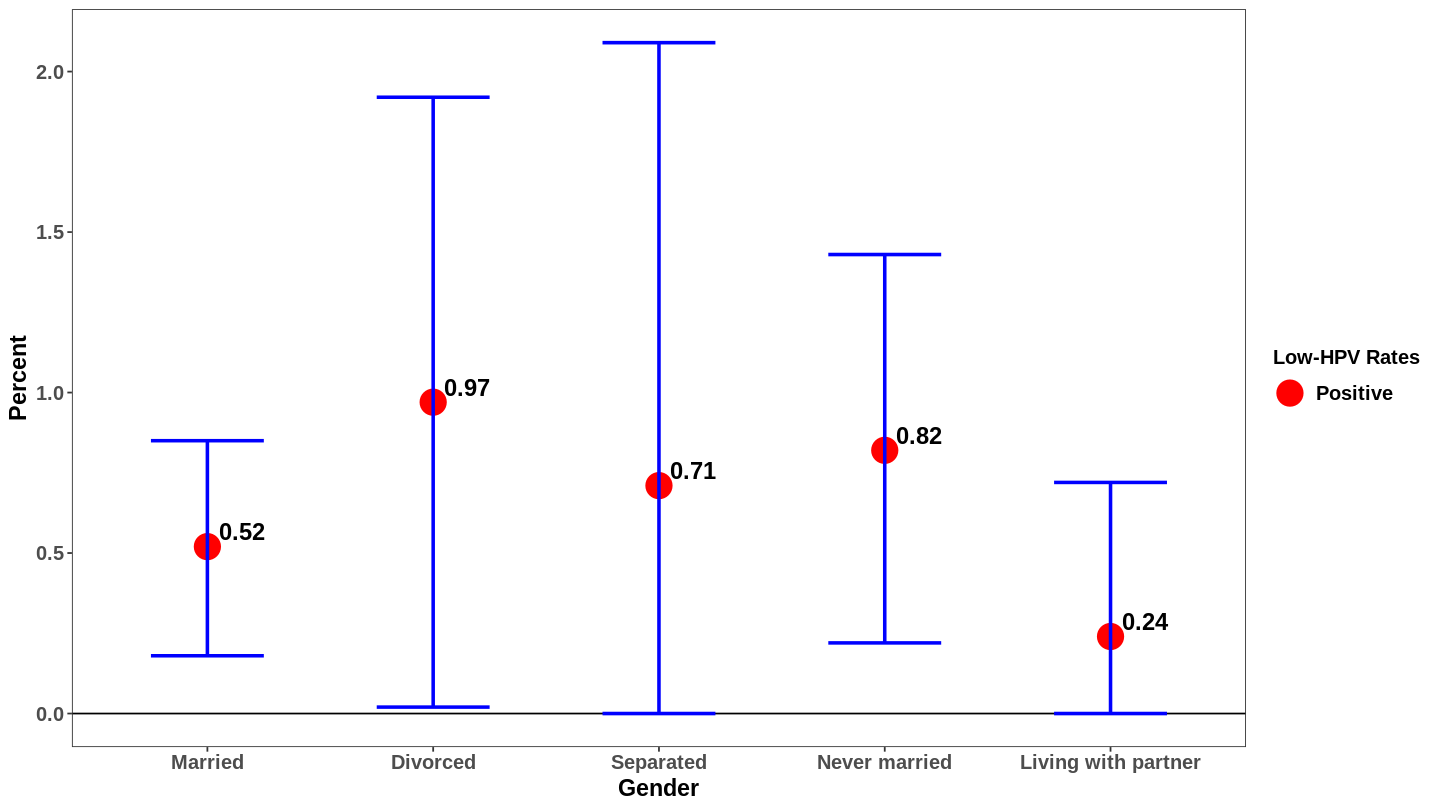

In [ ]:


low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(DMDMARTL), y = Percentage, fill = factor(low.HPV))) +
 # geom_bar(position="dodge", stat="identity", width = 0.9) +
 geom_point( colour = "red", size = 7) +
 geom_hline(yintercept = 0) +
  labs(x = "Gender", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))







The plot above shows the percentage proportion of the levels of marital status that tested positive for low HPV, and their confidence intervals. The proportion of married was 0.36 percent, widowed was 0.76 percent, seperated was 0.34 percent, never married was 0.81 percent and living with partner was 0.36 percent. None of the widowed tested positve for low HPV.


## **Smoking**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(LBDCOTLC != "NA")

HSV_df %$% freq(LBDCOTLC)

cat("\n\n\n")




LBDCOTLC,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,6086,69.91384
Below Limit,2619,30.08616
Total,8705,100.00000


From the frequency table above, the above detection (69.91) percent has the highest percentage of the total sample collected. 

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = LBDCOTLC)
tbl = HSV_df %$% table(high.HPV, LBDCOTLC)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")



,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,5837 [ 67.05% ],2569 [ 29.51% ],8406 [ 96.57% ]
Positive,249 [ 2.86% ],50 [ 0.57% ],299 [ 3.43% ]
Total,6086 [ 69.91% ],2619 [ 30.09% ],8705 [ 100% ]




 Chi-Square Test P-value:  0 
Fisher Exact Test P-value:  0 





For the Chi-square test above, the p-value less (0) than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the smoking variable. 

In [ ]:


high_hpv_var = HSV_df %>% select(high.HPV,LBDCOTLC) %>% group_by(LBDCOTLC, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(LBDCOTLC) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var

cat("\n\n\n")


LBDCOTLC,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,5837,67.05,6086,95.91,95.41,96.41
Above limit,Positive,249,2.86,6086,4.09,3.59,4.59
Below Limit,Negative,2569,29.51,2619,98.09,97.57,98.61
Below Limit,Positive,50,0.57,2619,1.91,1.39,2.43


Above limit(4.09) percent shows the highest positive rate for high HPV.









 







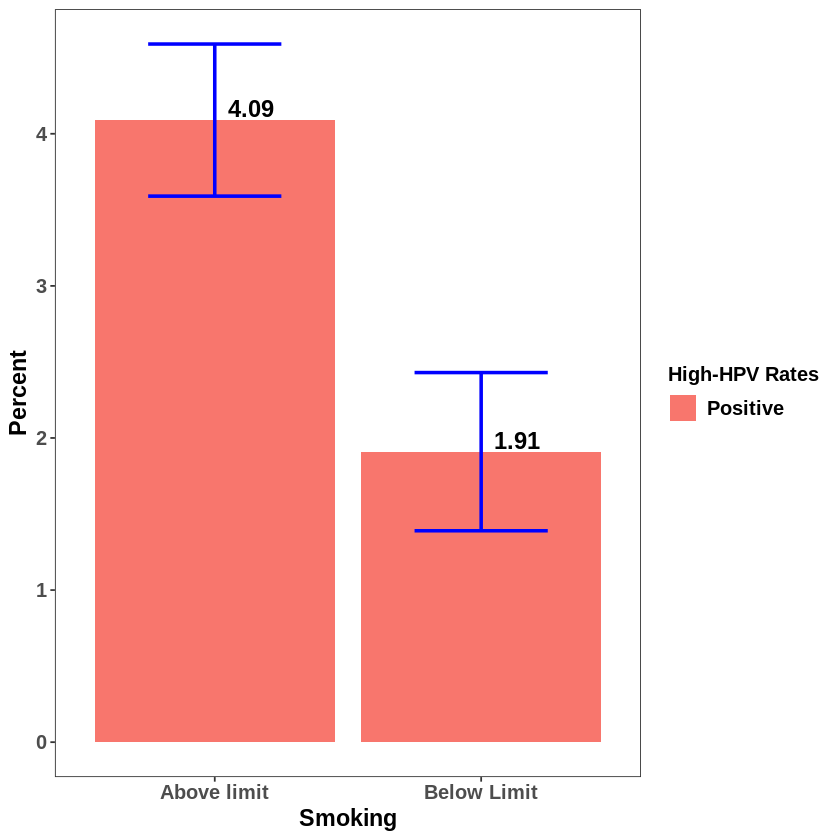

In [ ]:


high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(LBDCOTLC), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Smoking", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))




The bar plot above shows the percentage proportion of the levels of smoking that tested positive for high HPV, and their confidence intervals. The proportion above limit was 4.09 percent and below limit was 1.91 percent.

### **Low HPV Section**

In [ ]:



HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(LBDCOTLC != "NA")

HSV_df %$% freq(LBDCOTLC)

cat("\n\n\n")


LBDCOTLC,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,6086,69.91384
Below Limit,2619,30.08616
Total,8705,100.00000


From the frequency table above, the above detection (69.91) percent has the highest percentage of the total sample collected. 

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = LBDCOTLC)
tbl = HSV_df %$% table(low.HPV, LBDCOTLC)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")



,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,6050 [ 69.5% ],2615 [ 30.04% ],8665 [ 99.54% ]
Positive,36 [ 0.41% ],4 [ 0.05% ],40 [ 0.46% ]
Total,6086 [ 69.91% ],2619 [ 30.09% ],8705 [ 100% ]




 Chi-Square Test P-value:  0.00923 
Fisher Exact Test P-value:  0.00489 





For the Chi-square test above, the p-value (0.009) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the smoking variable. 

In [ ]:


low_hpv_var = HSV_df %>% select(low.HPV,LBDCOTLC) %>% group_by(LBDCOTLC, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(LBDCOTLC) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var

cat("\n\n\n")



LBDCOTLC,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,6050,69.50,6086,99.41,99.22,99.60
Above limit,Positive,36,0.41,6086,0.59,0.40,0.78
Below Limit,Negative,2615,30.04,2619,99.85,99.70,100.00
Below Limit,Positive,4,0.05,2619,0.15,0.00,0.30


Above limit(0.59) percent shows the highest positive rate for low HPV.









 







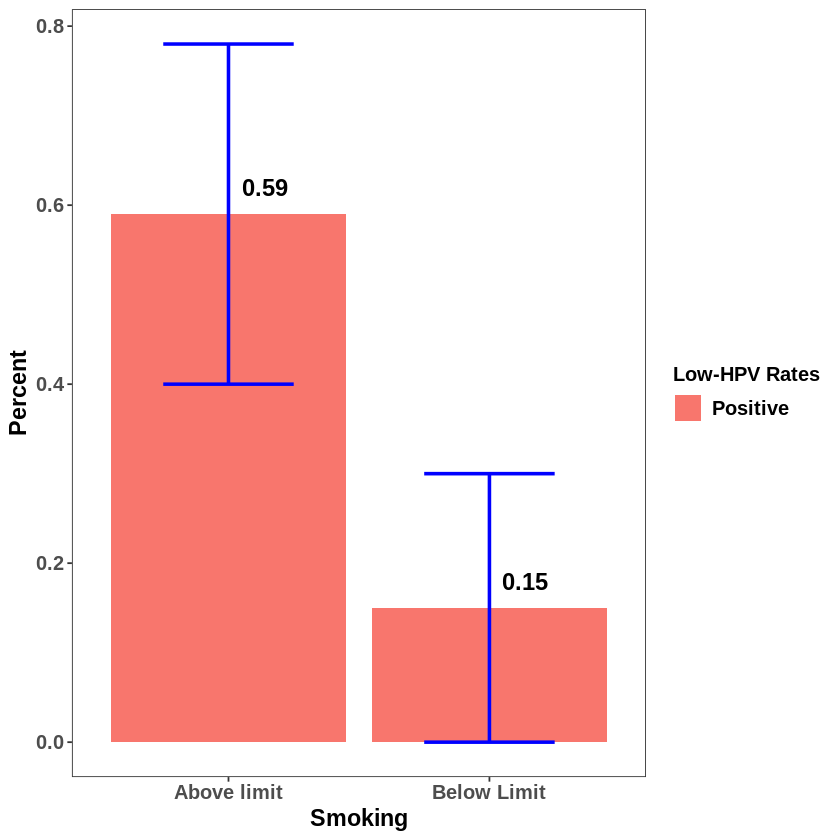

In [ ]:


low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(LBDCOTLC), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Smoking", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))







The bar plot above shows the percentage proportion of the levels of smoking status that tested positive for low HPV, and their confidence intervals. The proportion above limit was 0.59 percent and below limit was 0.15 percent.

## **Alcohol**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(ALQ101 != "NA")

HSV_df %$% freq(ALQ101)

cat("\n\n\n")


ALQ101,Freq,% Freq
<fct>,<int>,<dbl>
Yes,5958,70.17668
No,2532,29.82332
Total,8490,100.00000


From the frequency table above, the "yes" group (70.17)  percent has the highest percentage of the total sample collected. 


In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = ALQ101)
tbl = HSV_df %$% table(high.HPV, ALQ101)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Yes,No,Total
,<chr>,<chr>,<chr>
Negative,5710 [ 67.26% ],2479 [ 29.2% ],8189 [ 96.45% ]
Positive,248 [ 2.92% ],53 [ 0.62% ],301 [ 3.55% ]
Total,5958 [ 70.18% ],2532 [ 29.82% ],8490 [ 100% ]




 Chi-Square Test P-value:  0 
Fisher Exact Test P-value:  0 





For the Chi-square test above, the p-value (0) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the alcohol variable. 

In [ ]:

high_hpv_var = HSV_df %>% select(high.HPV,ALQ101) %>% group_by(ALQ101, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(ALQ101) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var



ALQ101,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Yes,Negative,5710,67.26,5958,95.84,95.33,96.34
Yes,Positive,248,2.92,5958,4.16,3.66,4.67
No,Negative,2479,29.20,2532,97.91,97.35,98.46
No,Positive,53,0.62,2532,2.09,1.54,2.65


The yes group(4.16) percent i.e took at least 12 alcohol drinks in one year, shows the highest positive rate for high HPV.










 







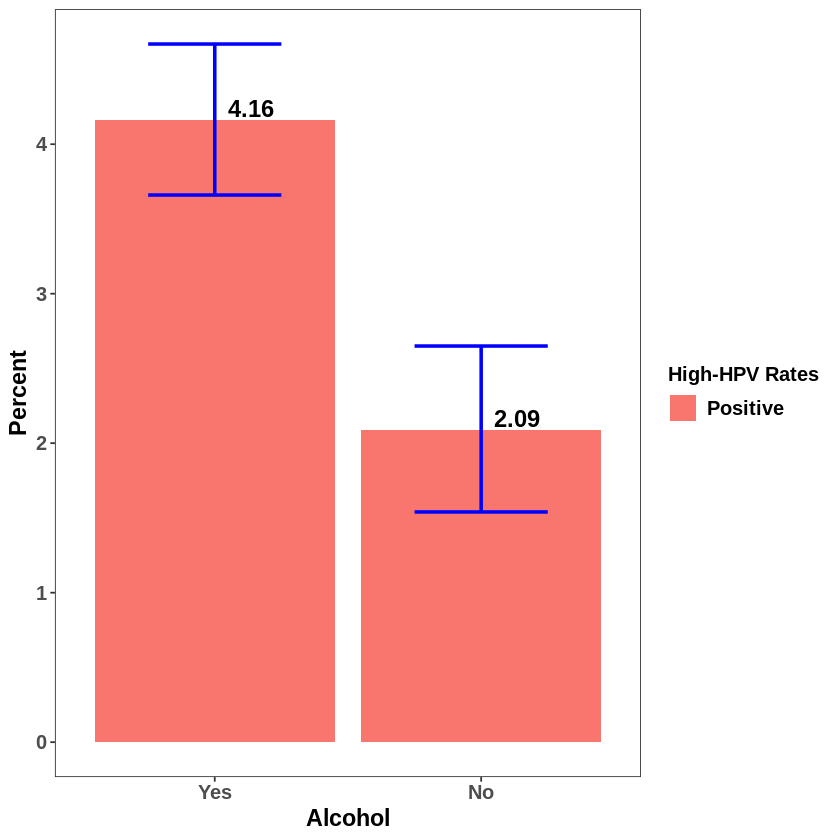

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(ALQ101), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Alcohol", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))



The bar plot above shows the percentage proportion of the levels of alcohol status that tested positive for high HPV, and their confidence intervals. The proportion that took at least 12 alcohol drink in a year(Yes) was 4.16 percent and the proportion that took less than 12 bottles in a year(No) was 2.09 percent.

### **Low HPV Section**

In [ ]:





HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(ALQ101 != "NA")

HSV_df %$% freq(ALQ101)

cat("\n\n\n")



ALQ101,Freq,% Freq
<fct>,<int>,<dbl>
Yes,5958,70.17668
No,2532,29.82332
Total,8490,100.00000


From the frequency table above, the "yes" group (70.17)  percent has the highest percentage of the total sample collected. 


In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = ALQ101)
tbl = HSV_df %$% table(low.HPV, ALQ101)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")



,Yes,No,Total
,<chr>,<chr>,<chr>
Negative,5926 [ 69.8% ],2526 [ 29.75% ],8452 [ 99.55% ]
Positive,32 [ 0.38% ],6 [ 0.07% ],38 [ 0.45% ]
Total,5958 [ 70.18% ],2532 [ 29.82% ],8490 [ 100% ]




 Chi-Square Test P-value:  0.08588 
Fisher Exact Test P-value:  0.07385 






For the Chi-square test above, the p-value (0.09) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the alcohol variable.


In [ ]:


low_hpv_var = HSV_df %>% select(low.HPV,ALQ101) %>% group_by(ALQ101, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(ALQ101) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var

cat("\n\n\n")



ALQ101,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Yes,Negative,5926,69.80,5958,99.46,99.28,99.65
Yes,Positive,32,0.38,5958,0.54,0.35,0.72
No,Negative,2526,29.75,2532,99.76,99.57,99.95
No,Positive,6,0.07,2532,0.24,0.05,0.43


The yes group(0.54) percent i.e took at least 12 alcohol drinks in one year ,shows the highest positive rate for low HPV.










 







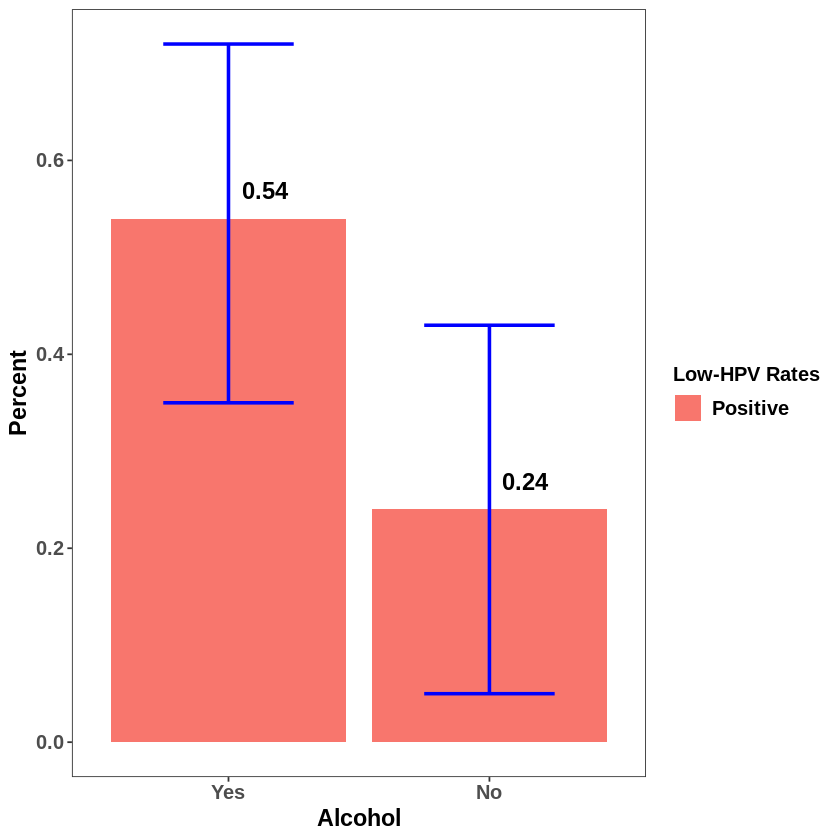

In [ ]:


low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(ALQ101), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Alcohol", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))









The bar plot above shows the percentage proportion of the levels of alcohol status that tested positive for low HPV, and their confidence intervals. The proportion that took at least 12 alcohol drink in a year(Yes) was 0.54 percent and the proportion that took less than 12 bottles in a year(No) was 0.24 percent.


In [ ]:
# setting figure size

fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}
fig(width = 12, heigth = 6.75)

## **Arsenic Level(1)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URDUA3LC.f != "NA")

HSV_df %$% freq(URDUA3LC.f)

cat("\n\n\n")


URDUA3LC.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,2556,65.53846
Below Limit,1344,34.46154
Total,3900,100.00000


From the frequency table above, the above detection limit (65.53) percent has the highest percentage of the total sample collected. 

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URDUA3LC.f)
tbl = HSV_df %$% table(high.HPV, URDUA3LC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")



,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,2440 [ 62.56% ],1293 [ 33.15% ],3733 [ 95.72% ]
Positive,116 [ 2.97% ],51 [ 1.31% ],167 [ 4.28% ]
Total,2556 [ 65.54% ],1344 [ 34.46% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.31392 
Fisher Exact Test P-value:  0.31791 






For the Chi-square test above, the p-value (0.31) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic level(1) variable.


In [ ]:


high_hpv_var = HSV_df %>% select(high.HPV,URDUA3LC.f) %>% group_by(URDUA3LC.f, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUA3LC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var

cat("\n\n\n")



URDUA3LC.f,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,2440,62.56,2556,95.46,94.65,96.27
Above limit,Positive,116,2.97,2556,4.54,3.73,5.35
Below Limit,Negative,1293,33.15,1344,96.21,95.18,97.23
Below Limit,Positive,51,1.31,1344,3.79,2.77,4.82


The above detection limit group(4.54) percent shows the highest positive rate for high HPV in arsenic level(1).












 







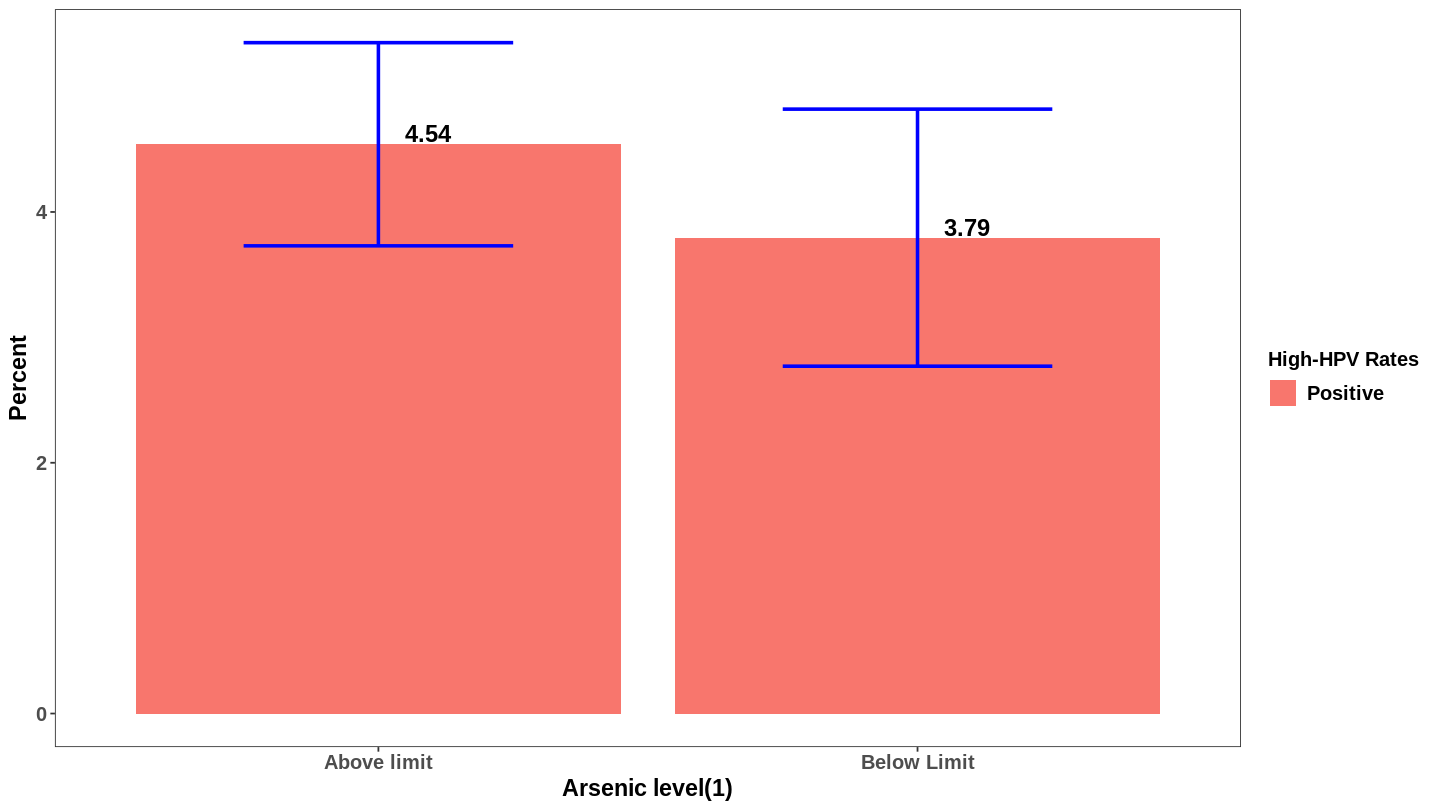

In [ ]:

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URDUA3LC.f), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(1)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))



The bar plot above shows the percentage proportion of arseniclevel(1) that tested positive for high HPV, and their confidence intervals. The proportion above detection limit was 4.54 percent and below detection limit was 3.79 percent.



### **Low HPV Section**

In [ ]:




HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URDUA3LC.f != "NA")

HSV_df %$% freq(URDUA3LC.f)

cat("\n\n\n")


URDUA3LC.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,2556,65.53846
Below Limit,1344,34.46154
Total,3900,100.00000


From the frequency table above, the above detection (65.53) percent has the highest percentage of the total sample collected. 

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URDUA3LC.f)
tbl = HSV_df %$% table(low.HPV, URDUA3LC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,2540 [ 65.13% ],1338 [ 34.31% ],3878 [ 99.44% ]
Positive,16 [ 0.41% ],6 [ 0.15% ],22 [ 0.56% ]
Total,2556 [ 65.54% ],1344 [ 34.46% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.62656 
Fisher Exact Test P-value:  0.65347 






For the Chi-square test above, the p-value (0.63) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic level(1) variable.


In [ ]:


low_hpv_var = HSV_df %>% select(low.HPV,URDUA3LC.f) %>% group_by(URDUA3LC.f, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUA3LC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URDUA3LC.f,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,2540,65.13,2556,99.37,99.07,99.68
Above limit,Positive,16,0.41,2556,0.63,0.32,0.93
Below Limit,Negative,1338,34.31,1344,99.55,99.20,99.91
Below Limit,Positive,6,0.15,1344,0.45,0.09,0.80


The above detection limit group(0.63) percent shows the highest positive rate for low HPV in arsenic level(1).













 







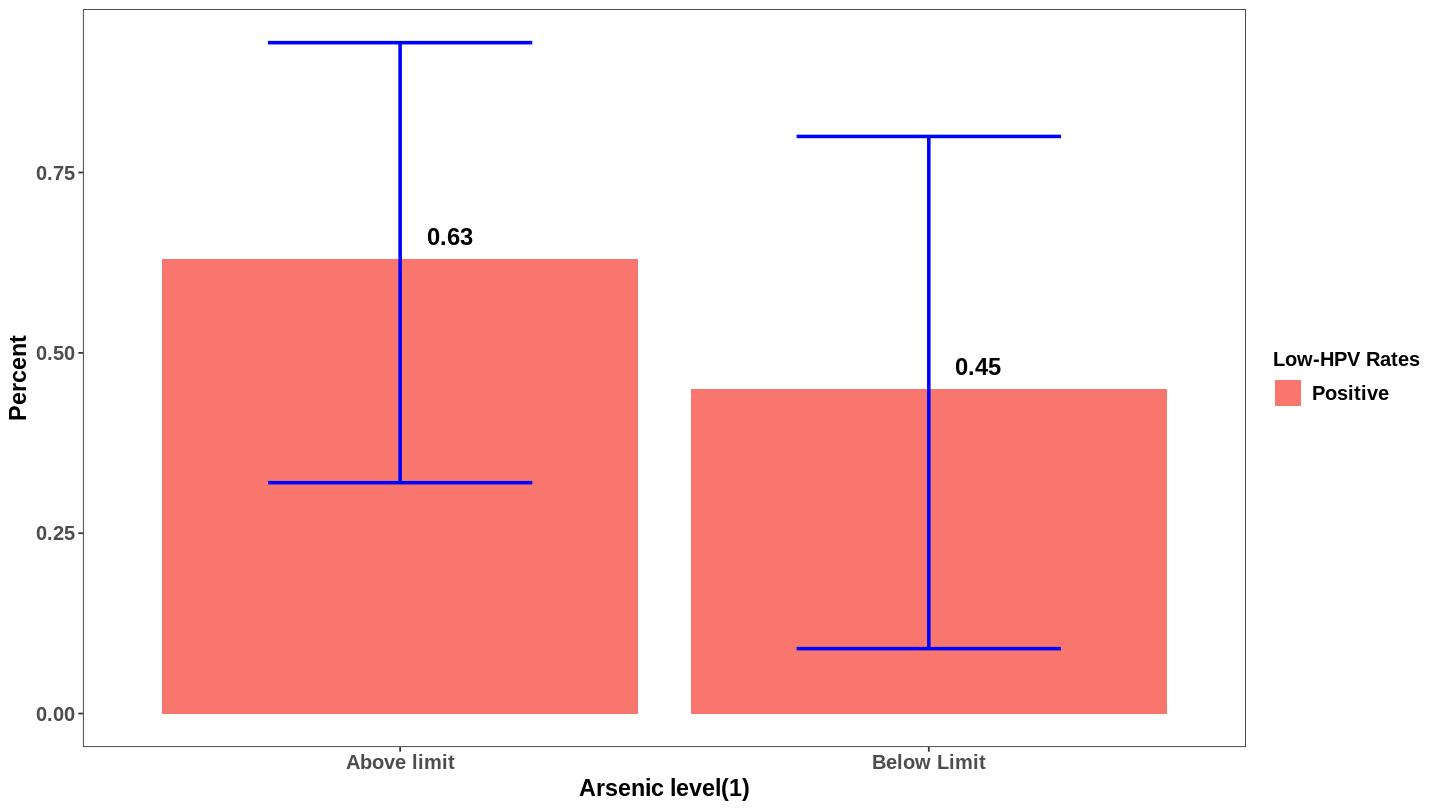

In [ ]:

cat("\n\n\n")


low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URDUA3LC.f), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(1)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))








The bar plot above shows the percentage proportion of arsenic level(1) that tested positive for low HPV, and their confidence intervals. The proportion above detection limit was 0.63 percent and below detection limit was 0.45 percent.

In [ ]:
# setting figure size

fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}
fig(width = 12, heigth = 6.75)

## **Arsenic level(2)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URDUA5LC.f != "NA")

HSV_df %$% freq(URDUA5LC.f)

cat("\n\n\n")




URDUA5LC.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,96,2.461538
Below Limit,3804,97.538462
Total,3900,100.000000


From the frequency table above, the below detection limit (97.53) percent has the highest percentage of the total sample collected. 

In [ ]:

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URDUA5LC.f)
tbl = HSV_df %$% table(high.HPV, URDUA5LC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")



,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,90 [ 2.31% ],3643 [ 93.41% ],3733 [ 95.72% ]
Positive,6 [ 0.15% ],161 [ 4.13% ],167 [ 4.28% ]
Total,96 [ 2.46% ],3804 [ 97.54% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.47824 
Fisher Exact Test P-value:  0.3041 





For the Chi-square test above, the p-value (0.48) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic level(2) variable.

In [ ]:


high_hpv_var = HSV_df %>% select(high.HPV,URDUA5LC.f) %>% group_by(URDUA5LC.f, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUA5LC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var

cat("\n\n\n")



URDUA5LC.f,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,90,2.31,96,93.75,88.91,98.59
Above limit,Positive,6,0.15,96,6.25,1.41,11.09
Below Limit,Negative,3643,93.41,3804,95.77,95.13,96.41
Below Limit,Positive,161,4.13,3804,4.23,3.59,4.87


The above detection limit group(6.25) percent shows the highest positive rate for high HPV in arsenic level(2).













 







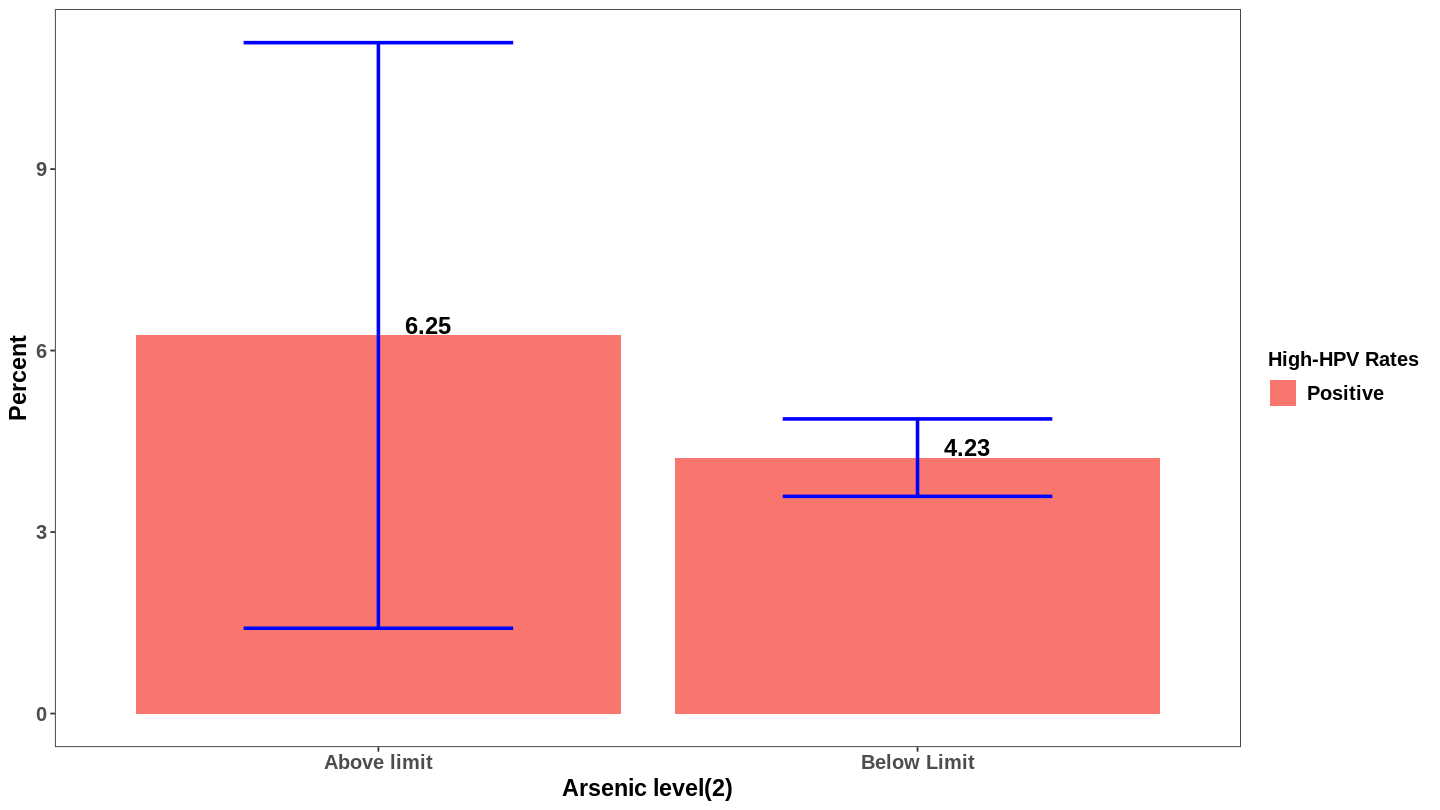

In [ ]:


high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URDUA5LC.f), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(2)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))




The bar plot above shows the percentage proportion of arsenic leve(2) that tested positive for high HPV, and their confidence intervals. The proportion above detection limit was 6.25 percent and below detection limit was 4.23 percent.

### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URDUA5LC.f != "NA")

HSV_df %$% freq(URDUA5LC.f)

cat("\n\n\n")


URDUA5LC.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,96,2.461538
Below Limit,3804,97.538462
Total,3900,100.000000


From the frequency table above, the below detection limit (97.53) percent has the highest percentage of the total sample collected. 

In [ ]:

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URDUA5LC.f)
tbl = HSV_df %$% table(low.HPV, URDUA5LC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,95 [ 2.44% ],3783 [ 97% ],3878 [ 99.44% ]
Positive,1 [ 0.03% ],21 [ 0.54% ],22 [ 0.56% ]
Total,96 [ 2.46% ],3804 [ 97.54% ],3900 [ 100% ]




 Chi-Square Test P-value:  1 
Fisher Exact Test P-value:  0.42294 






For the Chi-square test above, the p-value greater (1.00) than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic level(2) variable.


In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,URDUA5LC.f) %>% group_by(URDUA5LC.f, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUA5LC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URDUA5LC.f,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,95,2.44,96,98.96,96.93,100.99
Above limit,Positive,1,0.03,96,1.04,-0.99,3.07
Below Limit,Negative,3783,97.00,3804,99.45,99.21,99.68
Below Limit,Positive,21,0.54,3804,0.55,0.32,0.79


The above detection limit group(1.04) percent shows the highest positive rate for low HPV in arsenic level(2).













 







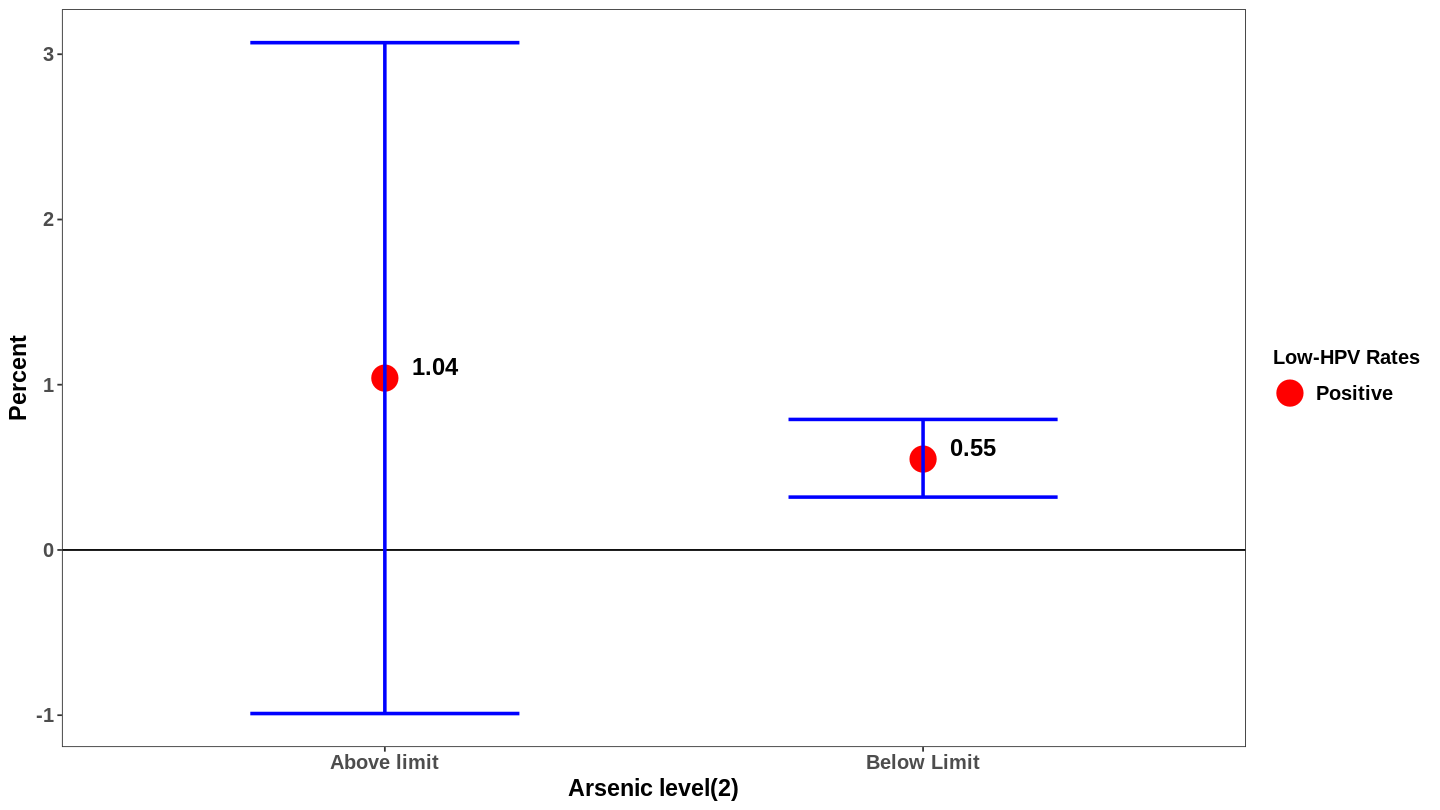

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URDUA5LC.f), y = Percentage, fill = factor(low.HPV))) +
 # geom_bar(position="dodge", stat="identity", width = 0.9) +
 geom_point( colour = "red", size = 7) +
 geom_hline(yintercept = 0) +
  labs(x = "Arsenic level(2)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))








The plot above shows the percentage proportion of arsenic level(2) that tested positive for low HPV and their confidence intervals. The proportion above detection limit was 1.04 percent and below detection limit was 0.55 percent.






# **Arsenic level(3)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URDUABLC.f != "NA")

HSV_df %$% freq(URDUABLC.f)

cat("\n\n\n")


URDUABLC.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,1837,47.10256
Below Limit,2063,52.89744
Total,3900,100.00000


From the frequency table above, the below detection limit (52.89) percent has the highest percentage of the total sample collected. Followed closely by below detection limit (47.10) percent. 

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URDUABLC.f)
tbl = HSV_df %$% table(high.HPV, URDUABLC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,1759 [ 45.1% ],1974 [ 50.62% ],3733 [ 95.72% ]
Positive,78 [ 2% ],89 [ 2.28% ],167 [ 4.28% ]
Total,1837 [ 47.1% ],2063 [ 52.9% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.97961 
Fisher Exact Test P-value:  0.93699 



For the Chi-square test above, the p-value (0.97) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic level(3) variable.


In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URDUABLC.f) %>% group_by(URDUABLC.f, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUABLC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URDUABLC.f,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,1759,45.10,1837,95.75,94.83,96.68
Above limit,Positive,78,2.00,1837,4.25,3.32,5.17
Below Limit,Negative,1974,50.62,2063,95.69,94.81,96.56
Below Limit,Positive,89,2.28,2063,4.31,3.44,5.19


The below detection limit group(2.28) percent shows the highest positive rate for high HPV in arsenic level(3).













 







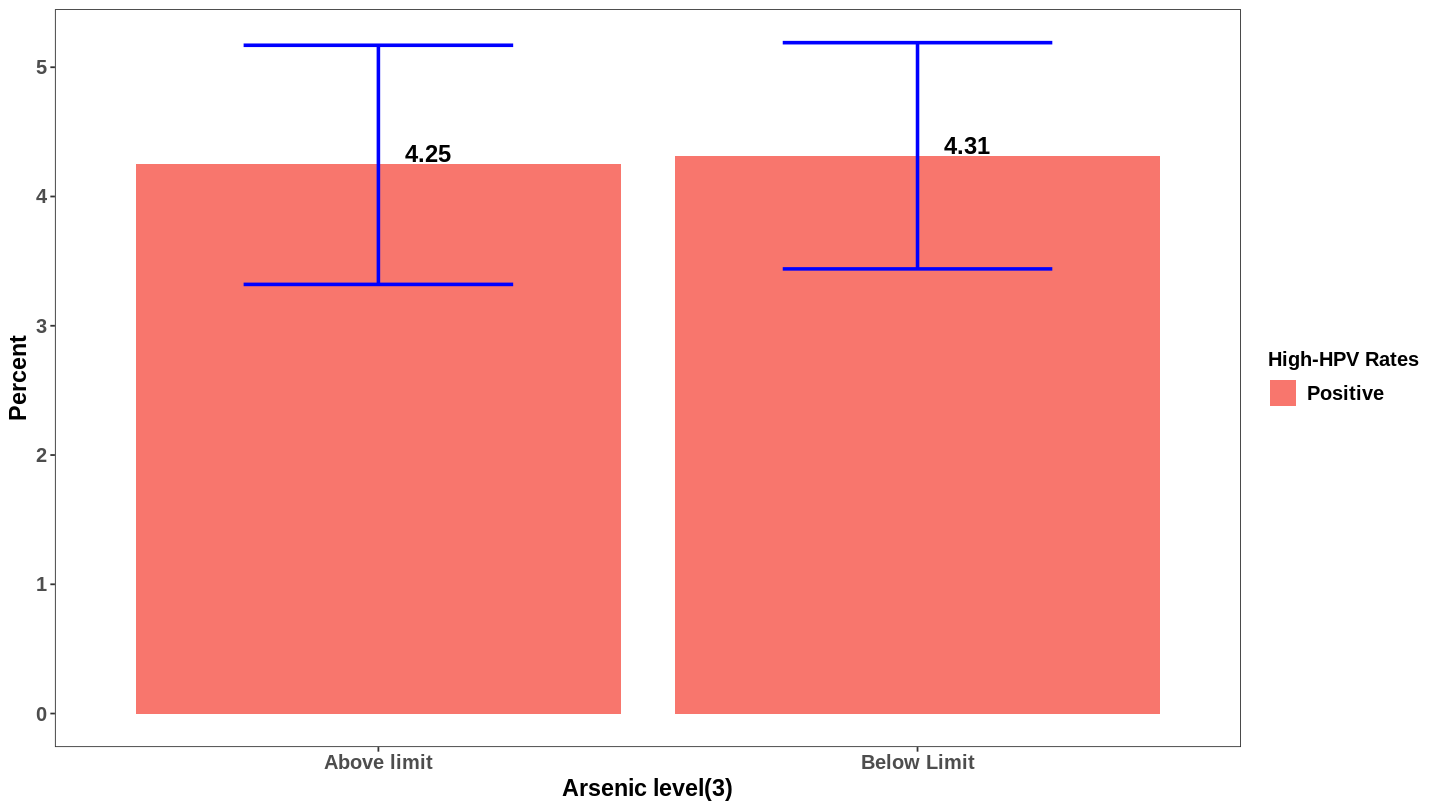

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URDUABLC.f), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(3)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))





The bar plot above shows the percentage proportion of arsenic level(3) that tested positive for high HPV, and their confidence intervals. The proportion that was above detection limit was 4.25 percent and below detection limit was 4.31 percent.

### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URDUABLC.f != "NA")

HSV_df %$% freq(URDUABLC.f)


URDUABLC.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,1837,47.10256
Below Limit,2063,52.89744
Total,3900,100.00000


From the frequency table above, the below detection limit (52.89) percent has the highest percentage of the total sample collected. Followed closely by below detection limit (47.10) percent. 

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URDUABLC.f)
tbl = HSV_df %$% table(low.HPV, URDUABLC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,1827 [ 46.85% ],2051 [ 52.59% ],3878 [ 99.44% ]
Positive,10 [ 0.26% ],12 [ 0.31% ],22 [ 0.56% ]
Total,1837 [ 47.1% ],2063 [ 52.9% ],3900 [ 100% ]




 Chi-Square Test P-value:  1 
Fisher Exact Test P-value:  1 


For the Chi-square test above, the p-value (1.00) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic level(3) variable.







In [ ]:

cat("\n\n\n")

low_hpv_var = HSV_df %>% select(low.HPV,URDUABLC.f) %>% group_by(URDUABLC.f, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUABLC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URDUABLC.f,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,1827,46.85,1837,99.46,99.12,99.79
Above limit,Positive,10,0.26,1837,0.54,0.21,0.88
Below Limit,Negative,2051,52.59,2063,99.42,99.09,99.75
Below Limit,Positive,12,0.31,2063,0.58,0.25,0.91


The below detection limit group(0.31) percent shows the highest positive rate for low HPV in arsenic level(3).













 







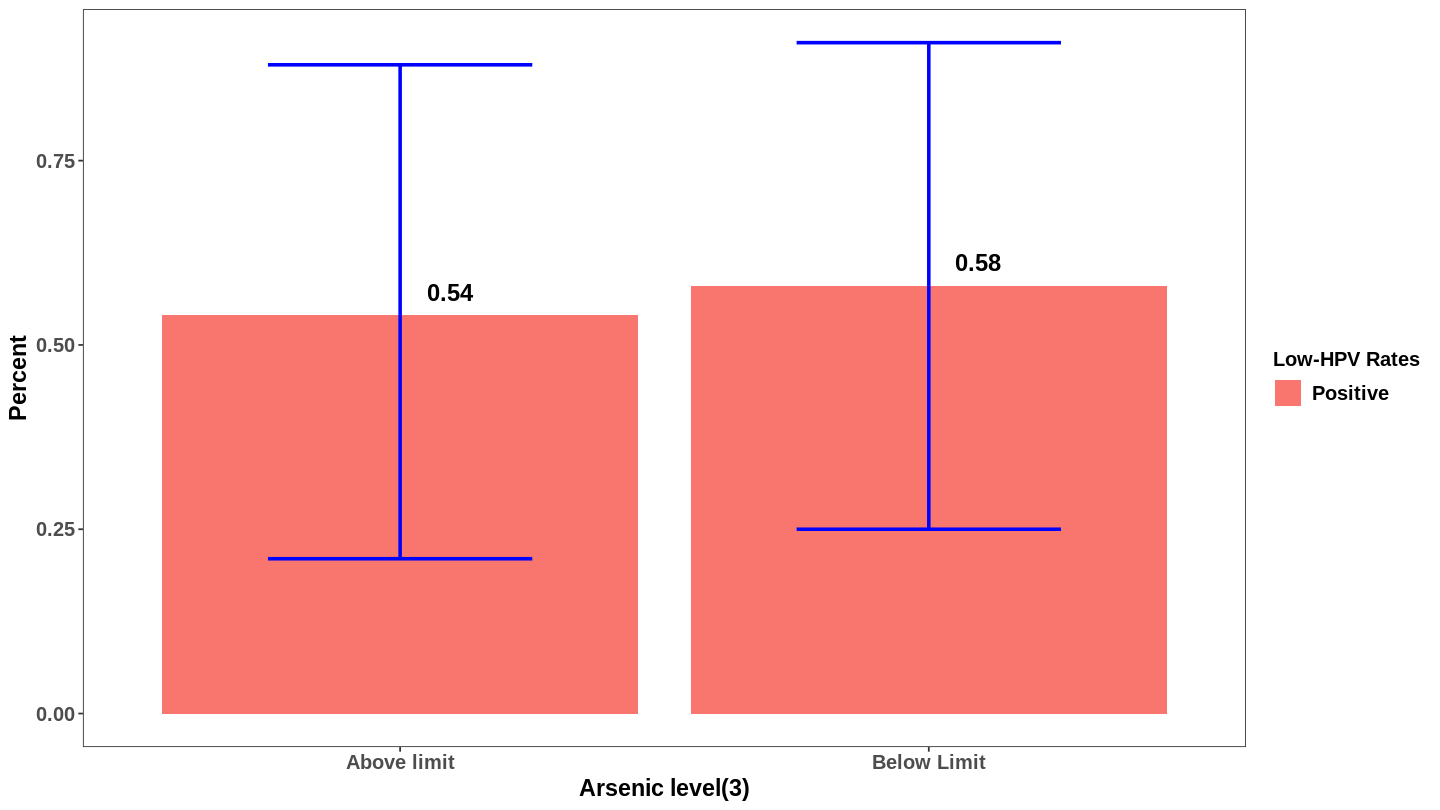

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URDUABLC.f), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(3)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The bar plot above shows the percentage proportion of arsenic level(3) that tested positive for low HPV, and their confidence intervals. The proportion that was above detection limit was 0.54 percent and below detection limit was 0.58 percent.


# **Arsenic level(4)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URDUACLC.f != "NA")

HSV_df %$% freq(URDUACLC.f)


URDUACLC.f,Freq,% Freq
<fct>,<int>,<dbl>
0.0,671,17.20513
1.0,3229,82.79487
Total,3900,100.00000


From the frequency table above, the below detection limit (82.79) percent has the highest percentage of the total sample collected.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URDUACLC.f)
tbl = HSV_df %$% table(high.HPV, URDUACLC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,0.0,1.0,Total
,<chr>,<chr>,<chr>
Negative,643 [ 16.49% ],3090 [ 79.23% ],3733 [ 95.72% ]
Positive,28 [ 0.72% ],139 [ 3.56% ],167 [ 4.28% ]
Total,671 [ 17.21% ],3229 [ 82.79% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.96113 
Fisher Exact Test P-value:  1 


For the Chi-square test above, the p-value (0.10) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic level(4) variable.







In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URDUACLC.f) %>% group_by(URDUACLC.f, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUACLC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URDUACLC.f,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.0,Negative,643,16.49,671,95.83,94.31,97.34
0.0,Positive,28,0.72,671,4.17,2.66,5.69
1.0,Negative,3090,79.23,3229,95.70,95.00,96.40
1.0,Positive,139,3.56,3229,4.30,3.60,5.00


The above detection limit group(4.03) percent shows the highest positive rate for high HPV in arsenic level(4).

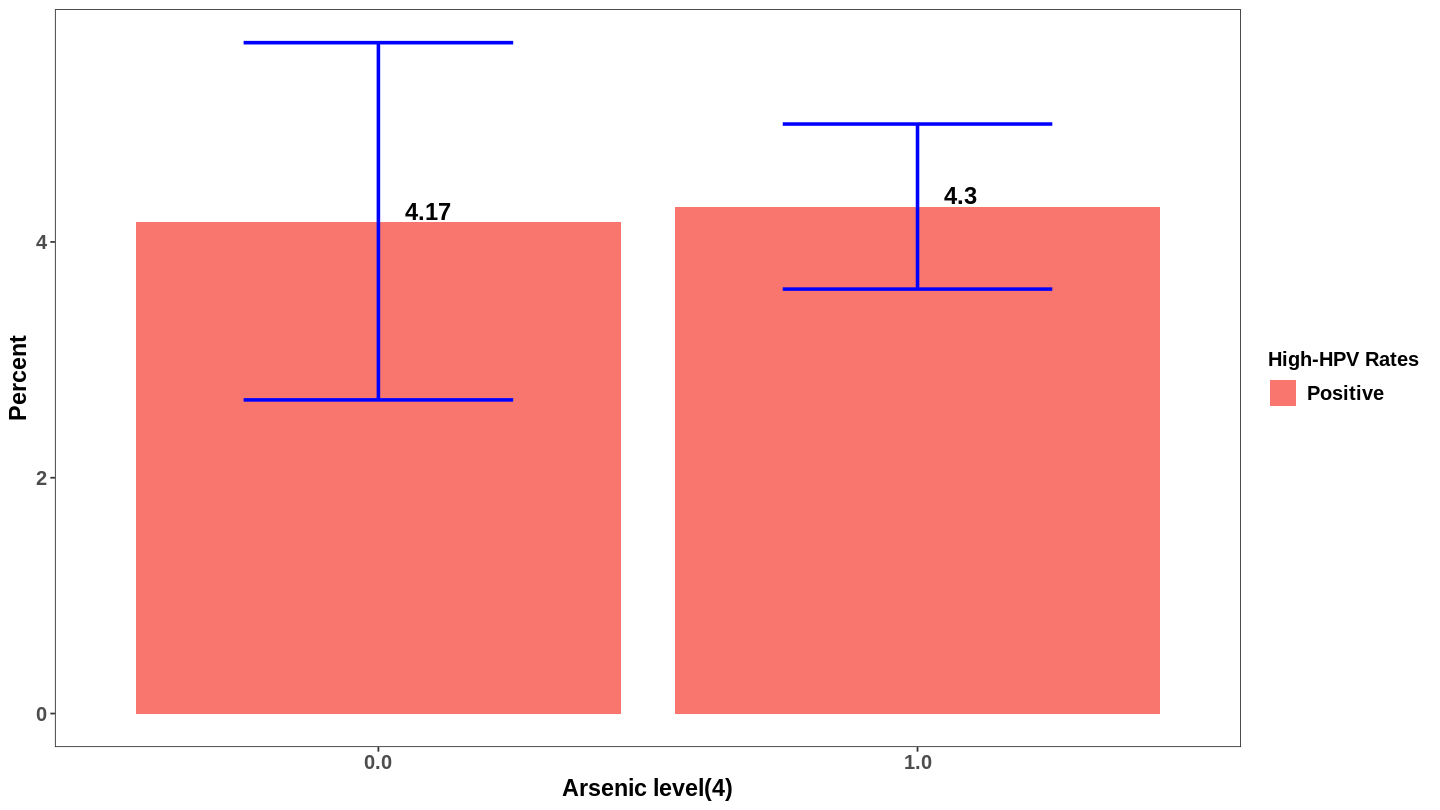

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URDUACLC.f), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(4)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))





The bar plot above shows the percentage proportion of arsenic level(4) that tested positive for high HPV, and their confidence intervals. The proportion that was above detection limit was 4.17 percent and below detection limit was 4.3 percent.

### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URDUACLC.f != "NA")

HSV_df %$% freq(URDUACLC.f)

cat("\n\n\n")


URDUACLC.f,Freq,% Freq
<fct>,<int>,<dbl>
0.0,671,17.20513
1.0,3229,82.79487
Total,3900,100.00000


From the frequency table above, the below detection limit (82.79) percent has the highest percentage of the total sample collected.

In [ ]:

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URDUACLC.f)
tbl = HSV_df %$% table(low.HPV, URDUACLC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,0.0,1.0,Total
,<chr>,<chr>,<chr>
Negative,668 [ 17.13% ],3210 [ 82.31% ],3878 [ 99.44% ]
Positive,3 [ 0.08% ],19 [ 0.49% ],22 [ 0.56% ]
Total,671 [ 17.21% ],3229 [ 82.79% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.87168 
Fisher Exact Test P-value:  1 





For the Chi-square test above, the p-value (0.87) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic level(4) variable.







In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,URDUACLC.f) %>% group_by(URDUACLC.f, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUACLC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URDUACLC.f,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.0,Negative,668,17.13,671,99.55,99.05,100.06
0.0,Positive,3,0.08,671,0.45,-0.06,0.95
1.0,Negative,3210,82.31,3229,99.41,99.15,99.68
1.0,Positive,19,0.49,3229,0.59,0.32,0.85


The above detection limit group(0.59) percent shows the highest positive rate for high HPV in arsenic level(4).

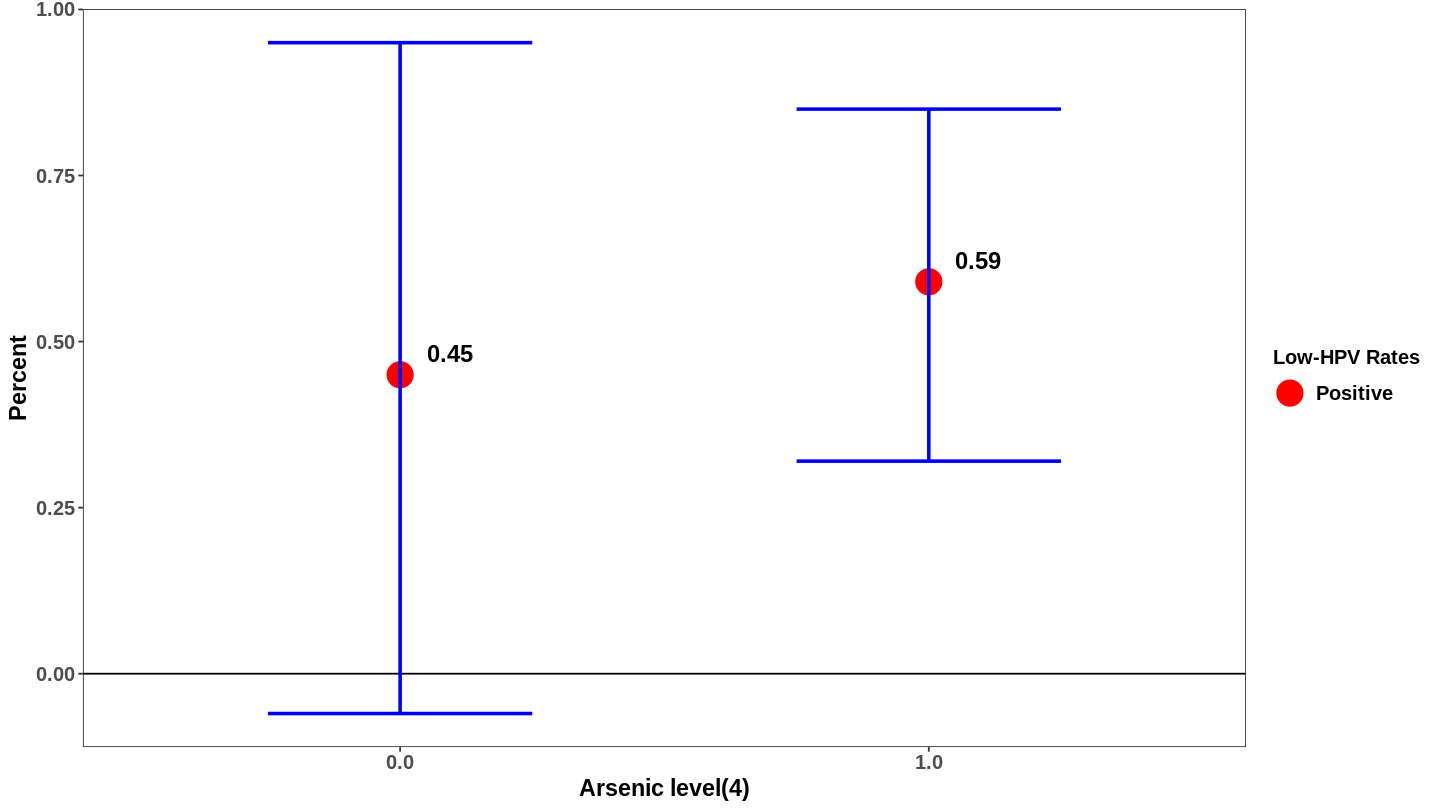

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URDUACLC.f), y = Percentage, fill = factor(low.HPV))) +
 # geom_bar(position="dodge", stat="identity", width = 0.9) +
 geom_point( colour = "red", size = 7) +
 geom_hline(yintercept = 0) +
  labs(x = "Arsenic level(4)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The plot above shows the percentage proportion of arsenic level(4) that tested positive for low HPV, and their confidence intervals. The proportion that was above detection limit was 0.45 percent and below detection limit was 0.59 percent.


# **Arsenic level(5)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URDUDALC.f != "NA")

HSV_df %$% freq(URDUDALC.f)


URDUDALC.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,671,17.20513
Below Limit,3229,82.79487
Total,3900,100.00000


From the frequency table above, the below detection limit (82.79) percent has the highest percentage of the total sample collected.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URDUDALC.f)
tbl = HSV_df %$% table(high.HPV, URDUDALC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,643 [ 16.49% ],3090 [ 79.23% ],3733 [ 95.72% ]
Positive,28 [ 0.72% ],139 [ 3.56% ],167 [ 4.28% ]
Total,671 [ 17.21% ],3229 [ 82.79% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.96113 
Fisher Exact Test P-value:  1 


For the Chi-square test above, the p-value (0.96) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic level(5) variable.







In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URDUDALC.f) %>% group_by(URDUDALC.f, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUDALC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URDUDALC.f,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,643,16.49,671,95.83,94.31,97.34
Above limit,Positive,28,0.72,671,4.17,2.66,5.69
Below Limit,Negative,3090,79.23,3229,95.70,95.00,96.40
Below Limit,Positive,139,3.56,3229,4.30,3.60,5.00


The below detection limit group(4.30) percent shows the highest positive rate for high HPV in arsenic level(5)



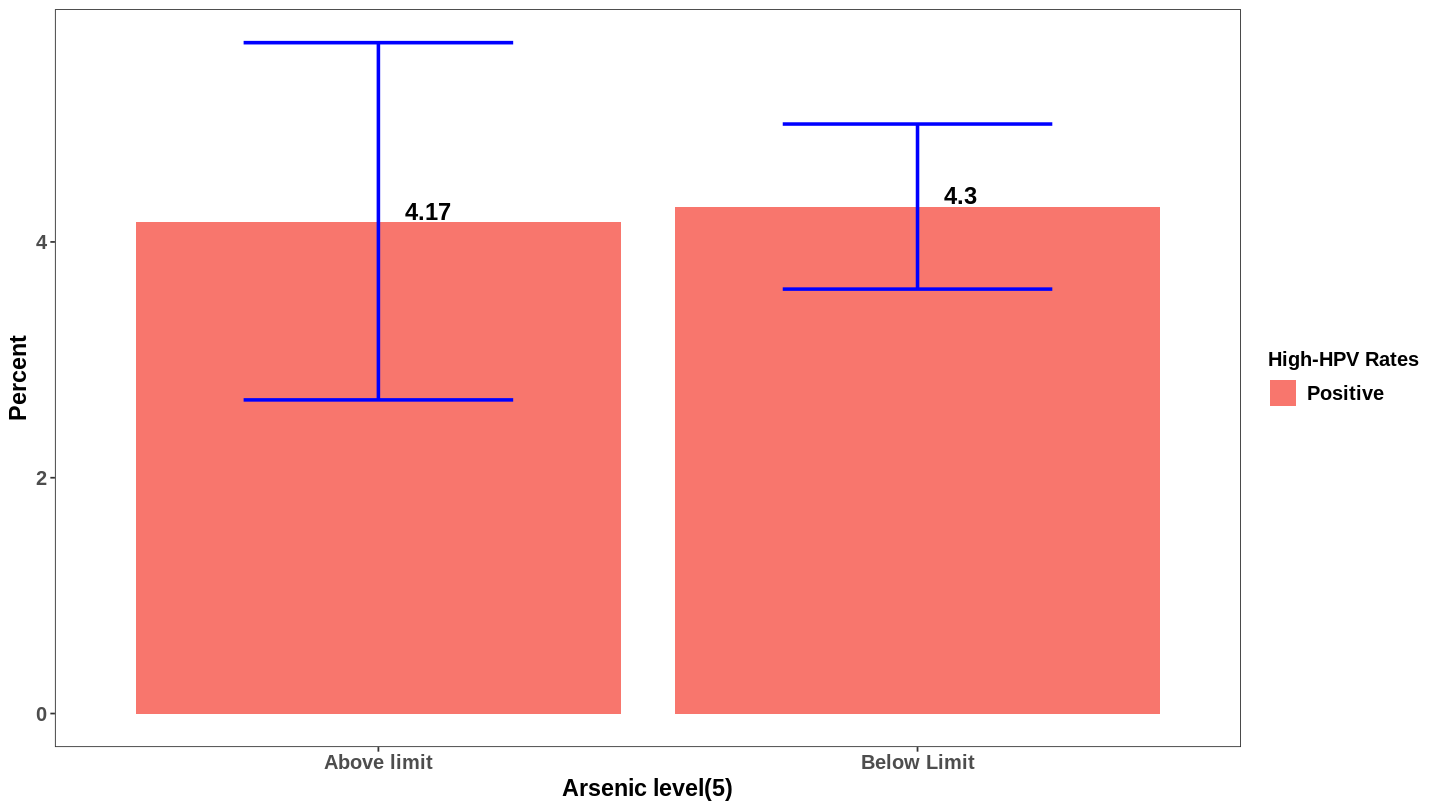

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URDUDALC.f), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(5)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))






The bar plot above shows the percentage proportion of arsenic level(5) that tested positive for high HPV, and their confidence intervals. The proportion that was above detection limit was 4.17 percent and below detection limit was 4.3 percent.


### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URDUDALC.f != "NA")

HSV_df %$% freq(URDUDALC.f)


URDUDALC.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,671,17.20513
Below Limit,3229,82.79487
Total,3900,100.00000


From the frequency table above, the below detection limit (82.79) percent has the highest percentage of the total sample collected.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URDUDALC.f)
tbl = HSV_df %$% table(low.HPV, URDUDALC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,668 [ 17.13% ],3210 [ 82.31% ],3878 [ 99.44% ]
Positive,3 [ 0.08% ],19 [ 0.49% ],22 [ 0.56% ]
Total,671 [ 17.21% ],3229 [ 82.79% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.87168 
Fisher Exact Test P-value:  1 


For the Chi-square test above, the p-value (0.87) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic level(5) variable.







In [ ]:

cat("\n\n\n")

low_hpv_var = HSV_df %>% select(low.HPV,URDUDALC.f) %>% group_by(URDUDALC.f, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUDALC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var

cat("\n\n\n")


URDUDALC.f,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,668,17.13,671,99.55,99.05,100.06
Above limit,Positive,3,0.08,671,0.45,-0.06,0.95
Below Limit,Negative,3210,82.31,3229,99.41,99.15,99.68
Below Limit,Positive,19,0.49,3229,0.59,0.32,0.85


The below detection limit group(0.59) percent shows the highest positive rate for low HPV in arsenic level(5)



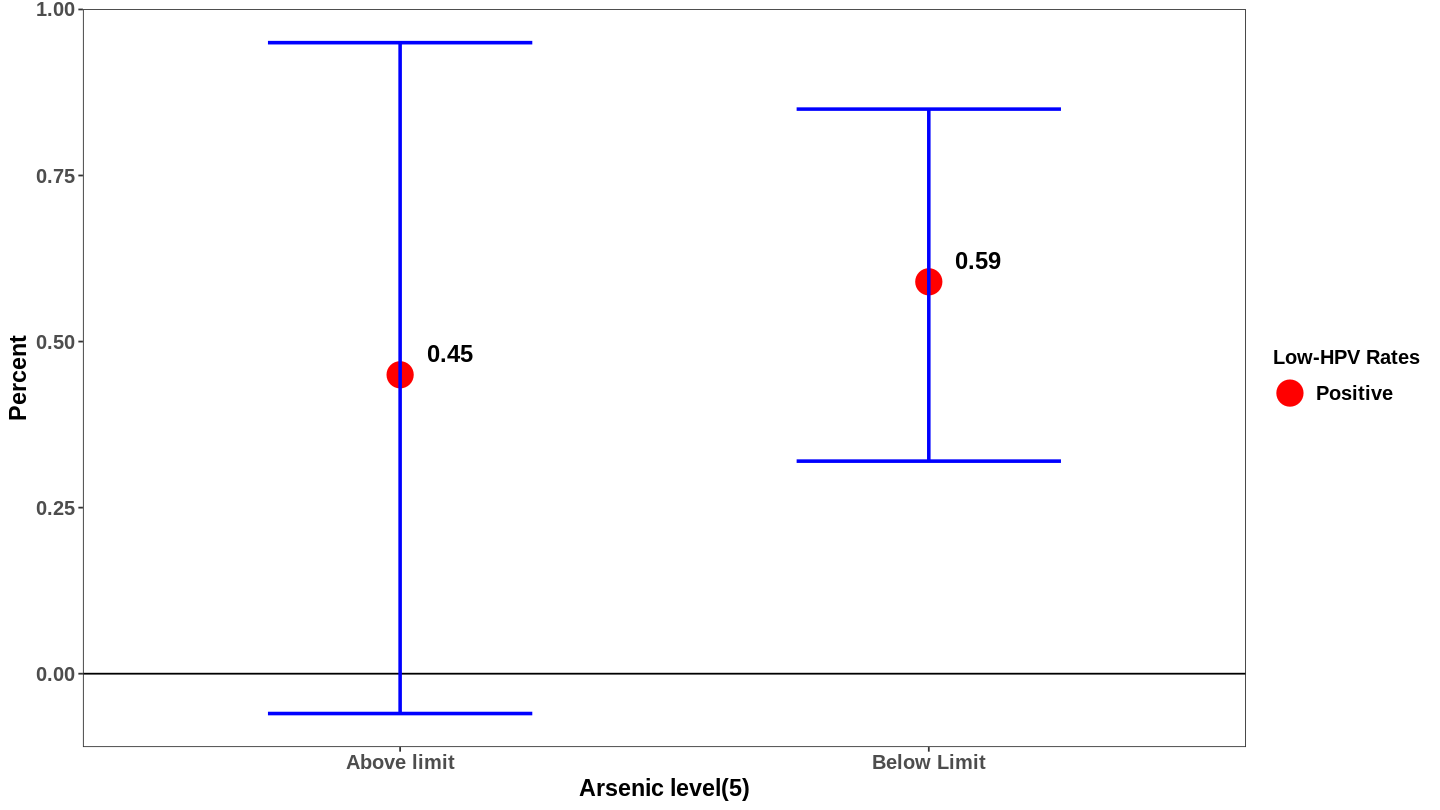

In [ ]:

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URDUDALC.f), y = Percentage, fill = factor(low.HPV))) +
 # geom_bar(position="dodge", stat="identity", width = 0.9) +
   geom_point( colour = "red", size = 7) +
   geom_hline(yintercept = 0) +
  labs(x = "Arsenic level(5)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))









The plot above shows the percentage proportion of arsenic level(5) that tested positive for low HPV, and their confidence intervals. The proportion that was above detection limit was 0.45 percent and below detection limit was 0.59 percent.

# **Arsenic level(6)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URDUMMAL.f != "NA")

HSV_df %$% freq(URDUMMAL.f)


URDUMMAL.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,2613,67
Below Limit,1287,33
Total,3900,100


From the frequency table above, the below detection limit (67) percent has the highest percentage of the total sample collected.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URDUMMAL.f)
tbl = HSV_df %$% table(high.HPV, URDUMMAL.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,2488 [ 63.79% ],1245 [ 31.92% ],3733 [ 95.72% ]
Positive,125 [ 3.21% ],42 [ 1.08% ],167 [ 4.28% ]
Total,2613 [ 67% ],1287 [ 33% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.03391 
Fisher Exact Test P-value:  0.02861 





For the Chi-square test above, the p-value (0.03) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the arsenic level(6) variable. 

In [ ]:

high_hpv_var = HSV_df %>% select(high.HPV,URDUMMAL.f) %>% group_by(URDUMMAL.f, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUMMAL.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URDUMMAL.f,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,2488,63.79,2613,95.22,94.40,96.03
Above limit,Positive,125,3.21,2613,4.78,3.97,5.60
Below Limit,Negative,1245,31.92,1287,96.74,95.77,97.71
Below Limit,Positive,42,1.08,1287,3.26,2.29,4.23


The above detection limit group(4.78) percent shows the highest positive rate for high HPV in arsenic level(6).



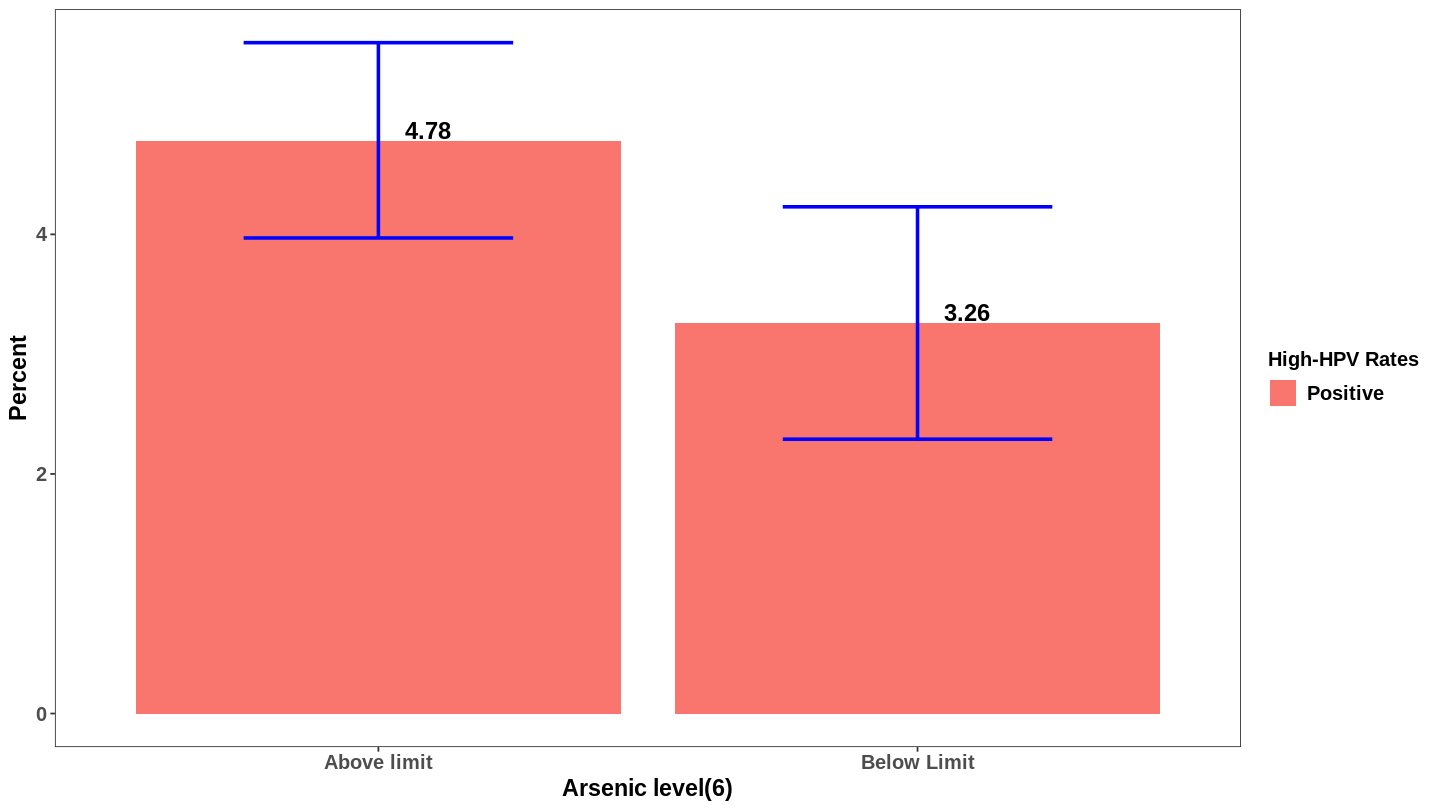

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URDUMMAL.f), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(6)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))




The bar plot above shows the percentage proportion of arsenic level(6) that tested positive for high HPV, and their confidence intervals. The proportion that was above detection limit was 4.78 percent and was below detection limit was 3.26 percent.


### **Low HPV Section**

In [ ]:




HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URDUMMAL.f != "NA")

HSV_df %$% freq(URDUMMAL.f)


URDUMMAL.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,2613,67
Below Limit,1287,33
Total,3900,100


From the frequency table above, the below detection limit (67) percent has the highest percentage of the total sample collected.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URDUMMAL.f)
tbl = HSV_df %$% table(low.HPV, URDUMMAL.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,2597 [ 66.59% ],1281 [ 32.85% ],3878 [ 99.44% ]
Positive,16 [ 0.41% ],6 [ 0.15% ],22 [ 0.56% ]
Total,2613 [ 67% ],1287 [ 33% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.72967 
Fisher Exact Test P-value:  0.655 






For the Chi-square test above, the p-value (0.73) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic level(6) variable.


In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,URDUMMAL.f) %>% group_by(URDUMMAL.f, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUMMAL.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URDUMMAL.f,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,2597,66.59,2613,99.39,99.09,99.69
Above limit,Positive,16,0.41,2613,0.61,0.31,0.91
Below Limit,Negative,1281,32.85,1287,99.53,99.16,99.91
Below Limit,Positive,6,0.15,1287,0.47,0.09,0.84


The above detection limit group(0.61) percent shows the highest positive rate for low HPV in arsenic level(6).



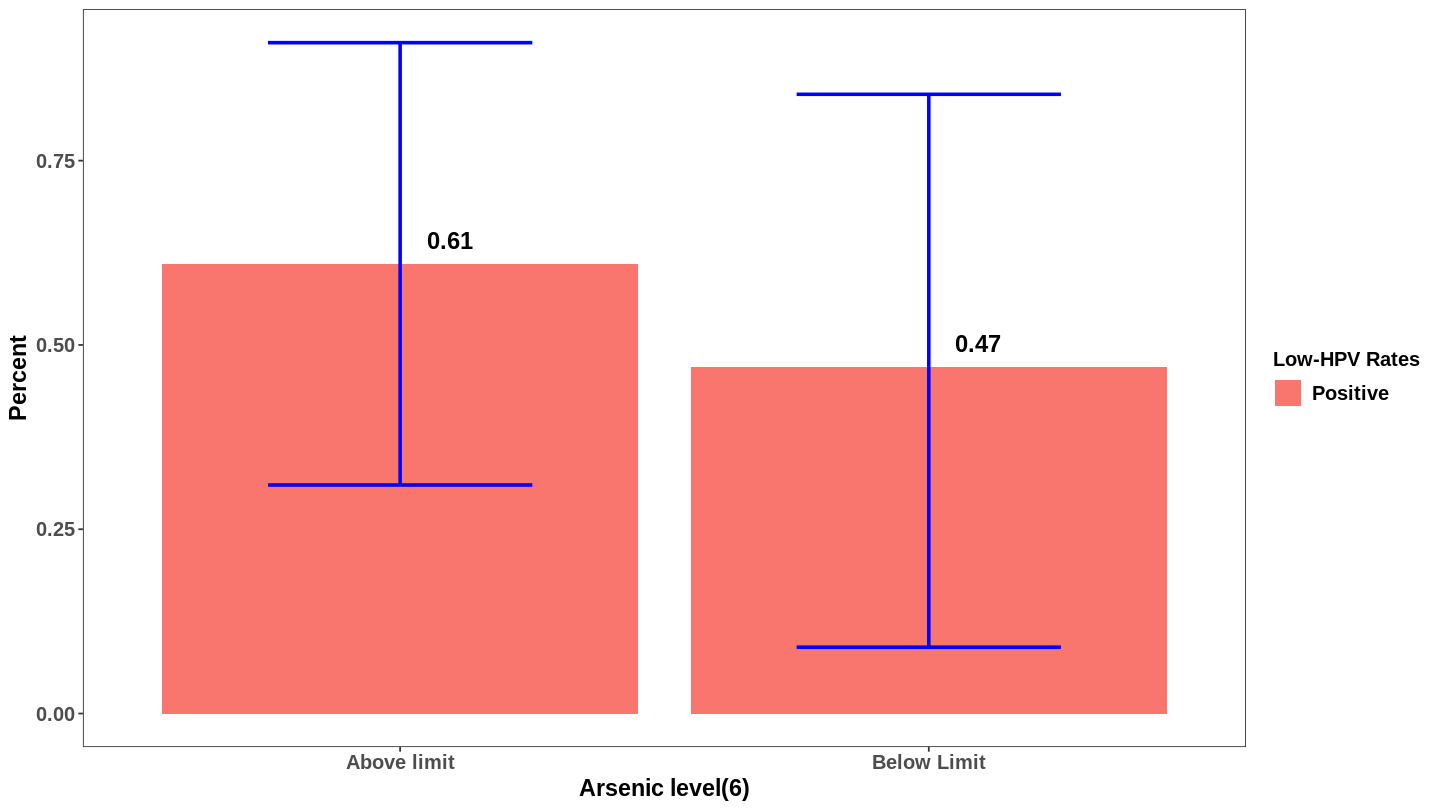

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URDUMMAL.f), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(6)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))









The bar plot above shows the percentage proportion of arsenic that tested positive for low HPV, and their confidence intervals. The proportion above detection limit was 0.61 percent and below detection limit was 0.47 percent.

# **Arsenic by Quantile (1)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URXUAB.q != "NA")

HSV_df %$% freq(URXUAB.q)


URXUAB.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,2063,52.89744
Q1,470,12.05128
Q2,468,12.00000
Q3,468,12.00000
Q4,431,11.05128
Total,3900,100.00000


From the frequency table above, the below detection limit (52.89) percent has the highest percentage of the total sample collected. Q1(12.05%), Q2(12.00%), Q3(12.00%), and Q4(11.05%) are close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URXUAB.q)
tbl = HSV_df %$% table(high.HPV, URXUAB.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1974 [ 50.62% ],443 [ 11.36% ],445 [ 11.41% ],454 [ 11.64% ],417 [ 10.69% ],3733 [ 95.72% ]
Positive,89 [ 2.28% ],27 [ 0.69% ],23 [ 0.59% ],14 [ 0.36% ],14 [ 0.36% ],167 [ 4.28% ]
Total,2063 [ 52.9% ],470 [ 12.05% ],468 [ 12% ],468 [ 12% ],431 [ 11.05% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.20362 
Fisher Exact Test P-value:  0.20949 



For the Chi-square test above, the p-value (0.20) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic by quantile(1) variable.


In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URXUAB.q) %>% group_by(URXUAB.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUAB.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100,  Lower_CI  = round( Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URXUAB.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,1974,50.62,2063,95.69,94.81,96.56
belowDL,Positive,89,2.28,2063,4.31,3.44,5.19
Q1,Negative,443,11.36,470,94.26,92.15,96.36
Q1,Positive,27,0.69,470,5.74,3.64,7.85
Q2,Negative,445,11.41,468,95.09,93.13,97.04
Q2,Positive,23,0.59,468,4.91,2.96,6.87
Q3,Negative,454,11.64,468,97.01,95.47,98.55
Q3,Positive,14,0.36,468,2.99,1.45,4.53
Q4,Negative,417,10.69,431,96.75,95.08,98.43


The  Q1 group (5.74) percent shows the highest positive rate for high HPV in arsenic by quantile(1).



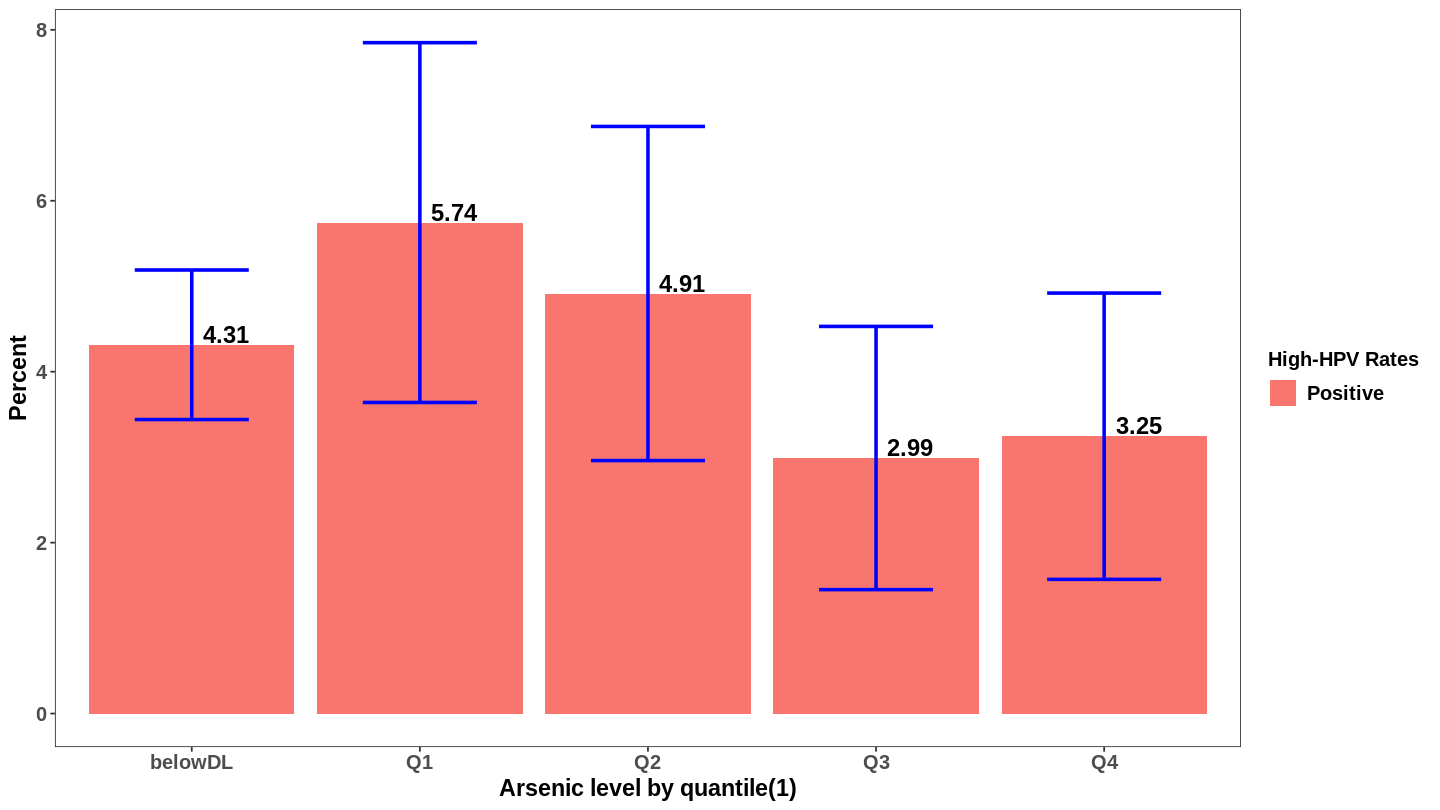

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URXUAB.q), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level by quantile(1)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin =  Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))



The bar plot above shows the percentage proportion of arsenic by quantile(1) that tested positive for high HPV, and their confidence intervals. The proportion below detection limit was 4.31 percent, first quantile was 5.74 percent, second quantile was 4.91 percent, third quantile was 2.99 percent and fourth quantile was 3.25 percent. 

### **Low HPV Section**

In [ ]:




HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URXUAB.q != "NA")

HSV_df %$% freq(URXUAB.q)


URXUAB.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,2063,52.89744
Q1,470,12.05128
Q2,468,12.00000
Q3,468,12.00000
Q4,431,11.05128
Total,3900,100.00000


From the frequency table above, the below detection limit (52.89) percent has the highest percentage of the total sample collected. Q1(12.05%), Q2(12.00%), Q3(12.00%), and Q4(11.05%) are very close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URXUAB.q)
tbl = HSV_df %$% table(low.HPV, URXUAB.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,2051 [ 52.59% ],466 [ 11.95% ],467 [ 11.97% ],464 [ 11.9% ],430 [ 11.03% ],3878 [ 99.44% ]
Positive,12 [ 0.31% ],4 [ 0.1% ],1 [ 0.03% ],4 [ 0.1% ],1 [ 0.03% ],22 [ 0.56% ]
Total,2063 [ 52.9% ],470 [ 12.05% ],468 [ 12% ],468 [ 12% ],431 [ 11.05% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.51245 
Fisher Exact Test P-value:  0.53082 



For the Chi-square test above, the p-value (0.51) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic by quantile(1) variable.


In [ ]:

cat("\n\n\n")

low_hpv_var = HSV_df %>% select(low.HPV,URXUAB.q) %>% group_by(URXUAB.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUAB.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URXUAB.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,2051,52.59,2063,99.42,99.09,99.75
belowDL,Positive,12,0.31,2063,0.58,0.25,0.91
Q1,Negative,466,11.95,470,99.15,98.32,99.98
Q1,Positive,4,0.10,470,0.85,0.02,1.68
Q2,Negative,467,11.97,468,99.79,99.37,100.20
Q2,Positive,1,0.03,468,0.21,-0.20,0.63
Q3,Negative,464,11.90,468,99.15,98.31,99.98
Q3,Positive,4,0.10,468,0.85,0.02,1.69
Q4,Negative,430,11.03,431,99.77,99.31,100.22


The  Q1 and Q3 group both (0.85) percent shows the highest positive rate for low HPV in arsenic by quantile(1).



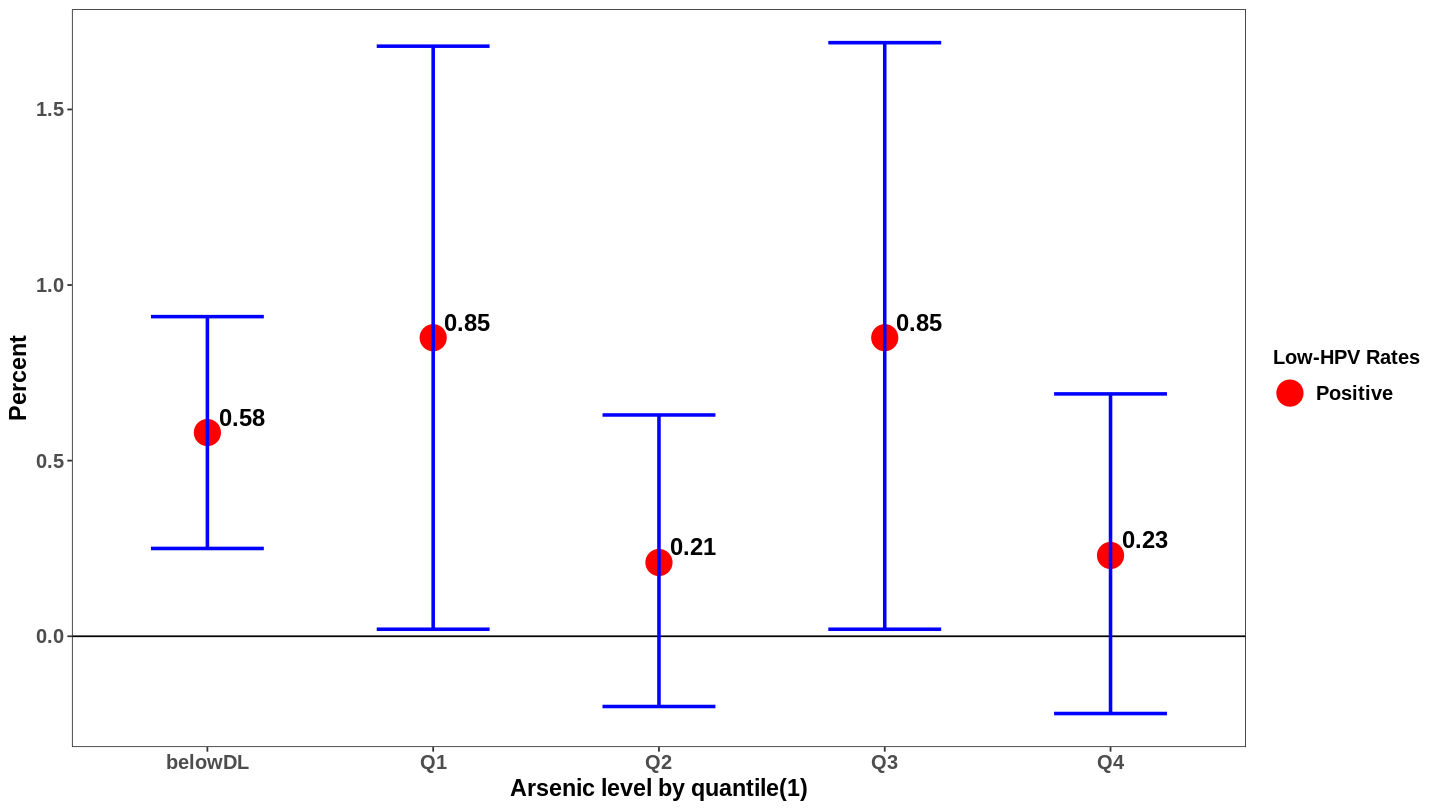

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URXUAB.q), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Arsenic level by quantile(1)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The plot above shows the percentage proportion of arsenic by quantile(1) that tested positive for low HPV, and their confidence intervals. The proportion below detection limit was 0.58 percent, first quantile was 0.85 percent, second quantile was 0.21 percent, third quantile was 0.85 percent, fouth quantile was 0.23 percent. 

# **Arsenic by quantile (2)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URXUAS5.q != "NA")

HSV_df %$% freq(URXUAS5.q)


URXUAS5.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,3804,97.5384615
Q1,24,0.6153846
Q2,24,0.6153846
Q3,24,0.6153846
Q4,24,0.6153846
Total,3900,100.0000000


From the frequency table above, the below detection limit (97.53) percent has the highest percentage of the total sample collected. Q1(0.62%), Q2(0.62%), Q3(0.62%), and Q4(0.62%) are the same.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URXUAS5.q)
tbl = HSV_df %$% table(high.HPV, URXUAS5.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,3643 [ 93.41% ],24 [ 0.62% ],23 [ 0.59% ],22 [ 0.56% ],21 [ 0.54% ],3733 [ 95.72% ]
Positive,161 [ 4.13% ],0 [ 0% ],1 [ 0.03% ],2 [ 0.05% ],3 [ 0.08% ],167 [ 4.28% ]
Total,3804 [ 97.54% ],24 [ 0.62% ],24 [ 0.62% ],24 [ 0.62% ],24 [ 0.62% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.19819 
Fisher Exact Test P-value:  0.17002 



For the Chi-square test above, the p-value (0.20) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic by quantile(2) variable.


In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URXUAS5.q) %>% group_by(URXUAS5.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUAS5.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100,  Lower_CI  = round( Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URXUAS5.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,3643,93.41,3804,95.77,95.13,96.41
belowDL,Positive,161,4.13,3804,4.23,3.59,4.87
Q1,Negative,24,0.62,24,100.00,100.00,100.00
Q2,Negative,23,0.59,24,95.83,87.84,103.83
Q2,Positive,1,0.03,24,4.17,-3.83,12.16
Q3,Negative,22,0.56,24,91.67,80.61,102.72
Q3,Positive,2,0.05,24,8.33,-2.72,19.39
Q4,Negative,21,0.54,24,87.50,74.27,100.73
Q4,Positive,3,0.08,24,12.50,-0.73,25.73


The Q4 group (12.50) percent shows the highest positive rate for high HPV in arsenic by quantile(2).



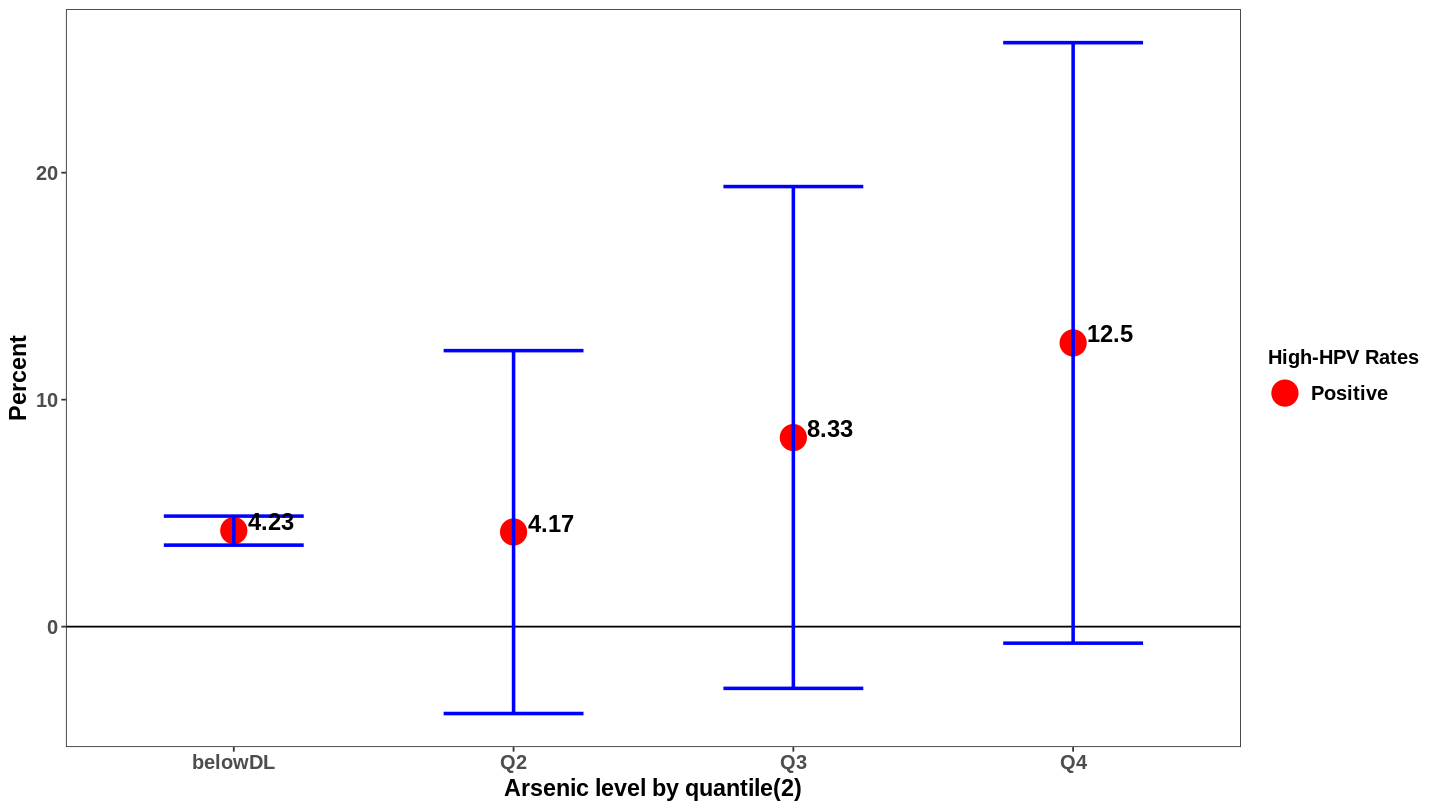

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URXUAS5.q), y = Percentage, fill = factor(high.HPV))) +
 # geom_bar(position="dodge", stat="identity", width = 0.9) +
 geom_point( colour = "red", size = 7) +
 geom_hline(yintercept = 0) +
  labs(x = "Arsenic level by quantile(2)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin =  Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))


The plot above shows the percentage proportion of arsenic that tested positive for high HPV. The proportion below detection limit was 4.23 percent, second quantile was 4.17 percent, third quantile was 8.33 percent, and fourth quantile is 12.5 percent. 

### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URXUAS5.q != "NA")

HSV_df %$% freq(URXUAS5.q)


URXUAS5.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,3804,97.5384615
Q1,24,0.6153846
Q2,24,0.6153846
Q3,24,0.6153846
Q4,24,0.6153846
Total,3900,100.0000000


From the frequency table above, the below detection limit (97.53) percent has the highest percentage of the total sample collected. Q1(0.62%), Q2(0.62%), Q3(0.62%), and Q4(0.62%) are the same.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URXUAS5.q)
tbl = HSV_df %$% table(low.HPV, URXUAS5.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,3783 [ 97% ],24 [ 0.62% ],24 [ 0.62% ],24 [ 0.62% ],23 [ 0.59% ],3878 [ 99.44% ]
Positive,21 [ 0.54% ],0 [ 0% ],0 [ 0% ],0 [ 0% ],1 [ 0.03% ],22 [ 0.56% ]
Total,3804 [ 97.54% ],24 [ 0.62% ],24 [ 0.62% ],24 [ 0.62% ],24 [ 0.62% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.2013 
Fisher Exact Test P-value:  0.42294 



For the Chi-square test above, the p-value (0.20) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic by quantile(2) variable.


In [ ]:

cat("\n\n\n")

low_hpv_var = HSV_df %>% select(low.HPV,URXUAS5.q) %>% group_by(URXUAS5.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUAS5.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URXUAS5.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,3783,97.00,3804,99.45,99.21,99.68
belowDL,Positive,21,0.54,3804,0.55,0.32,0.79
Q1,Negative,24,0.62,24,100.00,100.00,100.00
Q2,Negative,24,0.62,24,100.00,100.00,100.00
Q3,Negative,24,0.62,24,100.00,100.00,100.00
Q4,Negative,23,0.59,24,95.83,87.84,103.83
Q4,Positive,1,0.03,24,4.17,-3.83,12.16


The Q4  group (4.17) percent shows the highest positive rate for low HPV in arsenic by quantile(2).



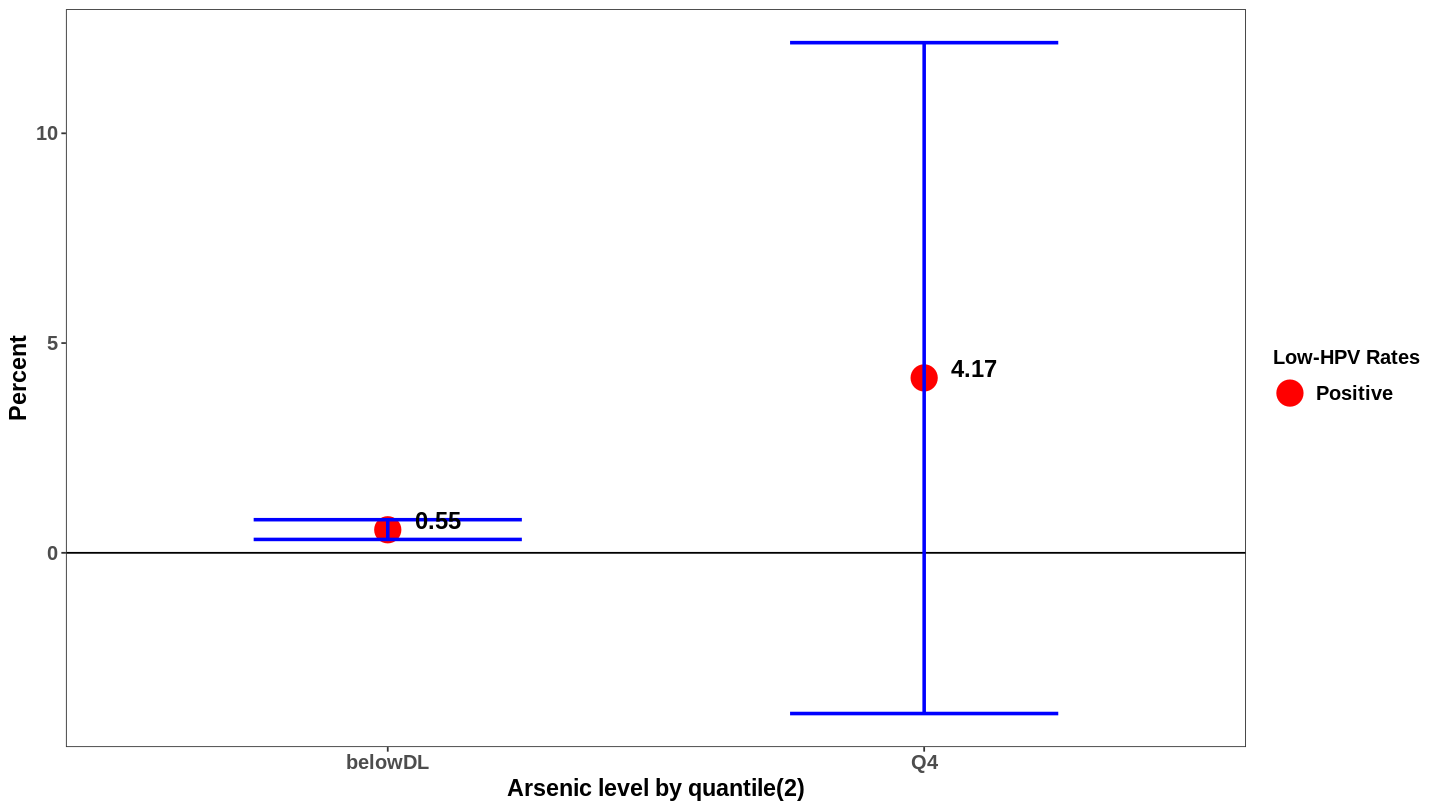

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URXUAS5.q), y = Percentage, fill = factor(low.HPV))) +
 # geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Arsenic level by quantile(2)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The plot above shows the percentage proportion of arsenic by quantile(2) that tested positive for low HPV, and their confidence intervals. The proportion below detection limit was 0.55 percent and the fourth quantile was 4.17 percent. 




# **Arsenic by quantile (3)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URXUAS3.q != "NA")

HSV_df %$% freq(URXUAS3.q)


URXUAS3.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,1344,34.46154
Q1,661,16.94872
Q2,640,16.41026
Q3,625,16.02564
Q4,630,16.15385
Total,3900,100.00000


From the frequency table above, the below detection limit (34.46) percent has the highest percentage of the total sample collected. Q1(16.94%), Q2(16.41%), Q3(16.02%), and Q4(16.15%) are very close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URXUAS3.q)
tbl = HSV_df %$% table(high.HPV, URXUAS3.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1293 [ 33.15% ],631 [ 16.18% ],612 [ 15.69% ],591 [ 15.15% ],606 [ 15.54% ],3733 [ 95.72% ]
Positive,51 [ 1.31% ],30 [ 0.77% ],28 [ 0.72% ],34 [ 0.87% ],24 [ 0.62% ],167 [ 4.28% ]
Total,1344 [ 34.46% ],661 [ 16.95% ],640 [ 16.41% ],625 [ 16.03% ],630 [ 16.15% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.51108 
Fisher Exact Test P-value:  0.51282 



For the Chi-square test above, the p-value (0.51) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic by quantile(3) variable.


In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URXUAS3.q) %>% group_by(URXUAS3.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUAS3.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100,  Lower_CI  = round( Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URXUAS3.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,1293,33.15,1344,96.21,95.18,97.23
belowDL,Positive,51,1.31,1344,3.79,2.77,4.82
Q1,Negative,631,16.18,661,95.46,93.87,97.05
Q1,Positive,30,0.77,661,4.54,2.95,6.13
Q2,Negative,612,15.69,640,95.62,94.04,97.21
Q2,Positive,28,0.72,640,4.37,2.79,5.96
Q3,Negative,591,15.15,625,94.56,92.78,96.34
Q3,Positive,34,0.87,625,5.44,3.66,7.22
Q4,Negative,606,15.54,630,96.19,94.70,97.69


The Q3 group (5.44)  percent shows the highest positive rate for high HPV in arsenic by quantile(3).



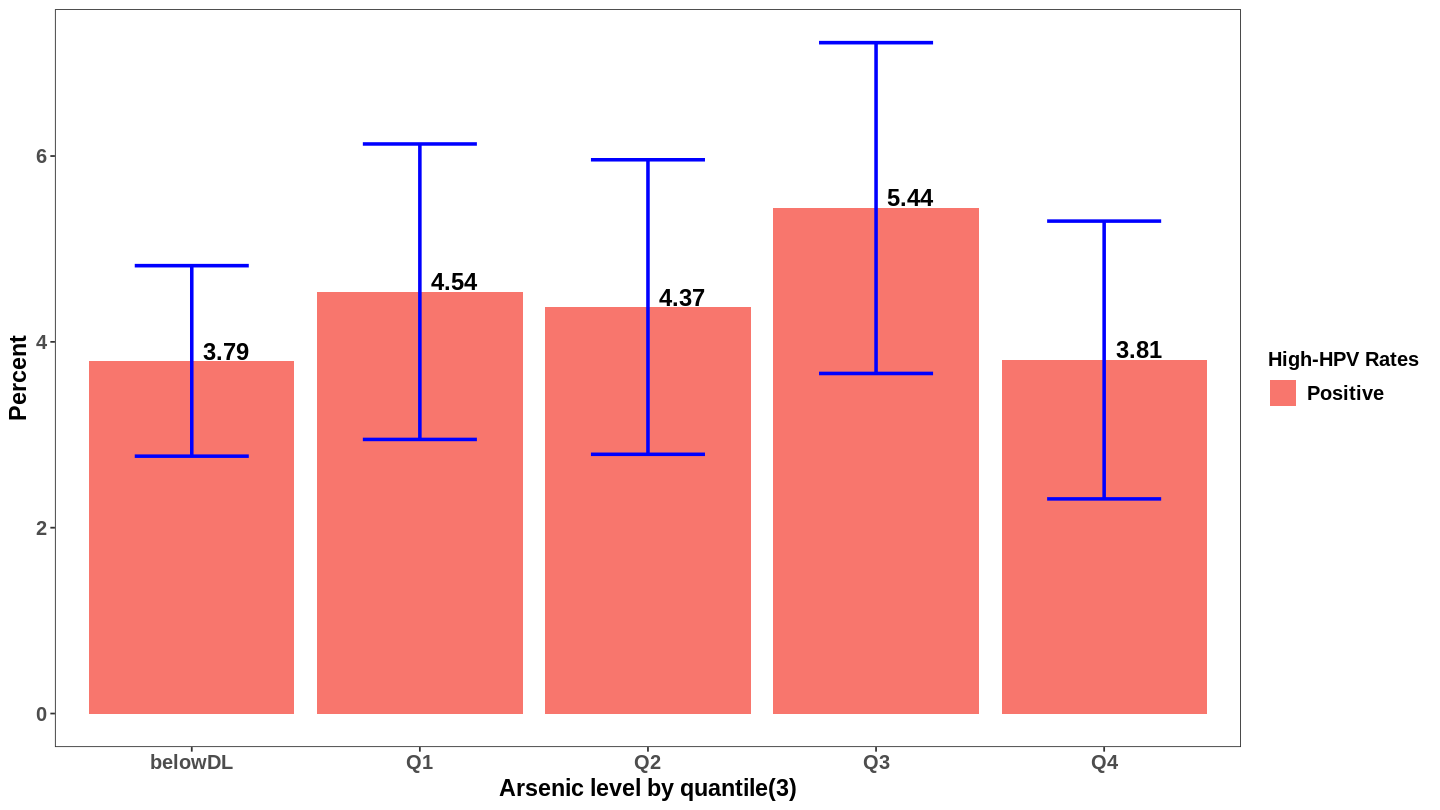

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URXUAS3.q), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level by quantile(3)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin =  Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))


The bar plot above shows the percentage proportion of arsenic by quantile(3) that tested positive for high HPV, and their confidence intervals. The proportion below detection limit was 3.79 percent, first quantile was 4.54 percent second quantile was 4.37 percent, third quantile was 5.44 percent, and the fourth quantile was 3.81 percent. 

### **Low HPV Section**

In [ ]:



HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URXUAS3.q != "NA")

HSV_df %$% freq(URXUAS3.q)


URXUAS3.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,1344,34.46154
Q1,661,16.94872
Q2,640,16.41026
Q3,625,16.02564
Q4,630,16.15385
Total,3900,100.00000


From the frequency table above, the below detection limit (34.46) percent has the highest percentage of the total sample collected. Q1(16.94%), Q2(16.41%), Q3(16.02%), and Q4(16.15%) are very close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URXUAS3.q)
tbl = HSV_df %$% table(low.HPV, URXUAS3.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1338 [ 34.31% ],658 [ 16.87% ],636 [ 16.31% ],620 [ 15.9% ],626 [ 16.05% ],3878 [ 99.44% ]
Positive,6 [ 0.15% ],3 [ 0.08% ],4 [ 0.1% ],5 [ 0.13% ],4 [ 0.1% ],22 [ 0.56% ]
Total,1344 [ 34.46% ],661 [ 16.95% ],640 [ 16.41% ],625 [ 16.03% ],630 [ 16.15% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.87913 
Fisher Exact Test P-value:  0.84239 



For the Chi-square test above, the p-value (0.88) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic by quantile(3) variable.


In [ ]:

cat("\n\n\n")

low_hpv_var = HSV_df %>% select(low.HPV,URXUAS3.q) %>% group_by(URXUAS3.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUAS3.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URXUAS3.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,1338,34.31,1344,99.55,99.20,99.91
belowDL,Positive,6,0.15,1344,0.45,0.09,0.80
Q1,Negative,658,16.87,661,99.55,99.03,100.06
Q1,Positive,3,0.08,661,0.45,-0.06,0.97
Q2,Negative,636,16.31,640,99.38,98.76,99.99
Q2,Positive,4,0.10,640,0.63,0.01,1.24
Q3,Negative,620,15.90,625,99.20,98.50,99.90
Q3,Positive,5,0.13,625,0.80,0.10,1.50
Q4,Negative,626,16.05,630,99.37,98.74,99.99


The Q3 and Q4 group (0.63)  percent shows the highest positive rate for low HPV in arsenic by quantile(3).



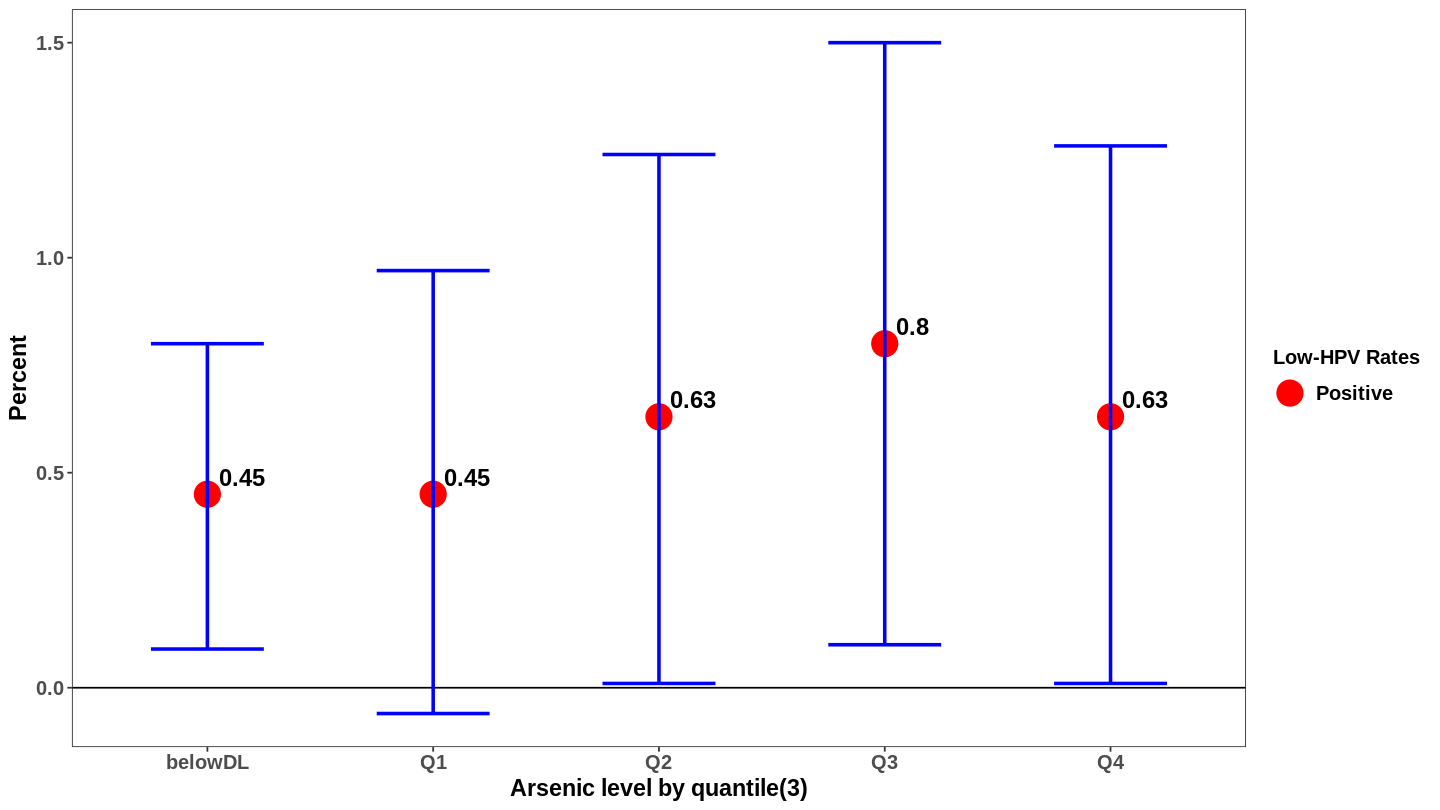

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URXUAS3.q), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Arsenic level by quantile(3)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The plot above shows the percentage proportion of arsenic by quantile(3) that tested positive for low HPV, and their confidence intervals. The proportion below detection limit was 0.45 percent, first quantile was 0.45 percent, second quantile was 0.63 percent, third quantile was 0.8 percent, and the fourth quantile was 0.63 percent. 




# **Arsenic by quantile (4)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URXUAC.q != "NA")

HSV_df %$% freq(URXUAC.q)


URXUAC.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,3229,82.794872
Q1,184,4.717949
Q2,157,4.025641
Q3,169,4.333333
Q4,161,4.128205
Total,3900,100.000000


From the frequency table above, the below detection limit (82.79) percent has the highest percentage of the total sample collected. Q1(4.71%), Q2(4.03%), Q3(4.33%), and Q4(4.12%) are very close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URXUAC.q)
tbl = HSV_df %$% table(high.HPV, URXUAC.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,3090 [ 79.23% ],168 [ 4.31% ],154 [ 3.95% ],165 [ 4.23% ],156 [ 4% ],3733 [ 95.72% ]
Positive,139 [ 3.56% ],16 [ 0.41% ],3 [ 0.08% ],4 [ 0.1% ],5 [ 0.13% ],167 [ 4.28% ]
Total,3229 [ 82.79% ],184 [ 4.72% ],157 [ 4.03% ],169 [ 4.33% ],161 [ 4.13% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.01148 
Fisher Exact Test P-value:  0.02541 


For the Chi-square test above, the p-value (0.11) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the arsenic by quantile(4) variable. 

In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URXUAC.q) %>% group_by(URXUAC.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUAC.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100,  Lower_CI  = round( Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URXUAC.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,3090,79.23,3229,95.70,95.00,96.40
belowDL,Positive,139,3.56,3229,4.30,3.60,5.00
Q1,Negative,168,4.31,184,91.30,87.23,95.38
Q1,Positive,16,0.41,184,8.70,4.62,12.77
Q2,Negative,154,3.95,157,98.09,95.95,100.23
Q2,Positive,3,0.08,157,1.91,-0.23,4.05
Q3,Negative,165,4.23,169,97.63,95.34,99.93
Q3,Positive,4,0.10,169,2.37,0.07,4.66
Q4,Negative,156,4.00,161,96.89,94.21,99.57


The Q1 group (8.70)  percent shows the highest positive rate for high HPV in arsenic by quantile(4).



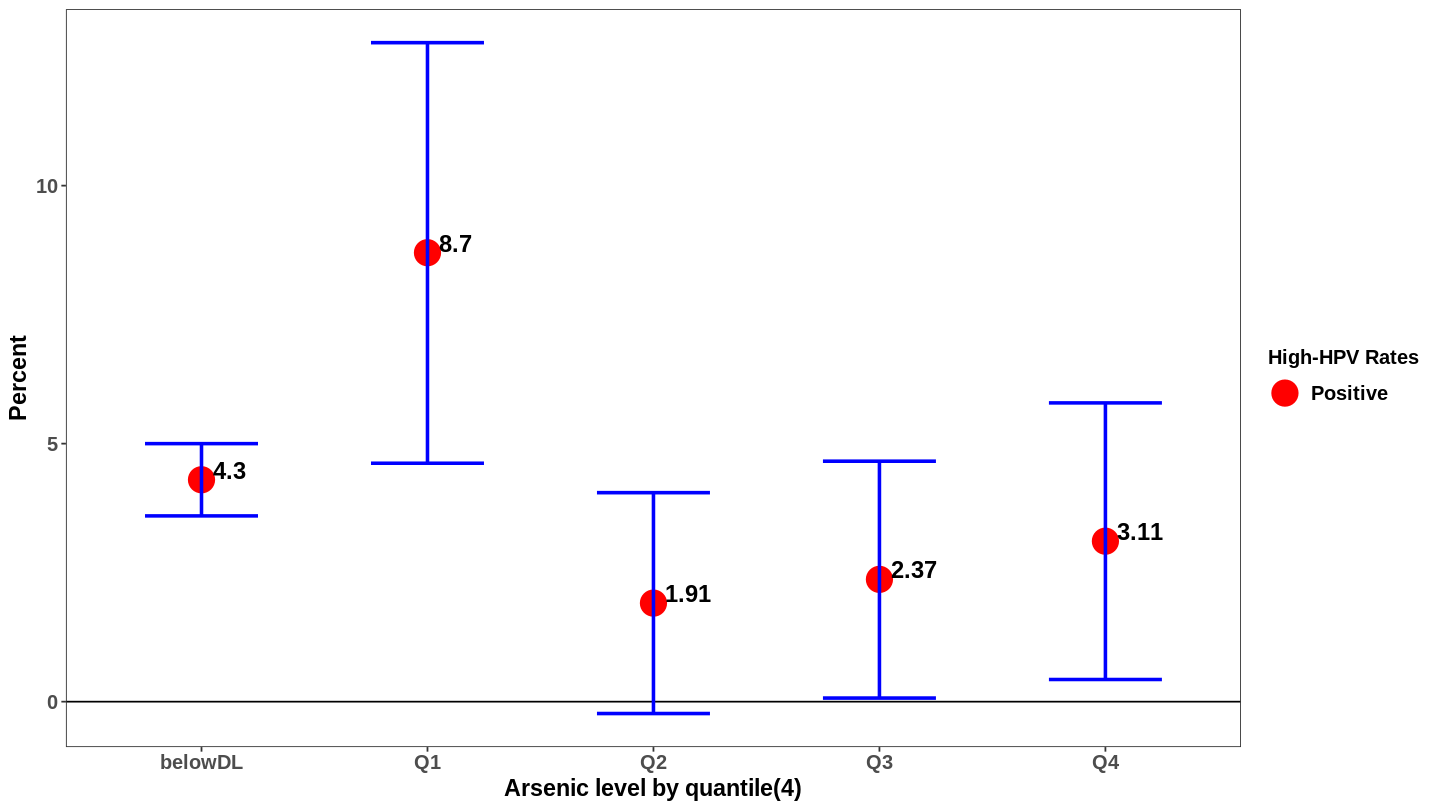

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URXUAC.q), y = Percentage, fill = factor(high.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Arsenic level by quantile(4)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin =  Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))




The plot above shows the percentage proportion of arsenic by quantile(4) that tested positive for high HPV, and their confidence intervals. The proportion below detection limit was 4.30 percent, first quantile was 8.70 percent, second quantile was 1.91 percent, third quantile was 2.37 percent, and the fourth quantile was 3.11 percent. 



### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URXUAC.q != "NA")

HSV_df %$% freq(URXUAC.q)


URXUAC.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,3229,82.794872
Q1,184,4.717949
Q2,157,4.025641
Q3,169,4.333333
Q4,161,4.128205
Total,3900,100.000000


From the frequency table above, the below detection limit (82.79) percent has the highest percentage of the total sample collected. Q1(4.71%), Q2(4.03%), Q3(4.33%), and Q4(4.12%) are very close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URXUAC.q)
tbl = HSV_df %$% table(low.HPV, URXUAC.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,3210 [ 82.31% ],183 [ 4.69% ],155 [ 3.97% ],169 [ 4.33% ],161 [ 4.13% ],3878 [ 99.44% ]
Positive,19 [ 0.49% ],1 [ 0.03% ],2 [ 0.05% ],0 [ 0% ],0 [ 0% ],22 [ 0.56% ]
Total,3229 [ 82.79% ],184 [ 4.72% ],157 [ 4.03% ],169 [ 4.33% ],161 [ 4.13% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.50614 
Fisher Exact Test P-value:  0.52913 





For the Chi-square test above, the p-value (0.51) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic by quantile(4) variable.




In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,URXUAC.q) %>% group_by(URXUAC.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUAC.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URXUAC.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,3210,82.31,3229,99.41,99.15,99.68
belowDL,Positive,19,0.49,3229,0.59,0.32,0.85
Q1,Negative,183,4.69,184,99.46,98.39,100.52
Q1,Positive,1,0.03,184,0.54,-0.52,1.61
Q2,Negative,155,3.97,157,98.73,96.97,100.48
Q2,Positive,2,0.05,157,1.27,-0.48,3.03
Q3,Negative,169,4.33,169,100.00,100.00,100.00
Q4,Negative,161,4.13,161,100.00,100.00,100.00


The Q2 group (1.27)  percent shows the highest positive rate for low HPV in arsenic by quantile(4).



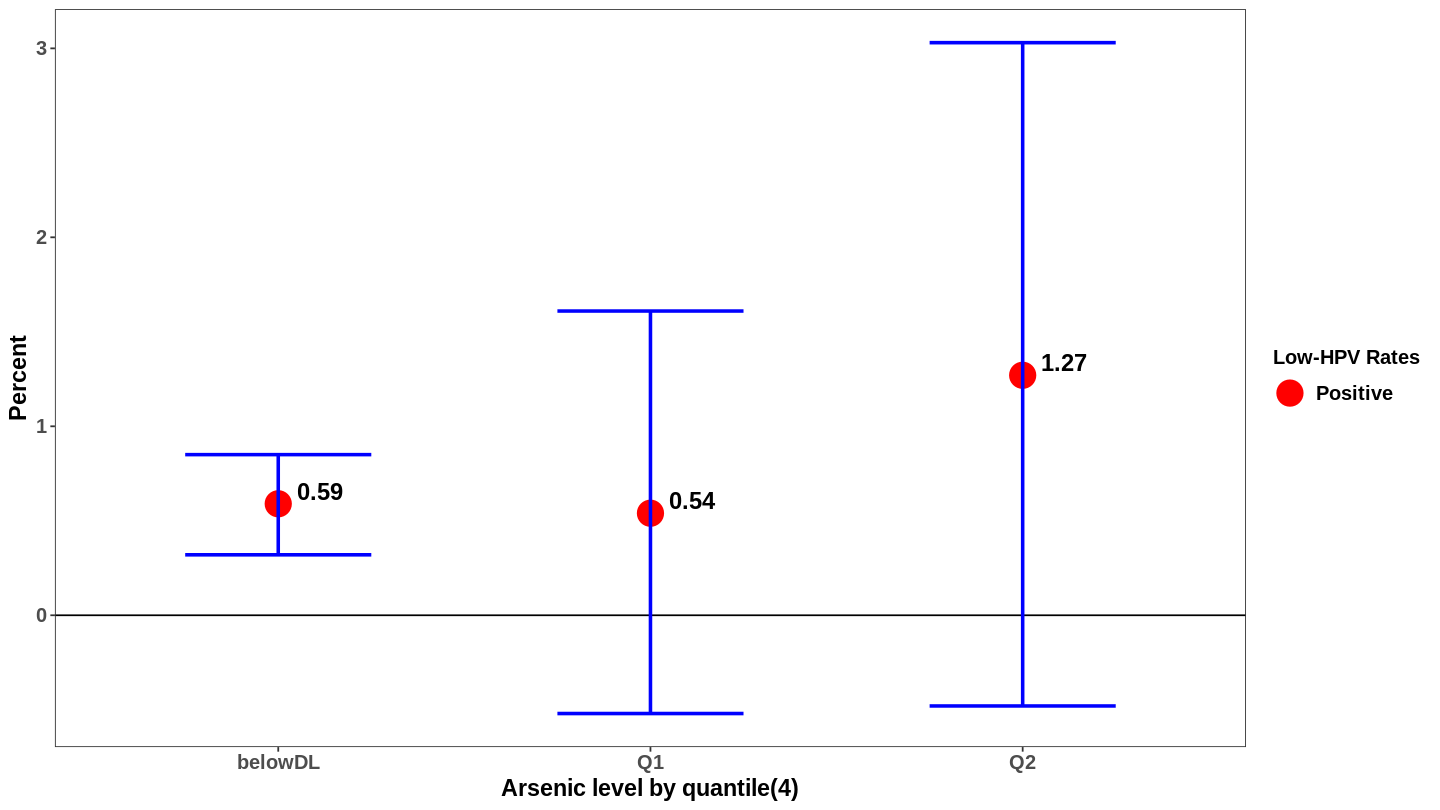

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URXUAC.q), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Arsenic level by quantile(4)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The plot above shows the percentage proportion of arsenic by quantile(4) that tested positive for low HPV, and their confidence intervals. The proportion below detection limit was 0.59 percent, first quantile was 0.54 percent, and the second quantile was 1.27 percent.



# **Arsenic by quantile (5)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URXUDMA.q != "NA")

HSV_df %$% freq(URXUDMA.q)


URXUDMA.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,981,25.15385
Q1,731,18.74359
Q2,729,18.69231
Q3,725,18.58974
Q4,734,18.82051
Total,3900,100.00000


From the frequency table above, the below detection limit (25.15) percent has the highest percentage of the total sample collected. Q1(18.74%), Q2(18.74%), Q3(18.69%), and Q4(18.82%) are very close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URXUDMA.q)
tbl = HSV_df %$% table(high.HPV, URXUDMA.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,940 [ 24.1% ],705 [ 18.08% ],695 [ 17.82% ],688 [ 17.64% ],705 [ 18.08% ],3733 [ 95.72% ]
Positive,41 [ 1.05% ],26 [ 0.67% ],34 [ 0.87% ],37 [ 0.95% ],29 [ 0.74% ],167 [ 4.28% ]
Total,981 [ 25.15% ],731 [ 18.74% ],729 [ 18.69% ],725 [ 18.59% ],734 [ 18.82% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.62461 
Fisher Exact Test P-value:  0.6277 


For the Chi-square test above, the p-value (0.62) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic by quantile(5) variable.




In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URXUDMA.q) %>% group_by(URXUDMA.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUDMA.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100,  Lower_CI  = round( Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URXUDMA.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,940,24.10,981,95.82,94.57,97.07
belowDL,Positive,41,1.05,981,4.18,2.93,5.43
Q1,Negative,705,18.08,731,96.44,95.10,97.79
Q1,Positive,26,0.67,731,3.56,2.21,4.90
Q2,Negative,695,17.82,729,95.34,93.81,96.87
Q2,Positive,34,0.87,729,4.66,3.13,6.19
Q3,Negative,688,17.64,725,94.90,93.29,96.50
Q3,Positive,37,0.95,725,5.10,3.50,6.71
Q4,Negative,705,18.08,734,96.05,94.64,97.46


The Q3 group (5.10)  percent shows the highest positive rate for high HPV in arsenic by quantile(5).



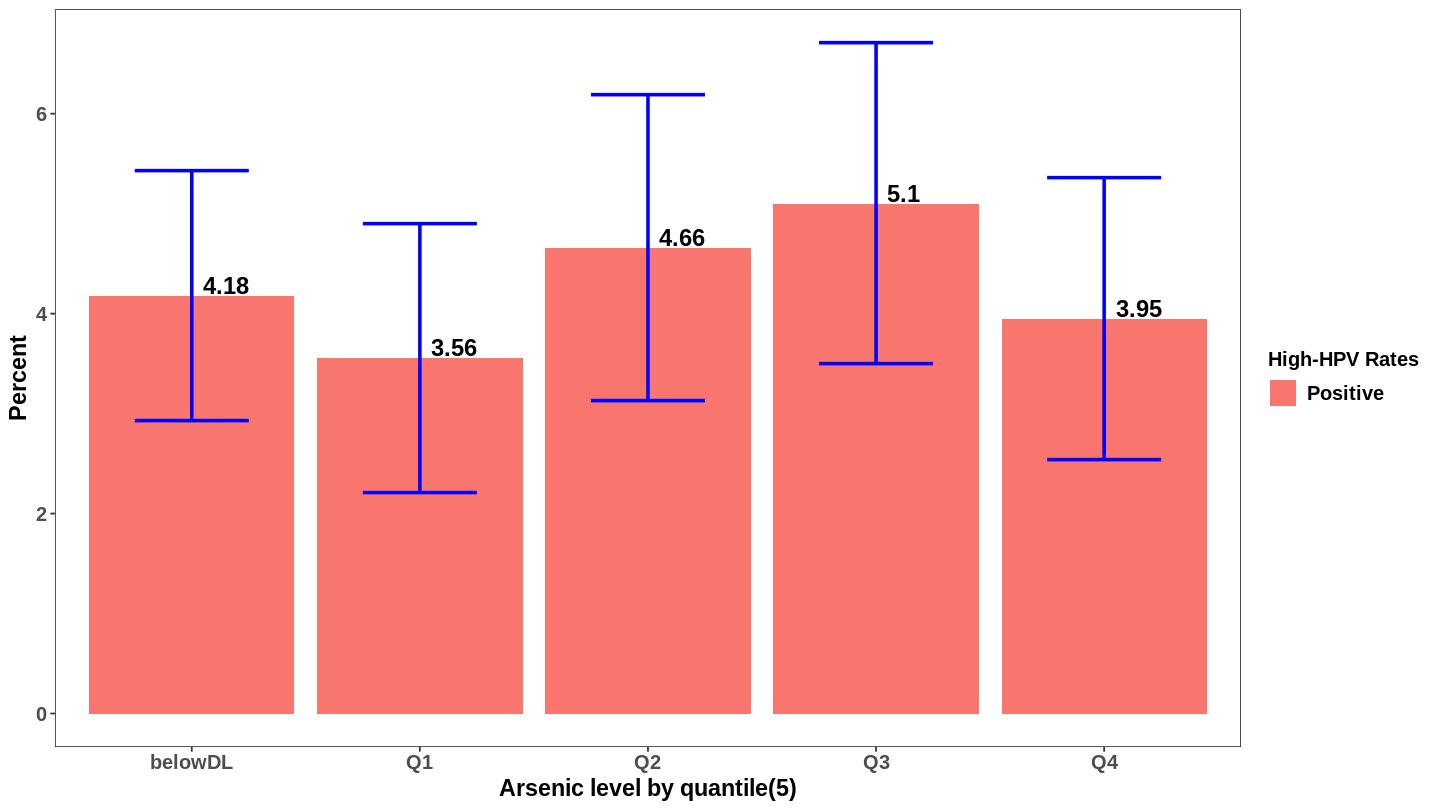

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URXUDMA.q), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level by quantile(5)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin =  Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))



The bar plot above shows the percentage proportion of arsenic by quantile(5) that tested positive for high HPV, and their confidence intervals. The proportion below detection limit was 4.18 percent, first quantile was 3.56 percent, second quantile was 4.66 percent, third quantile was 5.10 percent and the the proportion in fourth quantile was 3.95 percent. 

### **Low HPV Section**

In [ ]:



HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URXUDMA.q != "NA")

HSV_df %$% freq(URXUDMA.q)


URXUDMA.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,981,25.15385
Q1,731,18.74359
Q2,729,18.69231
Q3,725,18.58974
Q4,734,18.82051
Total,3900,100.00000


The total sample was 3900. Of which 25.15385 percent were below detection limit , 18.74359 percent were on first quantile, 18.69231 percent were in second quantile, 18.58974 percent were in third quantile and 18.82051 percent were in the fourth quantile.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URXUDMA.q)
tbl = HSV_df %$% table(low.HPV, URXUDMA.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,975 [ 25% ],724 [ 18.56% ],726 [ 18.62% ],722 [ 18.51% ],731 [ 18.74% ],3878 [ 99.44% ]
Positive,6 [ 0.15% ],7 [ 0.18% ],3 [ 0.08% ],3 [ 0.08% ],3 [ 0.08% ],22 [ 0.56% ]
Total,981 [ 25.15% ],731 [ 18.74% ],729 [ 18.69% ],725 [ 18.59% ],734 [ 18.82% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.56322 
Fisher Exact Test P-value:  0.61253 





For the Chi-square test above, the p-value (0.56) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic by quantile(5) variable.




In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,URXUDMA.q) %>% group_by(URXUDMA.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUDMA.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URXUDMA.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,975,25.00,981,99.39,98.90,99.88
belowDL,Positive,6,0.15,981,0.61,0.12,1.10
Q1,Negative,724,18.56,731,99.04,98.34,99.75
Q1,Positive,7,0.18,731,0.96,0.25,1.66
Q2,Negative,726,18.62,729,99.59,99.12,100.05
Q2,Positive,3,0.08,729,0.41,-0.05,0.88
Q3,Negative,722,18.51,725,99.59,99.12,100.05
Q3,Positive,3,0.08,725,0.41,-0.05,0.88
Q4,Negative,731,18.74,734,99.59,99.13,100.05


The Q3 group (0.96)  percent shows the highest positive rate for low HPV in arsenic by quantile(5).



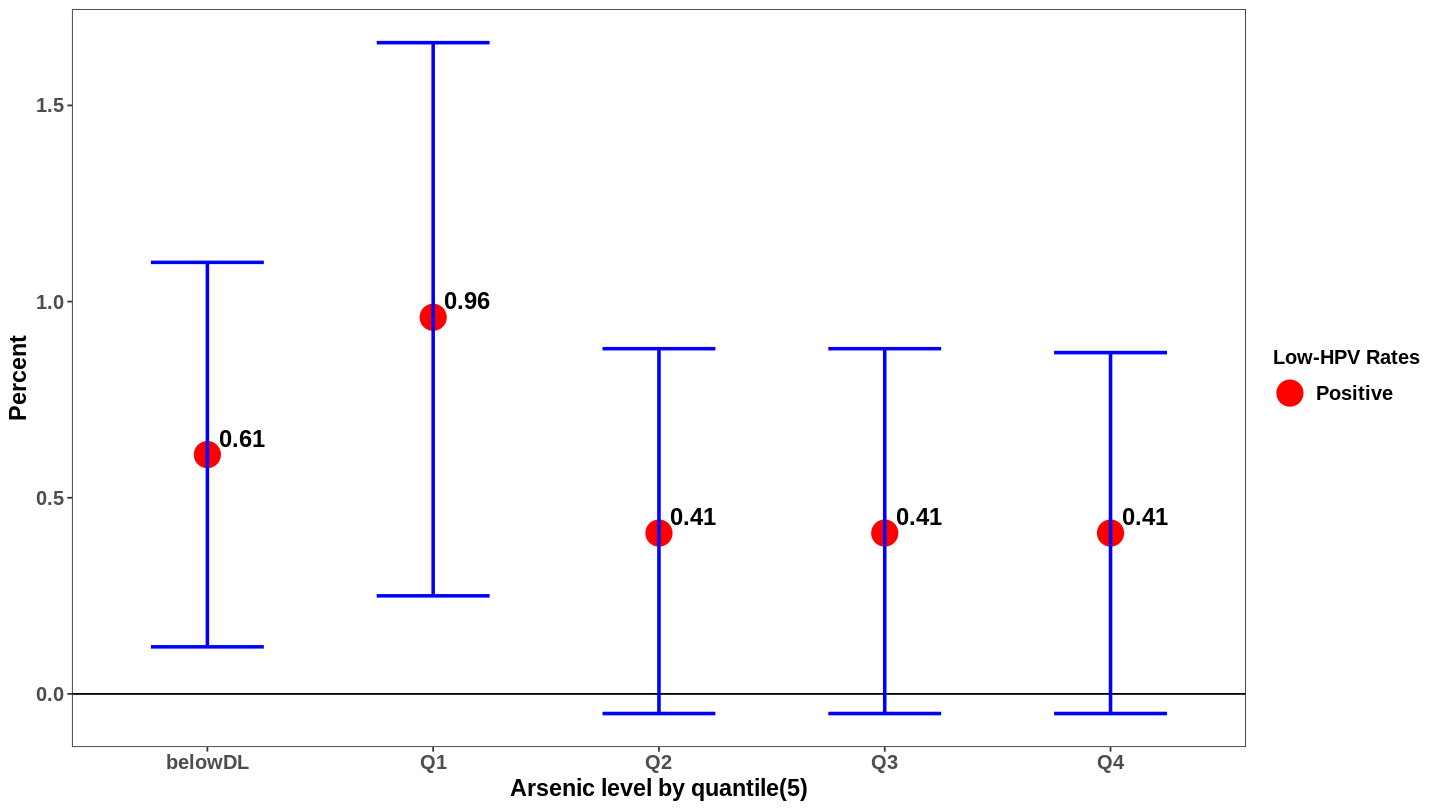

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URXUDMA.q), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Arsenic level by quantile(5)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The plot above shows the percentage proportion of arsenic by quantile(5) that tested positive for low HPV, and their confidence intervals. The proportion below detection limit was 0.61 percent, first quantile was 0.96 percent, second quantile was 0.41 percent,  third quantile was 0.41 percent, and the fourth quantile was 0.41 percent. 



# **Arsenic by quantile (6)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URXUMMA.q != "NA")

HSV_df %$% freq(URXUMMA.q)


URXUMMA.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,1287,33.00000
Q1,678,17.38462
Q2,623,15.97436
Q3,655,16.79487
Q4,657,16.84615
Total,3900,100.00000


From the frequency table above, the below detection limit (33.00) percent has the highest percentage of the total sample collected. Q1(17.38%), Q2(15.97%), Q3(16.79%), and Q4(16.84%) are very close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URXUMMA.q)
tbl = HSV_df %$% table(high.HPV, URXUMMA.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1245 [ 31.92% ],650 [ 16.67% ],593 [ 15.21% ],625 [ 16.03% ],620 [ 15.9% ],3733 [ 95.72% ]
Positive,42 [ 1.08% ],28 [ 0.72% ],30 [ 0.77% ],30 [ 0.77% ],37 [ 0.95% ],167 [ 4.28% ]
Total,1287 [ 33% ],678 [ 17.38% ],623 [ 15.97% ],655 [ 16.79% ],657 [ 16.85% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.14737 
Fisher Exact Test P-value:  0.13715 


For the Chi-square test above, the p-value (0.15) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic by quantile(6) variable.




In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URXUMMA.q) %>% group_by(URXUMMA.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUMMA.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100,  Lower_CI  = round( Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URXUMMA.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,1245,31.92,1287,96.74,95.77,97.71
belowDL,Positive,42,1.08,1287,3.26,2.29,4.23
Q1,Negative,650,16.67,678,95.87,94.37,97.37
Q1,Positive,28,0.72,678,4.13,2.63,5.63
Q2,Negative,593,15.21,623,95.18,93.50,96.87
Q2,Positive,30,0.77,623,4.82,3.13,6.50
Q3,Negative,625,16.03,655,95.42,93.82,97.02
Q3,Positive,30,0.77,655,4.58,2.98,6.18
Q4,Negative,620,15.90,657,94.37,92.61,96.13


The Q4 group (5.63)  percent shows the highest positive rate for high HPV in arsenic by quantile(6).



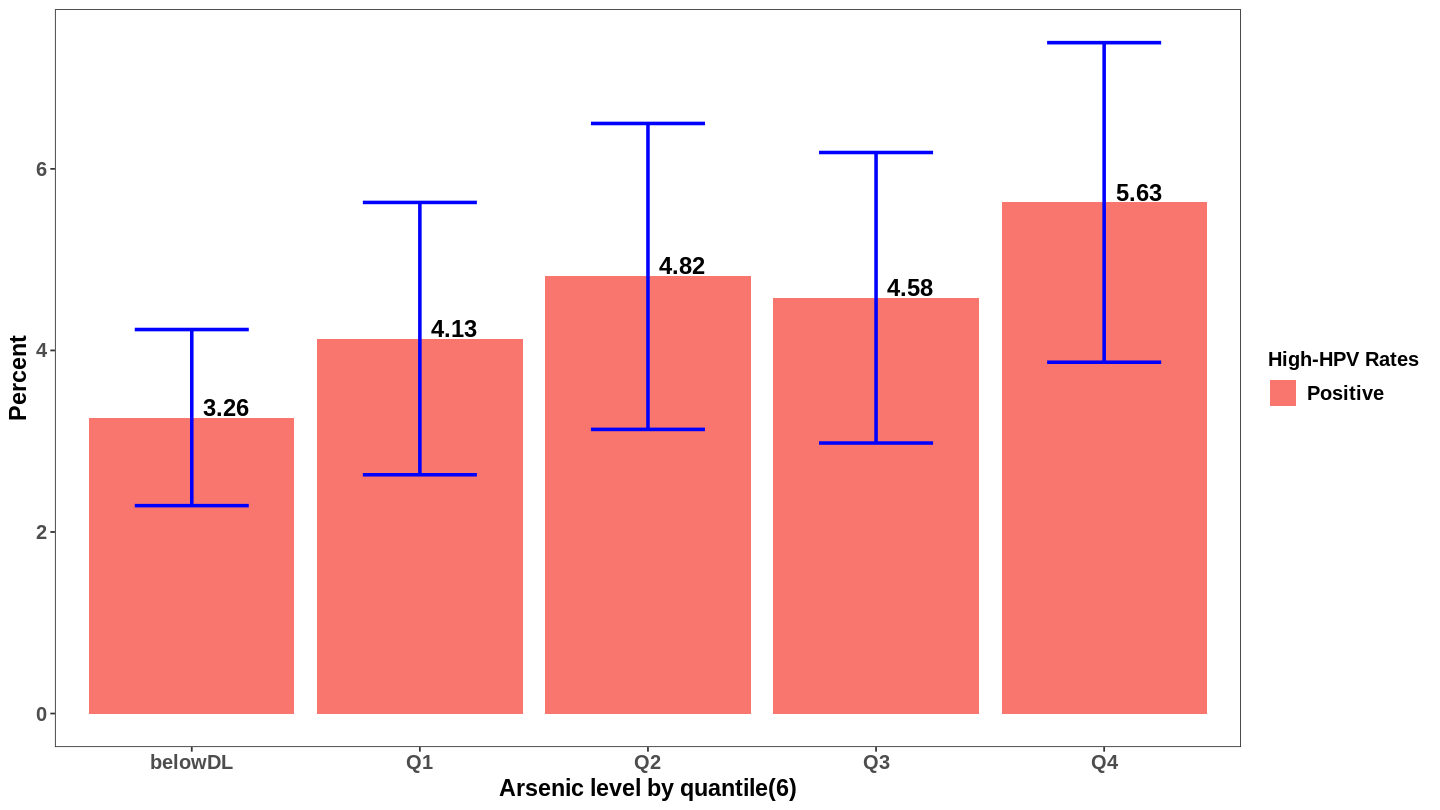

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URXUMMA.q), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level by quantile(6)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin =  Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))



The bar plot above shows the percentage proportion of arsenic by quantile(6) that tested positive for high HPV, and their confidence intervals. The proportion below detection limit was 3.26 percent, first quantile was 4.13 percent, second quantile was 4.82 percent, third quantile was 4.58 percent, and the fourth quantile was 5.63 percent. 

### **Low HPV Section**

In [ ]:



HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URXUMMA.q != "NA")

HSV_df %$% freq(URXUMMA.q)


URXUMMA.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,1287,33.00000
Q1,678,17.38462
Q2,623,15.97436
Q3,655,16.79487
Q4,657,16.84615
Total,3900,100.00000


From the frequency table above, the below detection limit (33.00) percent has the highest percentage of the total sample collected. Q1(17.38%), Q2(15.97%), Q3(16.79%), and Q4(16.84%) are very close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URXUMMA.q)
tbl = HSV_df %$% table(low.HPV, URXUMMA.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1281 [ 32.85% ],672 [ 17.23% ],621 [ 15.92% ],650 [ 16.67% ],654 [ 16.77% ],3878 [ 99.44% ]
Positive,6 [ 0.15% ],6 [ 0.15% ],2 [ 0.05% ],5 [ 0.13% ],3 [ 0.08% ],22 [ 0.56% ]
Total,1287 [ 33% ],678 [ 17.38% ],623 [ 15.97% ],655 [ 16.79% ],657 [ 16.85% ],3900 [ 100% ]




 Chi-Square Test P-value:  0.60582 
Fisher Exact Test P-value:  0.62287 


For the Chi-square test above, the p-value (0.61) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic by quantile(6) variable.




In [ ]:

cat("\n\n\n")

low_hpv_var = HSV_df %>% select(low.HPV,URXUMMA.q) %>% group_by(URXUMMA.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUMMA.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URXUMMA.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,1281,32.85,1287,99.53,99.16,99.91
belowDL,Positive,6,0.15,1287,0.47,0.09,0.84
Q1,Negative,672,17.23,678,99.12,98.41,99.82
Q1,Positive,6,0.15,678,0.88,0.18,1.59
Q2,Negative,621,15.92,623,99.68,99.23,100.12
Q2,Positive,2,0.05,623,0.32,-0.12,0.77
Q3,Negative,650,16.67,655,99.24,98.57,99.90
Q3,Positive,5,0.13,655,0.76,0.10,1.43
Q4,Negative,654,16.77,657,99.54,99.03,100.06


The Q1 group (0.88)  percent shows the highest positive rate for high HPV in arsenic by quantile(6).



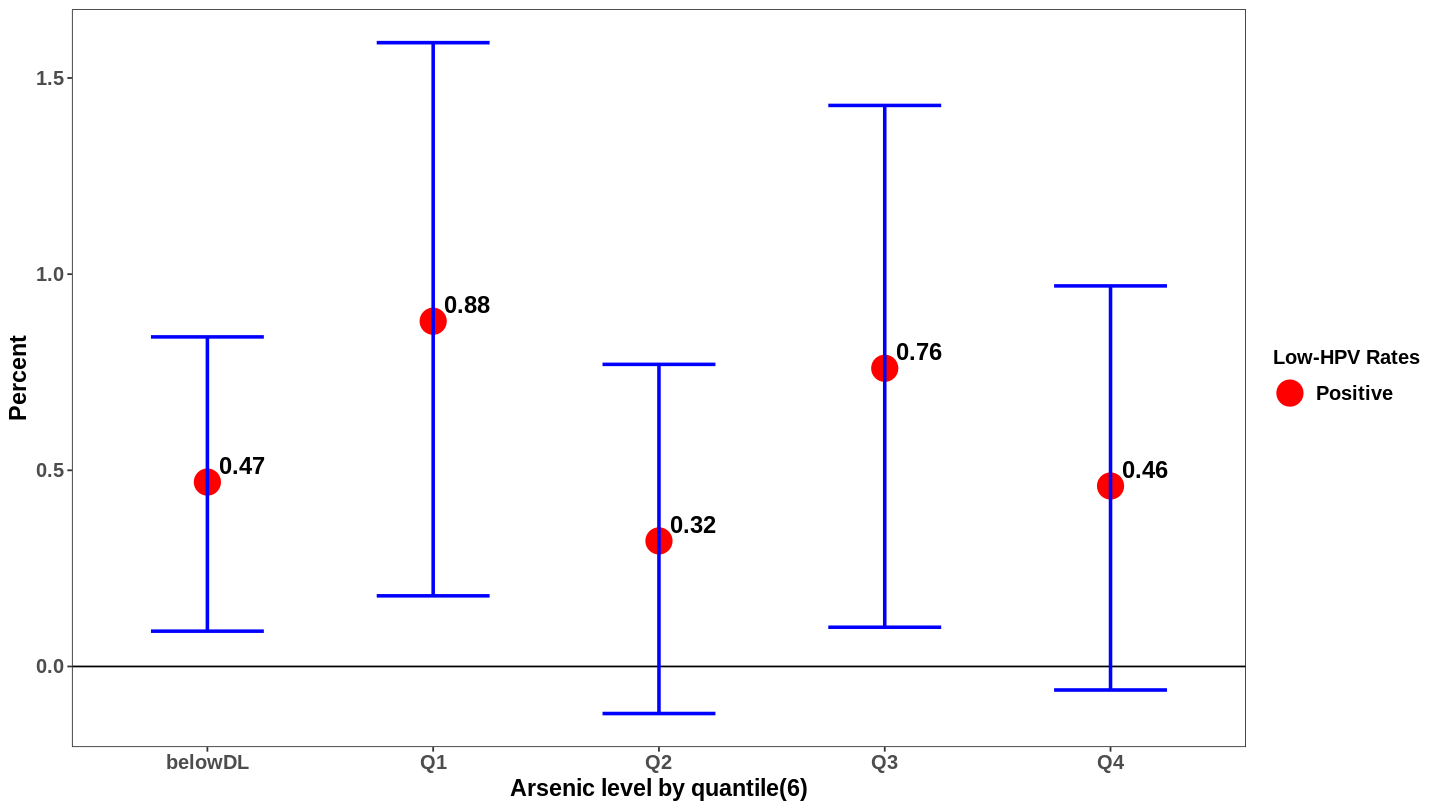

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URXUMMA.q), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Arsenic level by quantile(6)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The plot above shows the percentage proportion of arsenic by quantile(6) that tested positive for low HPV, and their confidence intervals. The proportion below detection limit was 0.47 percent, first quantile was 0.88 percent, second quantile was 0.32 percent, third quantile was 0.76 percent, and the fourth quantile was 0.46 percent. 

# **Poverty Income Ratio**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(PIR != "NA")

HSV_df %$% freq(PIR)


PIR,Freq,% Freq
<fct>,<int>,<dbl>
1.0,2872,34.32943
2.0,3018,36.07459
3.0,2476,29.59598
Total,8366,100.00000


From the frequency table above, the poverty income ratio from 130 to 350 which is represented as "2"(36.07) percent has the highest percent of the total sample collected. 



In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = PIR)
tbl = HSV_df %$% table(high.HPV, PIR)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,1.0,2.0,3.0,Total
,<chr>,<chr>,<chr>,<chr>
Negative,2764 [ 33.04% ],2911 [ 34.8% ],2396 [ 28.64% ],8071 [ 96.47% ]
Positive,108 [ 1.29% ],107 [ 1.28% ],80 [ 0.96% ],295 [ 3.53% ]
Total,2872 [ 34.33% ],3018 [ 36.07% ],2476 [ 29.6% ],8366 [ 100% ]




 Chi-Square Test P-value:  0.57675 
Fisher Exact Test P-value:  0.57767 




For the Chi-square test above, the p-value (0.58) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the PIR variable.


In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,PIR) %>% group_by(PIR, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(PIR) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100,  Lower_CI  = round( Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


PIR,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.0,Negative,2764,33.04,2872,96.24,95.54,96.94
1.0,Positive,108,1.29,2872,3.76,3.06,4.46
2.0,Negative,2911,34.80,3018,96.45,95.79,97.11
2.0,Positive,107,1.28,3018,3.55,2.89,4.21
3.0,Negative,2396,28.64,2476,96.77,96.07,97.47
3.0,Positive,80,0.96,2476,3.23,2.53,3.93



Group "1" (3.76) percent shows the highest positive rate for high HPV in poverty income ratio.



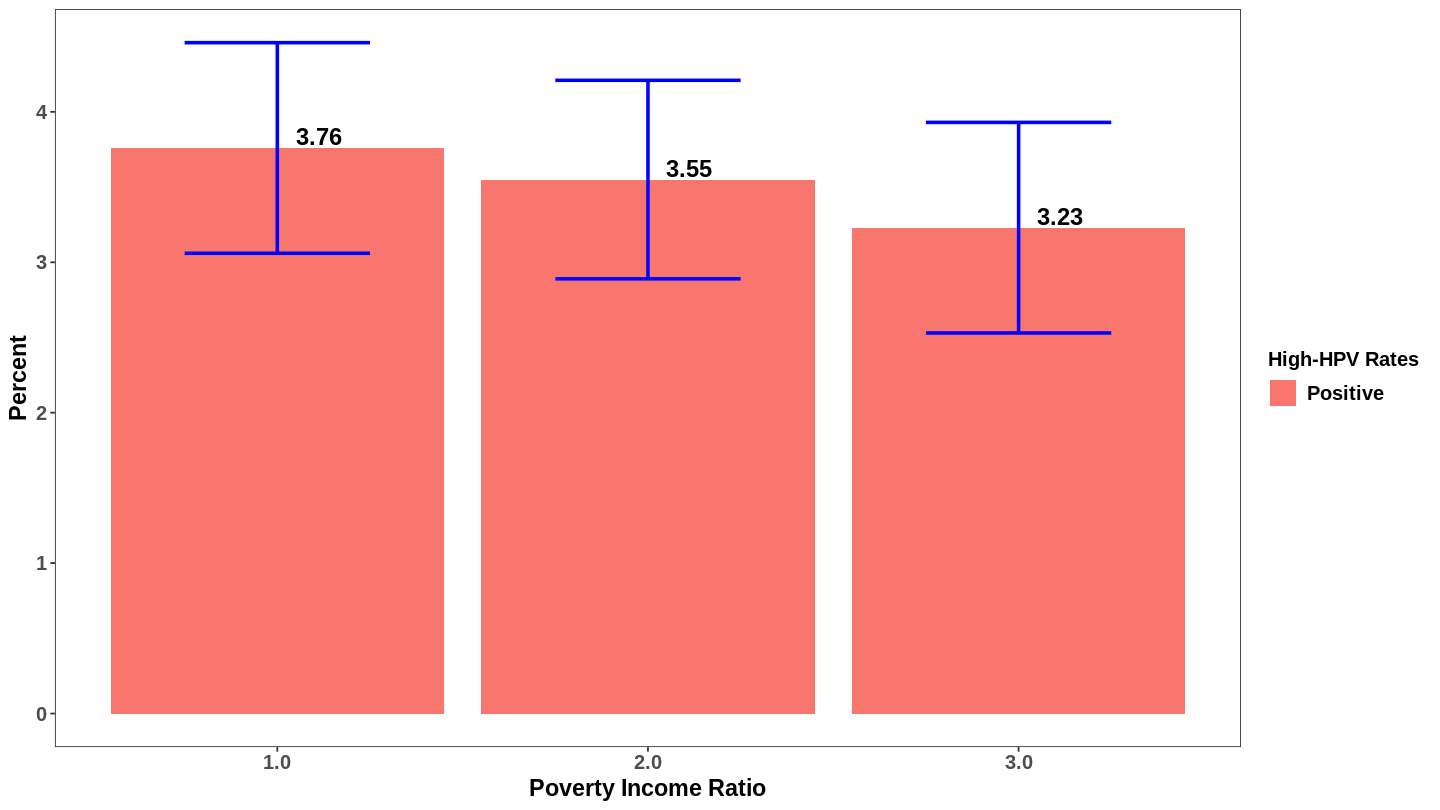

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(PIR), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Poverty Income Ratio", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin =  Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))




The bar plot above shows the percentage proportion, and  confidence intervals of people that tested positive for high HPV based on their poverty income ratio. The proportion below 130 was 3.76 percent, from 130 and 350 was 3.55 percent, above 350 was 3.23 percent.

### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(PIR != "NA")

HSV_df %$% freq(PIR)


PIR,Freq,% Freq
<fct>,<int>,<dbl>
1.0,2872,34.32943
2.0,3018,36.07459
3.0,2476,29.59598
Total,8366,100.00000


From the frequency table above, poverty income ratio between 130 to 350 is represented as "2"(36.07) percent has the highest percent of the total sample collected. 



In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = PIR)
tbl = HSV_df %$% table(low.HPV, PIR)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,1.0,2.0,3.0,Total
,<chr>,<chr>,<chr>,<chr>
Negative,2861 [ 34.2% ],2999 [ 35.85% ],2467 [ 29.49% ],8327 [ 99.53% ]
Positive,11 [ 0.13% ],19 [ 0.23% ],9 [ 0.11% ],39 [ 0.47% ]
Total,2872 [ 34.33% ],3018 [ 36.07% ],2476 [ 29.6% ],8366 [ 100% ]




 Chi-Square Test P-value:  0.25576 
Fisher Exact Test P-value:  0.28409 







For the Chi-square test above, the p-value (0.25) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the PIR variable.


In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,PIR) %>% group_by(PIR, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(PIR) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


PIR,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.0,Negative,2861,34.20,2872,99.62,99.39,99.84
1.0,Positive,11,0.13,2872,0.38,0.16,0.61
2.0,Negative,2999,35.85,3018,99.37,99.09,99.65
2.0,Positive,19,0.23,3018,0.63,0.35,0.91
3.0,Negative,2467,29.49,2476,99.64,99.40,99.87
3.0,Positive,9,0.11,2476,0.36,0.13,0.60



Group "2" (0.63) percent shows the highest positive rate for low HPV.



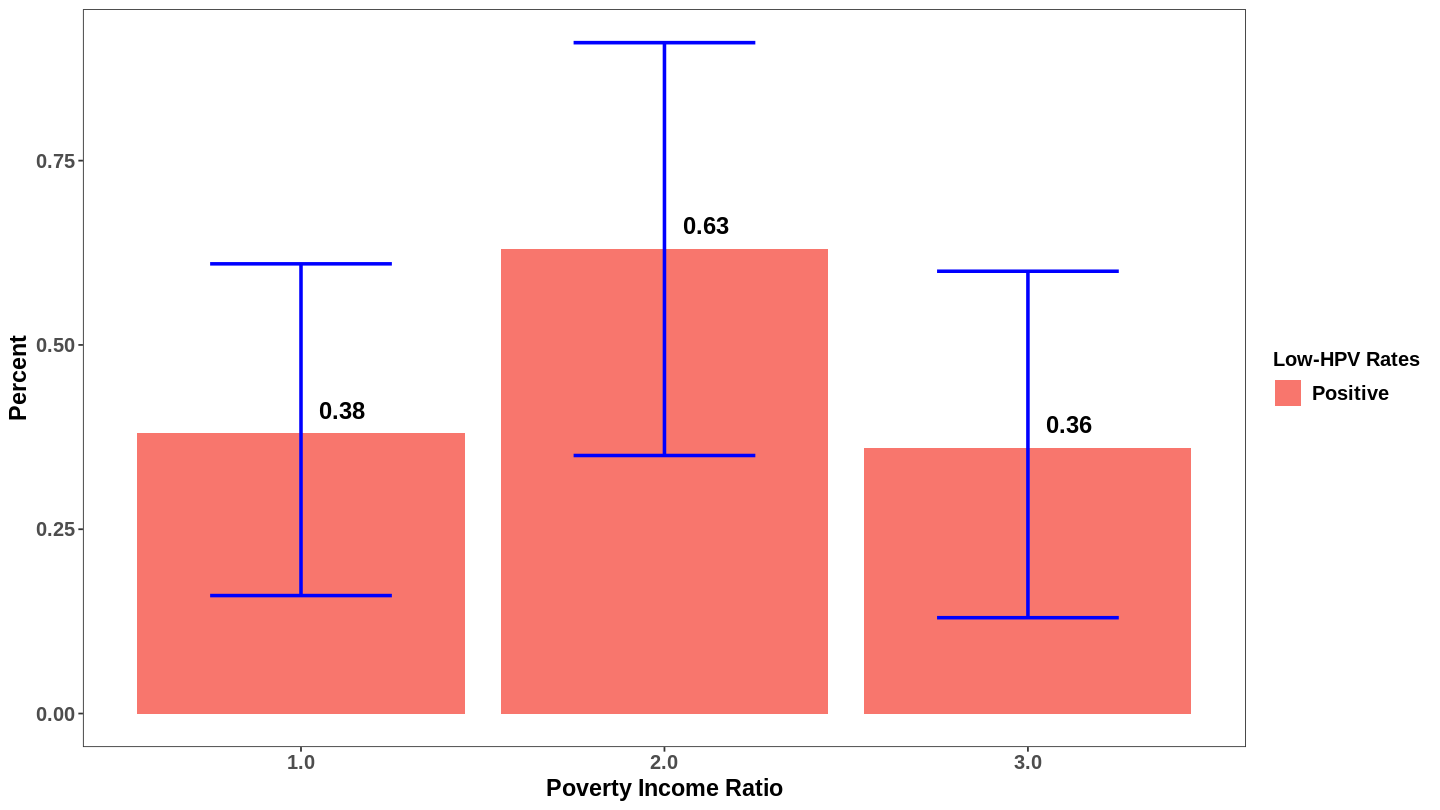

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(PIR), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Poverty Income Ratio", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The bar plot above shows the percentage proportion, and  confidence intervals of people that tested positive for low HPV based on their poverty income ratio. The proportion below 130 was 0.38 percent, between 130 and 350 was 0.63 percent, above 350 was 0.36 percent.

# **BMI**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(BMI.f != "NA")

HSV_df %$% freq(BMI.f)


BMI.f,Freq,% Freq
<fct>,<int>,<dbl>
Underweight,166,1.831219
Normal weight,2627,28.979592
Overweight,2754,30.380585
Obesity,3518,38.808605
Total,9065,100.000000


From the frequency table above, obesity (38.80) percent has the highest percent of the total sample collected. 



In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = BMI.f)
tbl = HSV_df %$% table(high.HPV, BMI.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Underweight,Normal weight,Overweight,Obesity,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,161 [ 1.78% ],2538 [ 28% ],2652 [ 29.26% ],3397 [ 37.47% ],8748 [ 96.5% ]
Positive,5 [ 0.06% ],89 [ 0.98% ],102 [ 1.13% ],121 [ 1.33% ],317 [ 3.5% ]
Total,166 [ 1.83% ],2627 [ 28.98% ],2754 [ 30.38% ],3518 [ 38.81% ],9065 [ 100% ]




 Chi-Square Test P-value:  0.89836 
Fisher Exact Test P-value:  0.91939 







For the Chi-square test above, the p-value (0.90) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the BMI variable.


In [ ]:

high_hpv_var = HSV_df %>% select(high.HPV,BMI.f) %>% group_by(BMI.f, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(BMI.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100,  Lower_CI  = round( Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


BMI.f,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Underweight,Negative,161,1.78,166,96.99,94.39,99.59
Underweight,Positive,5,0.06,166,3.01,0.41,5.61
Normal weight,Negative,2538,28.00,2627,96.61,95.92,97.30
Normal weight,Positive,89,0.98,2627,3.39,2.70,4.08
Overweight,Negative,2652,29.26,2754,96.30,95.59,97.00
Overweight,Positive,102,1.13,2754,3.70,3.00,4.41
Obesity,Negative,3397,37.47,3518,96.56,95.96,97.16
Obesity,Positive,121,1.33,3518,3.44,2.84,4.04


The positive rate for high HPV in each group are close. The overweight (3.70) percent shows the highest positive rate for high HPV.



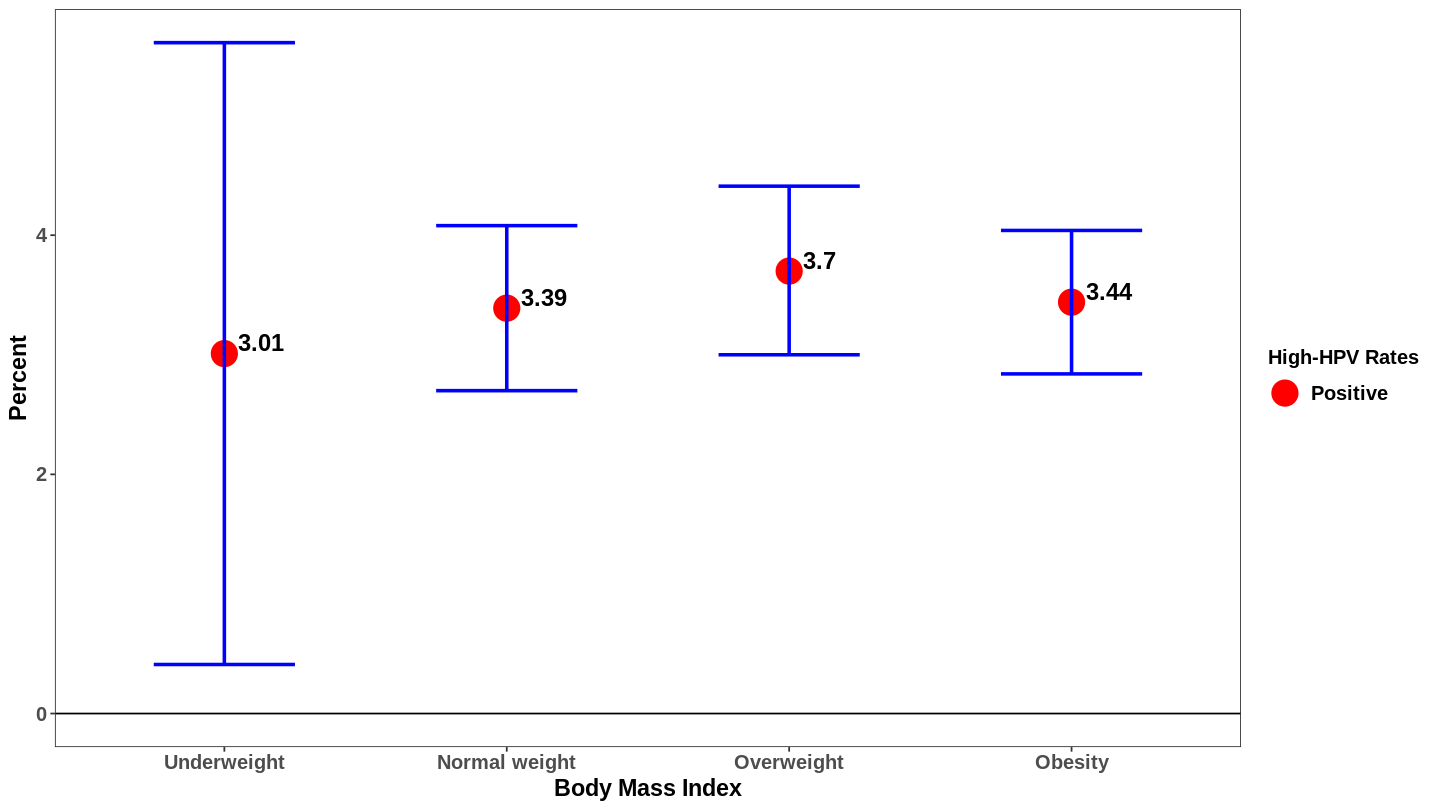

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(BMI.f), y = Percentage, fill = factor(high.HPV))) +
 # geom_bar(position="dodge", stat="identity", width = 0.9) +
   geom_point( colour = "red", size = 7) +
   geom_hline(yintercept = 0) +
  labs(x = "Body Mass Index", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin =  Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))




The plot above shows the percentage proportion, and  confidence intervals of people that tested positive for high HPV based on their body mass index. The proportion underweight was 3.01 percent, normal weight was 3.39 percent, overweight was 3.70 percent, and obesed was 3.44 percent.




### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(BMI.f != "NA")

HSV_df %$% freq(BMI.f)


BMI.f,Freq,% Freq
<fct>,<int>,<dbl>
Underweight,166,1.831219
Normal weight,2627,28.979592
Overweight,2754,30.380585
Obesity,3518,38.808605
Total,9065,100.000000


From the frequency table above, obesity (38.80) percent has the highest percent of the total sample collected. 



In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = BMI.f)
tbl = HSV_df %$% table(low.HPV, BMI.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,Underweight,Normal weight,Overweight,Obesity,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,165 [ 1.82% ],2616 [ 28.86% ],2738 [ 30.2% ],3504 [ 38.65% ],9023 [ 99.54% ]
Positive,1 [ 0.01% ],11 [ 0.12% ],16 [ 0.18% ],14 [ 0.15% ],42 [ 0.46% ]
Total,166 [ 1.83% ],2627 [ 28.98% ],2754 [ 30.38% ],3518 [ 38.81% ],9065 [ 100% ]




 Chi-Square Test P-value:  0.72073 
Fisher Exact Test P-value:  0.57168 




For the Chi-square test above, the p-value (0.72) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the BMI variable.


In [ ]:

cat("\n\n\n")

low_hpv_var = HSV_df %>% select(low.HPV,BMI.f) %>% group_by(BMI.f, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(BMI.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


BMI.f,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Underweight,Negative,165,1.82,166,99.40,98.22,100.57
Underweight,Positive,1,0.01,166,0.60,-0.57,1.78
Normal weight,Negative,2616,28.86,2627,99.58,99.33,99.83
Normal weight,Positive,11,0.12,2627,0.42,0.17,0.67
Overweight,Negative,2738,30.20,2754,99.42,99.14,99.70
Overweight,Positive,16,0.18,2754,0.58,0.30,0.86
Obesity,Negative,3504,38.65,3518,99.60,99.39,99.81
Obesity,Positive,14,0.15,3518,0.40,0.19,0.61


The overwight (0.60) percent shows the highest positive rate for high HPV.



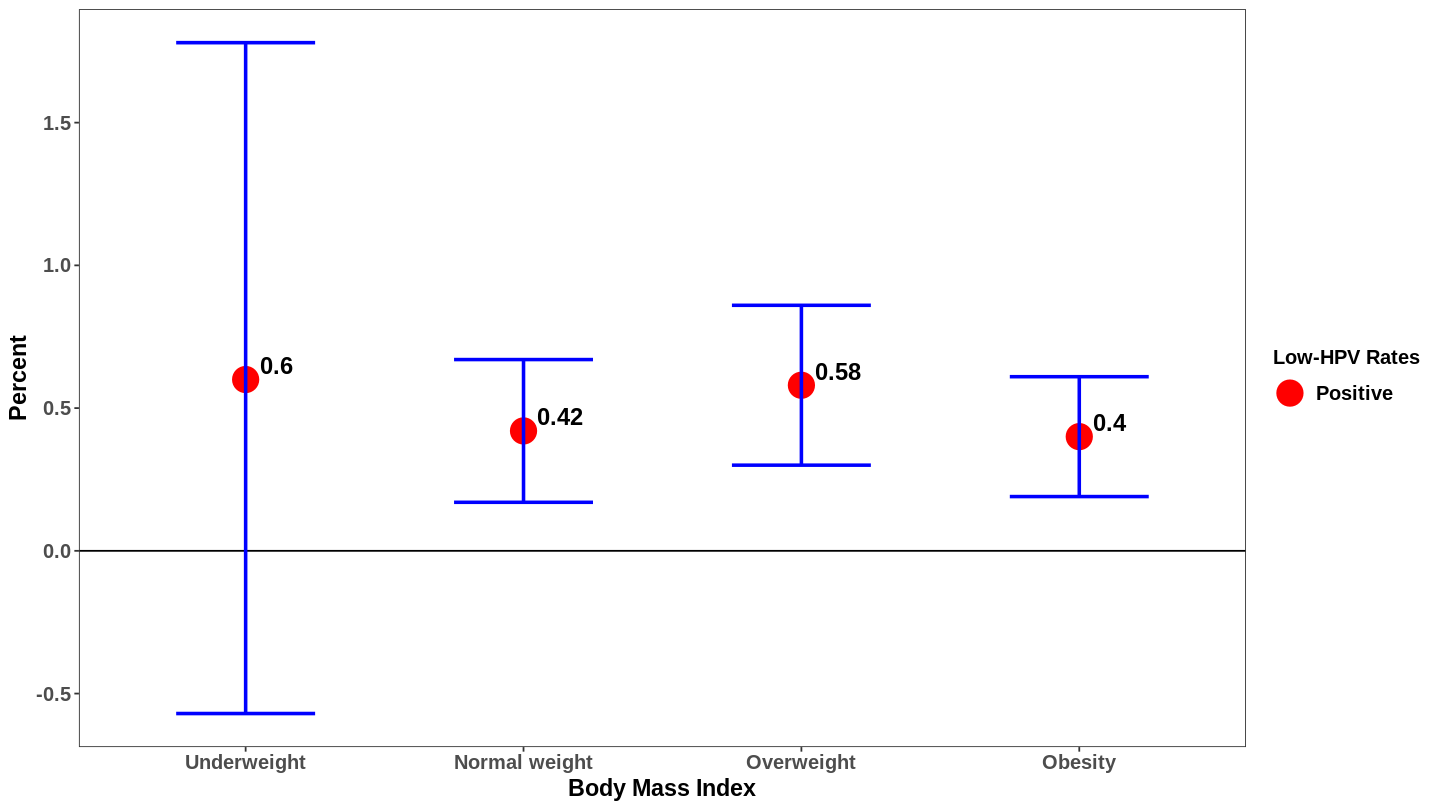

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(BMI.f), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Body Mass Index", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))












The plot above shows the percentage proportion, and  confidence intervals of people that tested positive for high HPV based on their body mass index. The proportion underweight was 0.60 percent, normal weight was 0.42 percent, overweight was 0.58 percent, and obesed was 0.40 percent.

# **Total Arsenic by Quantile 1**









### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(TUA.q != "NA")

HSV_df %$% freq(TUA.q)


TUA.q,Freq,% Freq
<fct>,<int>,<dbl>
Q1,1530,39.27105
Q2,849,21.79158
Q3,786,20.17454
Q4,731,18.76283
Total,3896,100.00000


From the frequency table above, the Q1 (39.27) percent has the highest percentage of the total sample collected. 

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = TUA.q)
tbl = HSV_df %$% table(high.HPV, TUA.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1467 [ 37.65% ],810 [ 20.79% ],743 [ 19.07% ],713 [ 18.3% ],3733 [ 95.82% ]
Positive,63 [ 1.62% ],39 [ 1% ],43 [ 1.1% ],18 [ 0.46% ],163 [ 4.18% ]
Total,1530 [ 39.27% ],849 [ 21.79% ],786 [ 20.17% ],731 [ 18.76% ],3896 [ 100% ]




 Chi-Square Test P-value:  0.02898 
Fisher Exact Test P-value:  0.02331 





For the Chi-square test above, the p-value (0.29) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the total arsenic by quantile(1) variable. 

In [ ]:

high_hpv_var = HSV_df %>% select(high.HPV,TUA.q) %>% group_by(TUA.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(TUA.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
  mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


TUA.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Q1,Negative,1467,37.65,1530,95.88,94.89,96.88
Q1,Positive,63,1.62,1530,4.12,3.12,5.11
Q2,Negative,810,20.79,849,95.41,94.00,96.81
Q2,Positive,39,1.00,849,4.59,3.19,6.00
Q3,Negative,743,19.07,786,94.53,92.94,96.12
Q3,Positive,43,1.10,786,5.47,3.88,7.06
Q4,Negative,713,18.30,731,97.54,96.41,98.66
Q4,Positive,18,0.46,731,2.46,1.34,3.59


The Q3 (5.47) percent shows the highest positive rate for high HPV.



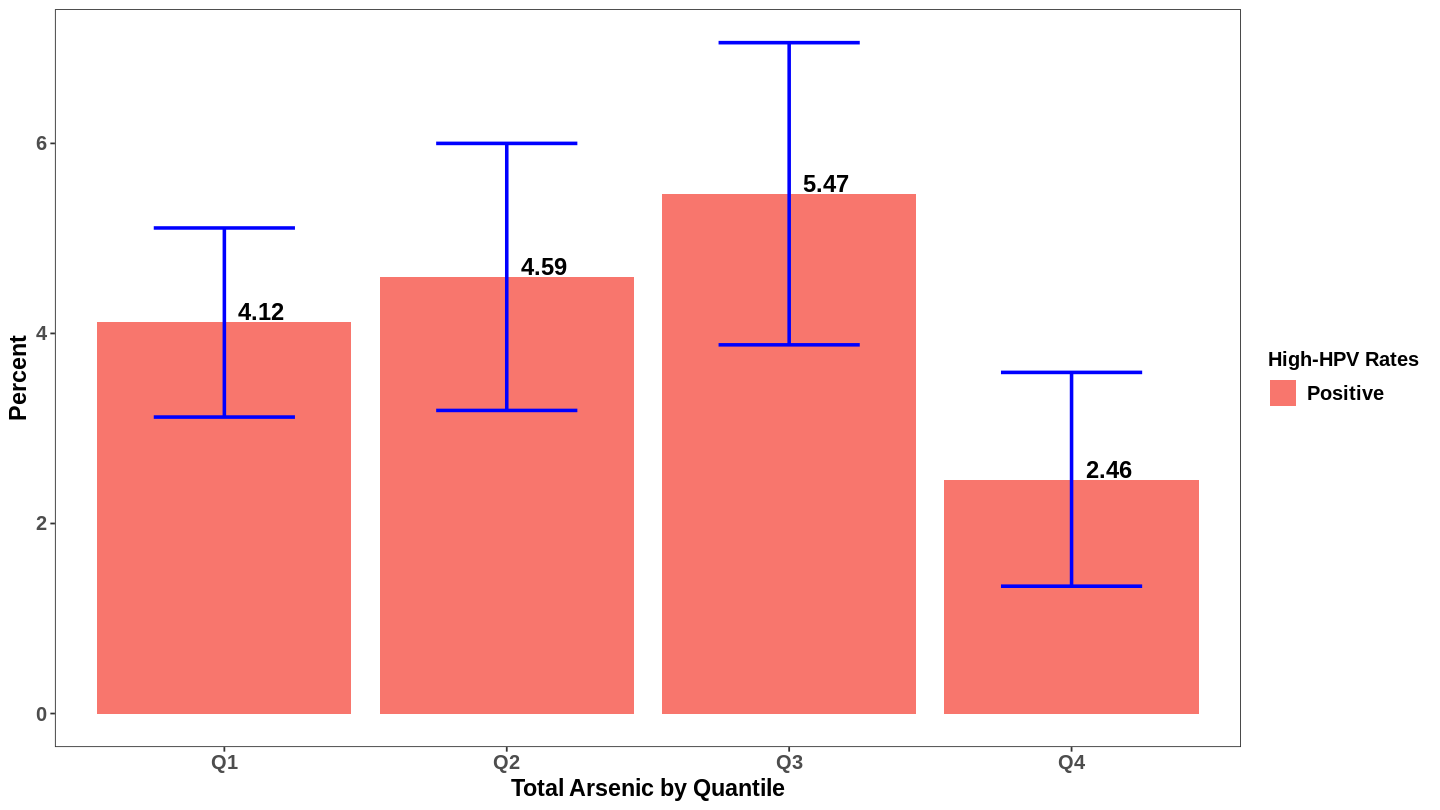

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(TUA.q), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Arsenic by Quantile", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))




The bar plot above shows the percentage proportion of total arsenic by quantile(1) that tested positive for high HPV,and their confidence intervals. The proportion in first quantile was 4.12 percent, second quantile was 4.59 percent, third quantile was 5.47 percent, and fourth quantile was 2.46 percent. 

### **Low HPV Section**

In [ ]:



HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(TUA.q != "NA")

HSV_df %$% freq(TUA.q)


TUA.q,Freq,% Freq
<fct>,<int>,<dbl>
Q1,1530,39.27105
Q2,849,21.79158
Q3,786,20.17454
Q4,731,18.76283
Total,3896,100.00000


From the frequency table above, the Q1 (39.27) percent has the highest percentage of the total sample collected. 

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = TUA.q)
tbl = HSV_df %$% table(low.HPV, TUA.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1519 [ 38.99% ],847 [ 21.74% ],779 [ 19.99% ],729 [ 18.71% ],3874 [ 99.44% ]
Positive,11 [ 0.28% ],2 [ 0.05% ],7 [ 0.18% ],2 [ 0.05% ],22 [ 0.56% ]
Total,1530 [ 39.27% ],849 [ 21.79% ],786 [ 20.17% ],731 [ 18.76% ],3896 [ 100% ]




 Chi-Square Test P-value:  0.18109 
Fisher Exact Test P-value:  0.19371 





For the Chi-square test above, the p-value (0.18) greater than significance level (0.05) indicates there is evidence to conclude that the low HPV prevelence is not associated with the total arsenic by quantile(1) variable. 

In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,TUA.q) %>% group_by(TUA.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(TUA.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


TUA.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Q1,Negative,1519,38.99,1530,99.28,98.86,99.70
Q1,Positive,11,0.28,1530,0.72,0.30,1.14
Q2,Negative,847,21.74,849,99.76,99.44,100.09
Q2,Positive,2,0.05,849,0.24,-0.09,0.56
Q3,Negative,779,19.99,786,99.11,98.45,99.77
Q3,Positive,7,0.18,786,0.89,0.23,1.55
Q4,Negative,729,18.71,731,99.73,99.35,100.11
Q4,Positive,2,0.05,731,0.27,-0.11,0.65


The Q3 group (0.89) percent shows the highest positive rate for low HPV.



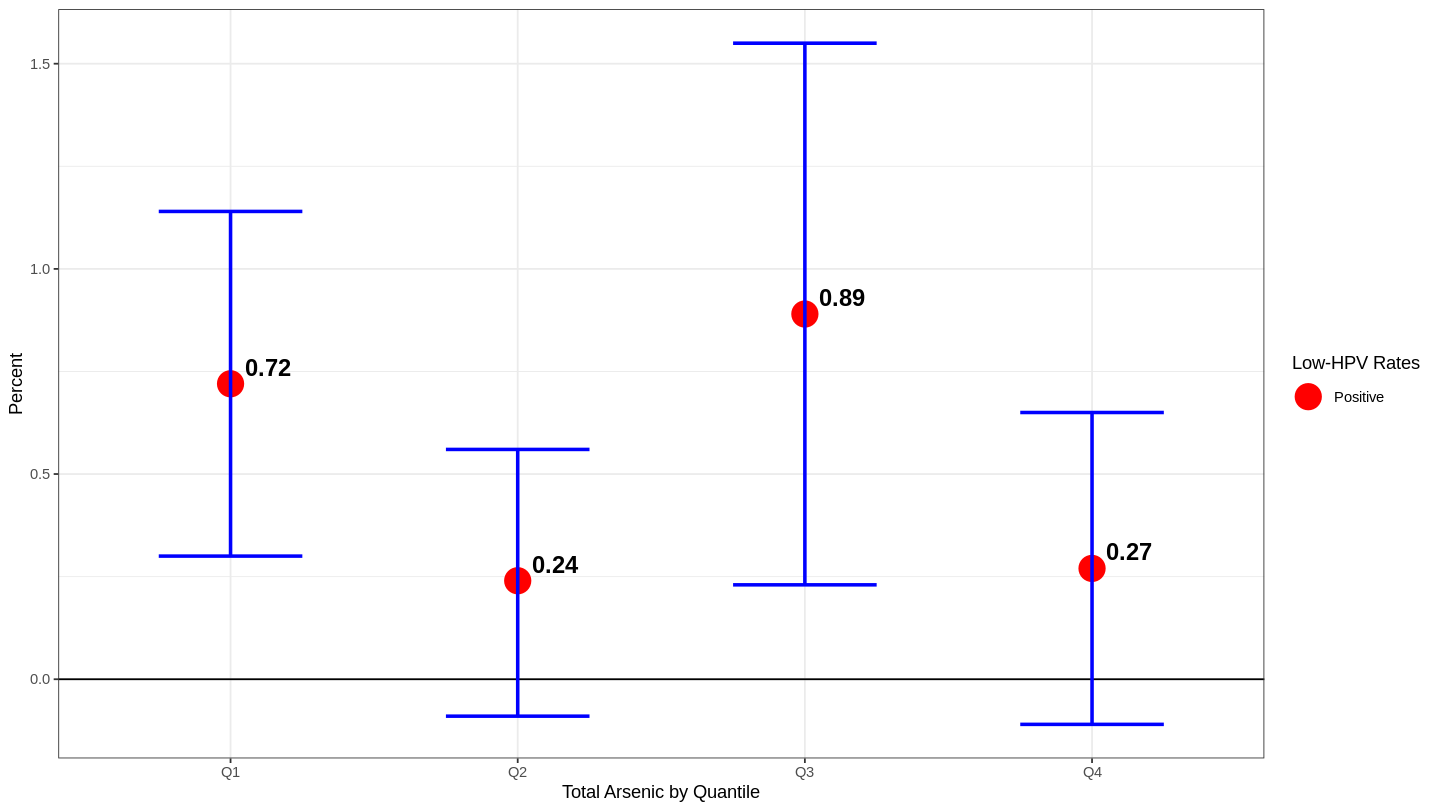

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(TUA.q), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_hline(yintercept = 0) +
  geom_point( colour = "red", size = 7) +
  labs(x = "Total Arsenic by Quantile", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() 
  #+
  # theme(panel.grid.major = element_blank(), panel.graid.minor = element_blank())+
  # theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
  #       axis.title=element_text(size=14,face="bold"))







The plot above shows the percentage proportion of total arsenic by quantile(1) that tested positive for low high HPV, and their confidence intervals. The proportion in first quantile was 0.72 percent, second quantile was 0.24 percent, third quantile was 0.89 percent, and fourth quantile was 0.27 percent. 

# **Total Arsenic by Quantile 2**

### **High HPV Section**

In [ ]:

HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(TUA1.q != "NA") %>% filter(grepl("Q", TUA1.q ))

HSV_df %$% freq(TUA1.q)


TUA1.q,Freq,% Freq
<fct>,<int>,<dbl>
Q1,1126,34.00785
Q2,784,23.67865
Q3,720,21.74570
Q4,681,20.56780
Total,3311,100.00000


From the frequency table above, the Q1 (34.01) percent has the highest percentage of the total sample collected. 

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = TUA1.q)
tbl = HSV_df %$% table(high.HPV, TUA1.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1081 [ 32.65% ],748 [ 22.59% ],682 [ 20.6% ],656 [ 19.81% ],3167 [ 95.65% ]
Positive,45 [ 1.36% ],36 [ 1.09% ],38 [ 1.15% ],25 [ 0.76% ],144 [ 4.35% ]
Total,1126 [ 34.01% ],784 [ 23.68% ],720 [ 21.75% ],681 [ 20.57% ],3311 [ 100% ]




 Chi-Square Test P-value:  0.44143 
Fisher Exact Test P-value:  0.44714 





For the Chi-square test above, the p-value (0.44) greater than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is not associated with the total arsenic by quantile(2) variable. 

In [ ]:

high_hpv_var = HSV_df %>% select(high.HPV,TUA1.q) %>% group_by(TUA1.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(TUA1.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
  mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


TUA1.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Q1,Negative,1081,32.65,1126,96.00,94.86,97.15
Q1,Positive,45,1.36,1126,4.00,2.85,5.14
Q2,Negative,748,22.59,784,95.41,93.94,96.87
Q2,Positive,36,1.09,784,4.59,3.13,6.06
Q3,Negative,682,20.60,720,94.72,93.09,96.36
Q3,Positive,38,1.15,720,5.28,3.64,6.91
Q4,Negative,656,19.81,681,96.33,94.92,97.74
Q4,Positive,25,0.76,681,3.67,2.26,5.08


The Q3 group (5.28) percent shows the highest positive rate for high HPV.



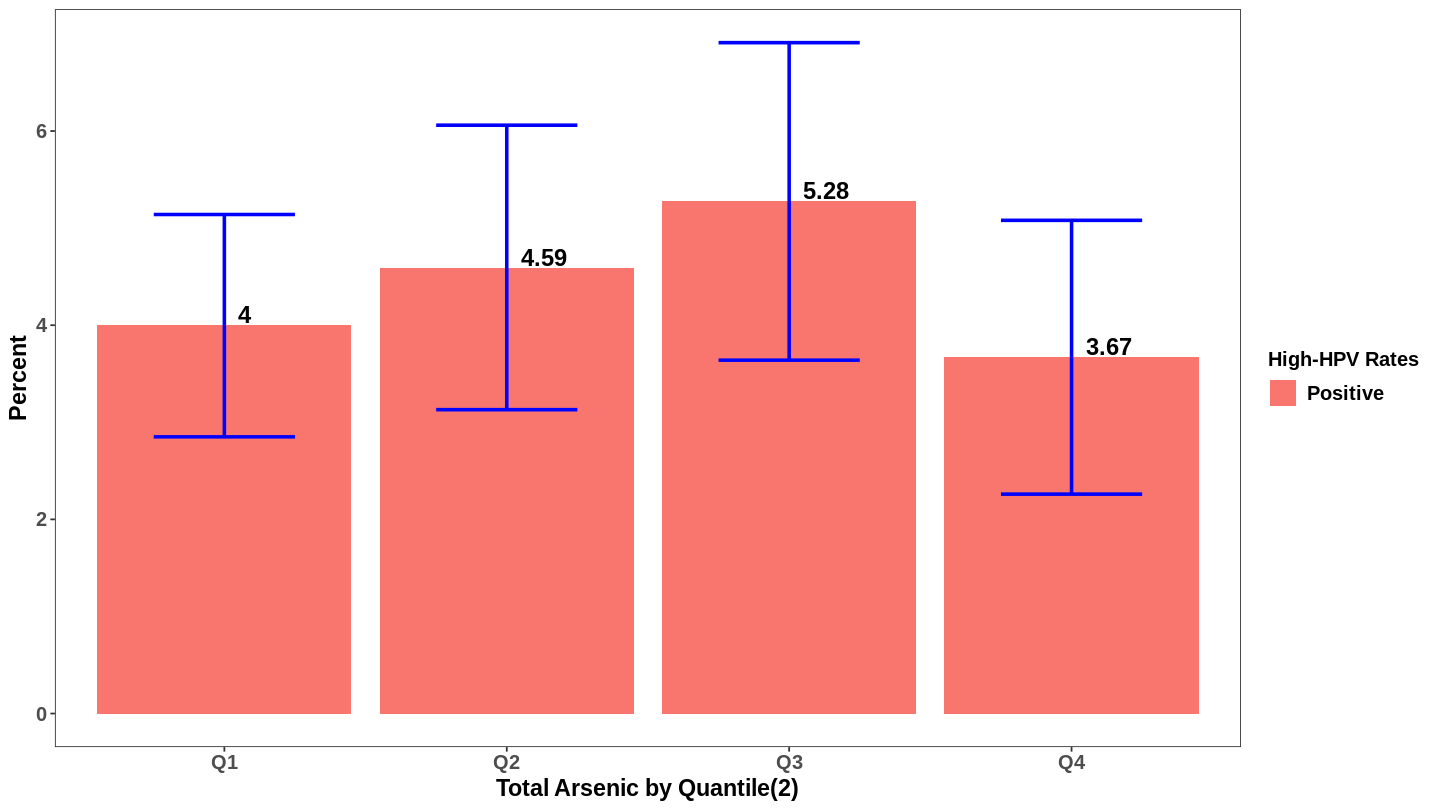

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(TUA1.q), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Arsenic by Quantile(2)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))





The bar plot above shows the percentage proportion of total arsenic by quantile(2) that tested positive for high HPV, and their confidence intervals. The proportion in first quantile was 4.00 percent, second quantile was 4.59 percent, third quantile was 5.28 percent, and fourth quantile was 3.67 percent. 

 

### **Low HPV Section**

In [ ]:

HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(TUA1.q!= "NA") %>% filter(grepl("Q", TUA1.q ))

HSV_df %$% freq(TUA1.q)


TUA1.q,Freq,% Freq
<fct>,<int>,<dbl>
Q1,1126,34.00785
Q2,784,23.67865
Q3,720,21.74570
Q4,681,20.56780
Total,3311,100.00000


From the frequency table above, the Q1 (34.01) percent has the highest percentage of the total sample collected. 

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = TUA1.q)
tbl = HSV_df %$% table(low.HPV, TUA1.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1114 [ 33.65% ],781 [ 23.59% ],717 [ 21.66% ],678 [ 20.48% ],3290 [ 99.37% ]
Positive,12 [ 0.36% ],3 [ 0.09% ],3 [ 0.09% ],3 [ 0.09% ],21 [ 0.63% ]
Total,1126 [ 34.01% ],784 [ 23.68% ],720 [ 21.75% ],681 [ 20.57% ],3311 [ 100% ]




 Chi-Square Test P-value:  0.16746 
Fisher Exact Test P-value:  0.24329 





For the Chi-square test above, the p-value (0.17) greater than significance level (0.05) indicates there is evidence to conclude that the low HPV prevelence is not associated with the total arsenic by quantile(2) variable. 

In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,TUA1.q) %>% group_by(TUA1.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(TUA1.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


TUA1.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Q1,Negative,1114,33.65,1126,98.93,98.33,99.53
Q1,Positive,12,0.36,1126,1.07,0.47,1.67
Q2,Negative,781,23.59,784,99.62,99.19,100.05
Q2,Positive,3,0.09,784,0.38,-0.05,0.81
Q3,Negative,717,21.66,720,99.58,99.11,100.05
Q3,Positive,3,0.09,720,0.42,-0.05,0.89
Q4,Negative,678,20.48,681,99.56,99.06,100.06
Q4,Positive,3,0.09,681,0.44,-0.06,0.94


The Q1 group (1.07) percent shows the highest positive rate for low HPV.



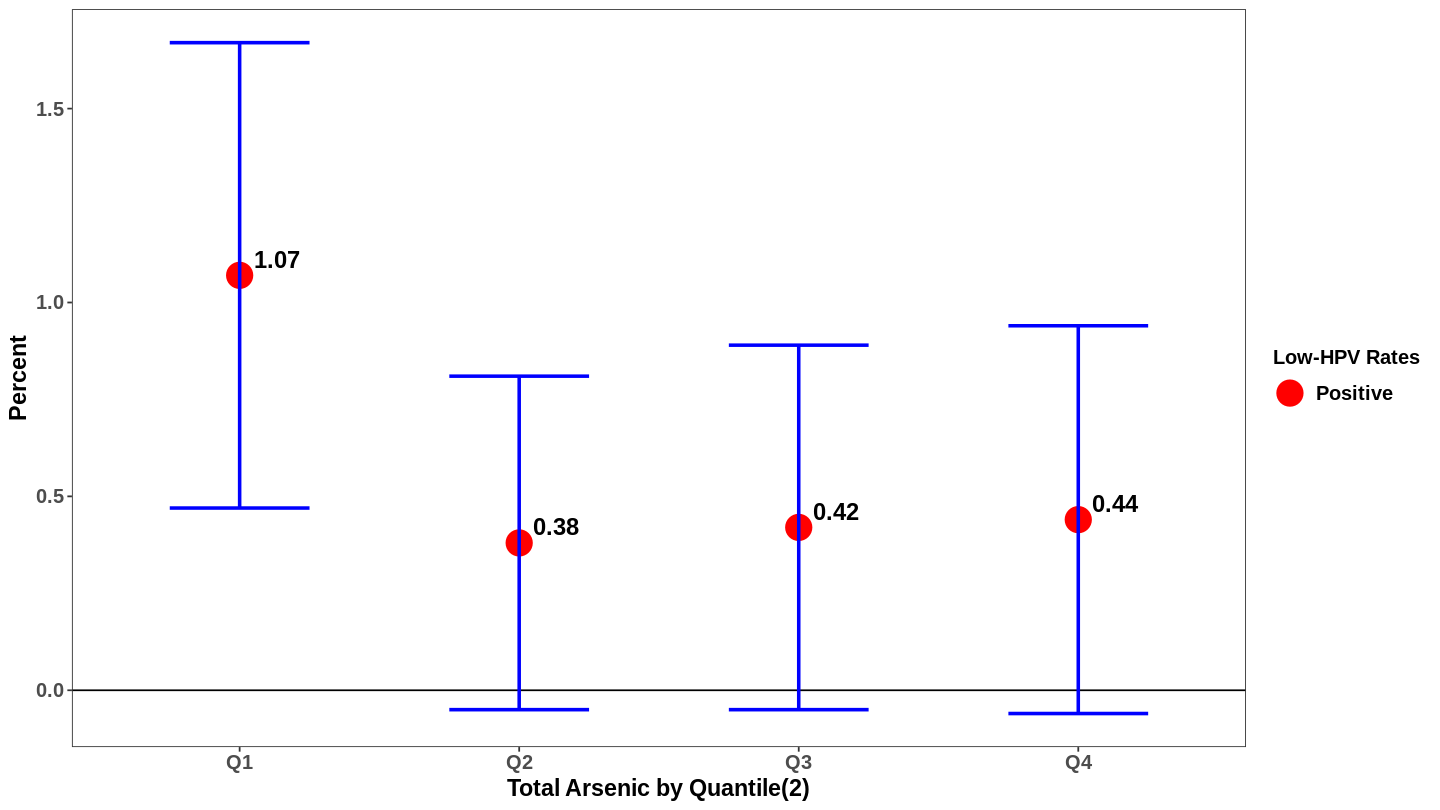

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(TUA1.q), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Total Arsenic by Quantile(2)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))







The bar plot above shows the percentage proportion of total arsenic by quantile(2) that tested positive for low HPV, and their confidence intervals. The proportion in first quantile was 1.07 percent, second quantile was 0.38 percent, third quantile was 0.42 percent, and fourth quantile was 0.44 percent. 

 

# **Total Arsenic by Quantile 3**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(TUA2.q!= "NA")  %>% filter(grepl("Q", TUA2.q ))

HSV_df %$% freq(TUA2.q)


TUA2.q,Freq,% Freq
<fct>,<int>,<dbl>
Q1,1543,39.83992
Q2,874,22.56649
Q3,758,19.57139
Q4,698,18.02221
Total,3873,100.00000


From the frequency table above, the Q1 (39.81) percent has the highest percentage of the total sample collected. 

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = TUA2.q)
tbl = HSV_df %$% table(high.HPV, TUA2.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1481 [ 38.24% ],841 [ 21.71% ],714 [ 18.44% ],674 [ 17.4% ],3710 [ 95.79% ]
Positive,62 [ 1.6% ],33 [ 0.85% ],44 [ 1.14% ],24 [ 0.62% ],163 [ 4.21% ]
Total,1543 [ 39.84% ],874 [ 22.57% ],758 [ 19.57% ],698 [ 18.02% ],3873 [ 100% ]




 Chi-Square Test P-value:  0.09526 
Fisher Exact Test P-value:  0.1142 





For the Chi-square test above, the p-value (0.10) greater than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is not associated with the total arsenic by quantile(3) variable. 

TUA2.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Q1,Negative,1481,38.24,1543,95.98,95.00,96.96
Q1,Positive,62,1.60,1543,4.02,3.04,5.00
Q2,Negative,841,21.71,874,96.22,94.96,97.49
Q2,Positive,33,0.85,874,3.78,2.51,5.04
Q3,Negative,714,18.44,758,94.20,92.53,95.86
Q3,Positive,44,1.14,758,5.80,4.14,7.47
Q4,Negative,674,17.40,698,96.56,95.21,97.91
Q4,Positive,24,0.62,698,3.44,2.09,4.79


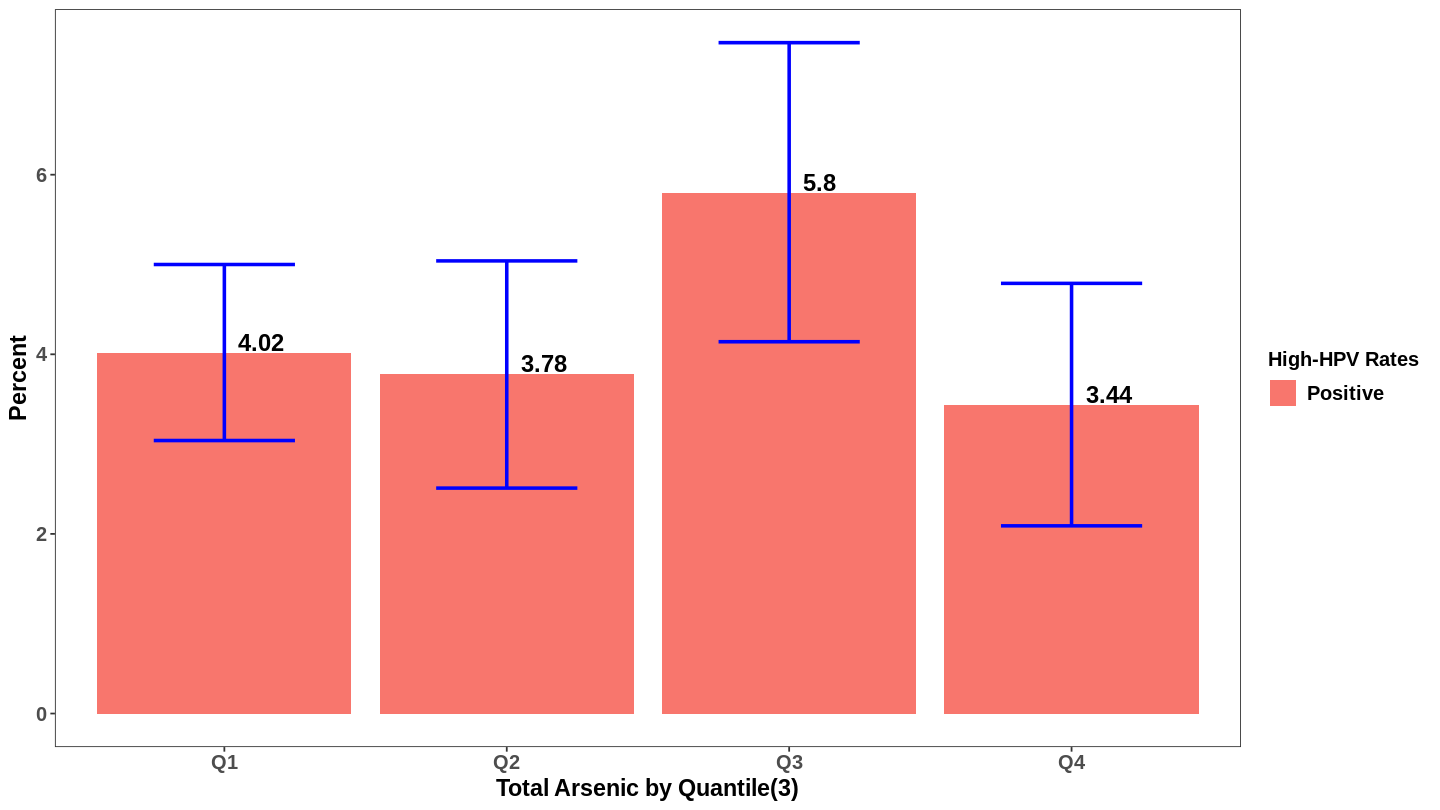

In [ ]:

high_hpv_var = HSV_df %>% select(high.HPV,TUA2.q) %>% group_by(TUA2.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(TUA2.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
  mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(TUA2.q), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Arsenic by Quantile(3)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))




The bar plot above shows the percentage proportion of total arsenic by quantile(3) that tested positive for high HPV, and their confidence intervals. The proportion in first quantile was 4.02 percent, second quantile was 3.78 percent, third quantile was 5.28 percent, and fourth quantile was 3.44 percent. 

 

### **Low HPV Section**

In [ ]:

HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(TUA2.q!= "NA") %>% filter(grepl("Q", TUA2.q ))

HSV_df %$% freq(TUA2.q)


TUA2.q,Freq,% Freq
<fct>,<int>,<dbl>
Q1,1543,39.83992
Q2,874,22.56649
Q3,758,19.57139
Q4,698,18.02221
Total,3873,100.00000


From the frequency table above, the Q1 (39.81) percent has the highest percentage of the total sample collected. 

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = TUA2.q)
tbl = HSV_df %$% table(low.HPV, TUA2.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1531 [ 39.53% ],869 [ 22.44% ],755 [ 19.49% ],696 [ 17.97% ],3851 [ 99.43% ]
Positive,12 [ 0.31% ],5 [ 0.13% ],3 [ 0.08% ],2 [ 0.05% ],22 [ 0.57% ]
Total,1543 [ 39.84% ],874 [ 22.57% ],758 [ 19.57% ],698 [ 18.02% ],3873 [ 100% ]




 Chi-Square Test P-value:  0.46122 
Fisher Exact Test P-value:  0.52946 





For the Chi-square test above, the p-value (0.46) greater than significance level (0.05) indicates there is evidence to conclude that the low HPV prevelence is not associated with total arsenic by quantile(3) variable. 

In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,TUA2.q) %>% group_by(TUA2.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(TUA2.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


TUA2.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Q1,Negative,1531,39.53,1543,99.22,98.78,99.66
Q1,Positive,12,0.31,1543,0.78,0.34,1.22
Q2,Negative,869,22.44,874,99.43,98.93,99.93
Q2,Positive,5,0.13,874,0.57,0.07,1.07
Q3,Negative,755,19.49,758,99.60,99.16,100.05
Q3,Positive,3,0.08,758,0.40,-0.05,0.84
Q4,Negative,696,17.97,698,99.71,99.32,100.11
Q4,Positive,2,0.05,698,0.29,-0.11,0.68


The Q1 group (0.78) percent shows the highest positive rate for low HPV.



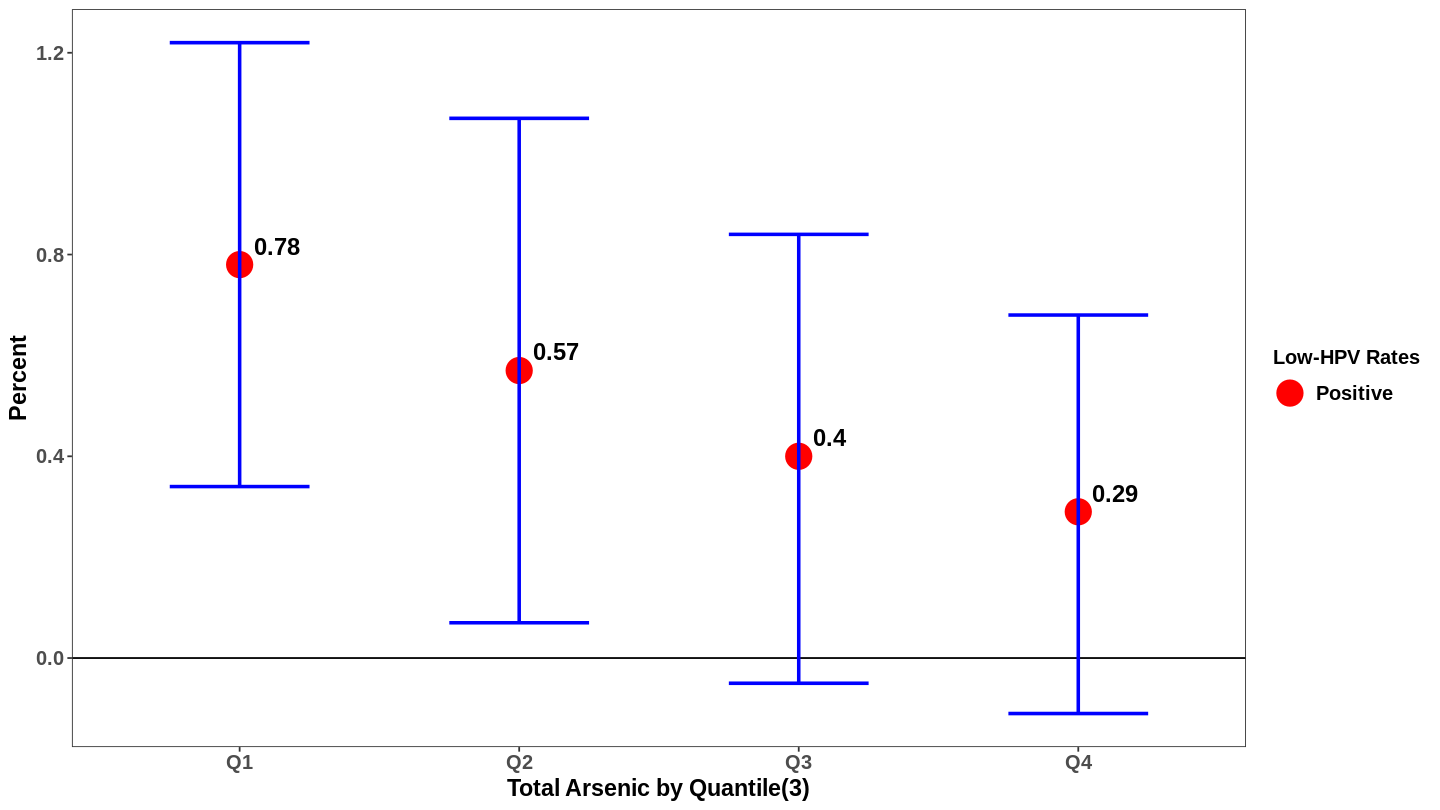

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(TUA2.q), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Total Arsenic by Quantile(3)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))








The plot above shows the percentage proportion of total arsenic by quantile(2) that tested positive for high HPV, and their confidence intervals. The proportion in first quantile was 0.78 percent, second quantile was 0.57 percent, third quantile was 0.40 percent, and fourth quantile was 0.29 percent. 

 